# Microsoft Malware Detection
## EDA and *ML* in progress

![](https://zeroproject.org/wp-content/uploads/2018/05/Microsoft.png)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbuYMzpgoRh2tLUj_EVV0z7gtIKwfJfZ7G-DP5dscAvSqcgSR_OQ)

The malware industry continues to be a well-organized, well-funded market dedicated to evading traditional security measures. Once a computer is infected by malware, criminals can hurt consumers and enterprises in many ways.With more than one billion enterprise and consumer customers, Microsoft takes this problem very seriously and is deeply invested in improving security. As one part of their overall strategy for doing so, Microsoft is challenging the data science community to develop techniques to predict if a machine will soon be hit with malware. As with their previous, Malware Challenge (2015), Microsoft is providing Kagglers with an unprecedented malware dataset to encourage open-source progress on effective techniques for predicting malware occurrences.

### Goals
The goal of this competition is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine. The telemetry data containing these properties and the machine infections was generated by combining heartbeat and threat reports collected by Microsoft's endpoint protection solution, Windows Defender. Each row in this dataset corresponds to a machine, uniquely identified by a MachineIdentifier. HasDetections is the ground truth and indicates that Malware was detected on the machine. Using the information and labels in train.csv, you must predict the value for HasDetections for each machine in test.csv.

### Metric
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed label.

#### Initial thanks and inspirations for this kernel - sources:
- https://www.kaggle.com/theoviel/load-the-totality-of-the-data
- https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated

## Table of Contents
1. [Importing the Dataset](#importing_the_dataset)
2. [Inspecting the Dataset](#inspecting)
3. [Exploratory Data Analysis](#EDA)
4. [Machine Learning Modeling](#ML)

## ToDo: 
- add more comments
- Conclusion for Univariate, Bivariate and Multivariate plots
- Dive into Feature Engineering
- Experiments with NA_rate threshold, eta, number of estimators and xgboost parameters in general to improve auc

### Summary of Versions:
Until Version 22 I was playing around with EDA and trying to visualize as information as possible, unfortuately due to the enormous train set size which is almost 8GB I was working mainly with samples and trying to find ways to visualize as much information as I can. From version 22 and later versions of this Kernel, I was experimenting with Baseline XGboost and trying to find the optimal parameters via tuning. Feature Engineering still missing due to the fact that I dive into so much to tuning and trying to improve the classifier's performance and lost focus on other subjects but I will come back to that later. Tuning causes Kaggle to terminate my kernels due to timeout limitations. From Version #61 and so on I work with XGBoost classifers with optimal parameters found from my previous kernels. After the end of the competition and with the reveal of the private dataset, I am starting to suspect that my final tuned models are a bit overfitted and have to generalize.

#### Version History:
- Version 22, with 90% na_rate threshold, 10% train_sample / Public score: ** 0.656 **
- Version 23, with 90% na_rate threshold, 15% train_sample / Public score: ** 0.654 **
- Version 24, with 80% na_rate threshold, 15% train_sample / Public score: ** 0.655 **
- Version 25, with 80% na_rate threshold, 10% train_sample with better xgboost params / Public score: ** 0.661 **
- Version 26, with 80% na_rate threshold, 10% train_sample with better xgboost params / Public score: ** 0.661 **
- Version 27, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.1, 1000 estimators / Public score: ** 0.669 **
- Version 28, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 1000 estimators / Public score: ** 0.674 **
- Version 29, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 2000 estimators / Public score: ** 0.669 **
- Version 30, with 60% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 1000 estimators / Public score: ** 0.670 **
- Version 31, with 60% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 2000 estimators / Public score: ** 0.672 **
- Version 32, with 50% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 1000 estimators / Public score: ** 0.666 **
- Version 33-34, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.1, 1000 estimators / Public score: ** 0.674 **
- Version 35-36-37, with 70% na_rate threshold, 10% Introducing Feature Engineering, with train_sample and with better xgboost params eta: 0.1, 1000 estimators / score: ** 0.659 ** 
- Version 38, with 70% na_rate threshold, 10% train_sample and with better xgboost params eta: 0.1, 1000 estimators and tuning / score: ** 0.671 **
- Version 39-40, with 70% na_rate threshold, 10% train_sample and with better xgboost params eta: 0.1, 1000 estimators and tuning / score: ** 0.670 **
- Version 41, with 70% na_rate threshold, 10% train_sample and with better xgboost params eta: 0.05, 2000 estimators and tuning / score: ** 0.673 ** 
- Version 42-43-44, with 70% na_rate threshold, 10% train_sample and with better xgboost tuning / score: ** 0.677 **
- Version 45, with 90% na_rate and unbalanced_features threshold, 12.5% train_sample and with better xgboost tuning / score: ** 0.664 IT HAS AN ERROR **
- Version 46-47-48, with 90% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA IT HAS AN ERROR **
- Version 49, with 90% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR **
- Version 50, (Like Version 49) with 90% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR  **
- Version 51, with 70% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR  **
- Version 52, with 70% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR **
- Version 53, with 90% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** 0.673  **
- Version 54, with 90% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA,  running longer than 9h  **
- Version 55, with 70% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 56, with 70% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 57, with 70% na_rate and 90% unbalanced_features threshold, 15% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 58, with 70% na_rate and 90% unbalanced_features threshold, 18.5% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 59, with 70% na_rate and 90% unbalanced_features threshold, 20% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 60, with 70% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA  **
- Version 61, with 70% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuned / score: ** TBA  **
- Version 62, with 70% na_rate and 90% unbalanced_features threshold, 15% train_sample and with xgboost tuned / score: ** TBA  **
- Version 63, with 70% na_rate and 90% unbalanced_features threshold, 17.5% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 64, with 70% na_rate and 90% unbalanced_features threshold, 20% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 65, with 70% na_rate and 90% unbalanced_features threshold, 22.5% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 66-67-68, with 70% na_rate and 90% unbalanced_features threshold, 25% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 69, with 70% na_rate and 90% unbalanced_features threshold, 27.5% train_sample and with xgboost tuned / score: ** 0.674  **
- Version 70, with 70% na_rate and 90% unbalanced_features threshold, 30% train_sample and with xgboost tuned / score: ** 0.675  **
- Version 71-72-73, with 70% na_rate and 90% unbalanced_features threshold, 25% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** TBA  **
- Version 74-75, with 70% na_rate and 90% unbalanced_features threshold, 27.5% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** TBA  **
- Version 76, with 70% na_rate and 90% unbalanced_features threshold, 30% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** TBA  **
- Version 77, with 70% na_rate and 90% unbalanced_features threshold, 32.5% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** 0.672  **
- Version 78-79, Returning after the end of the competition to polish the Kernel, with 90% na_rate and 90% unbalanced_features threshold, 15% train_sample and with xgboost tuned / score: ** TBA  **


### Version Summary:
Until Version 22 I was playing around with EDA and trying to visualize as information as possible, unfortuately due to the enormous train set size which is almost 8GB I was working mainly with samples and trying to find ways to visualize as much information as I can. From version 22 and later versions of this Kernel, I was experimenting with Baseline XGboost and trying to find the optimal parameters via tuning. Feature Engineering still missing due to the fact that I dive into so much to tuning and trying to improve the classifier's performance and lost focus on other subjects but I will come back to that later. Tuning causes Kaggle to terminate my kernels due to timeout limitations. From Version #61 and so on I work with XGBoost classifers with optimal parameters found from my previous kernels. Moreover, I am starting to believe that the 2 thresholds, na_rate and unbalanced_feature_rate_threshold must be both set to 0.9.


## My train of thought is the following:

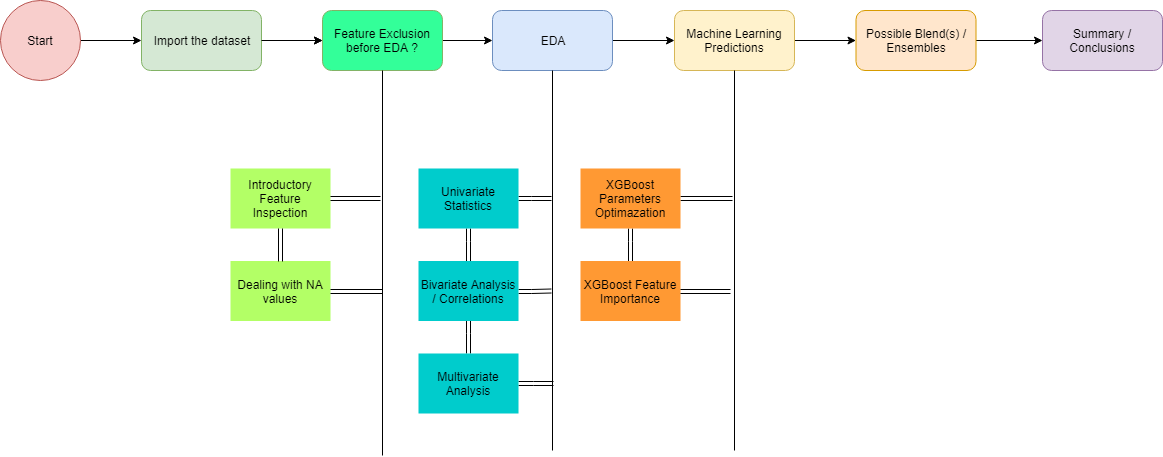

### *Due to memory limitations both EDA and Machine Learning will be performed with a representative sample from the whole train set. Approximately 15% from the train set will be used for EDA and 15% sample from the whole train set will be used from ML modeling.*

<a id="importing_the_dataset"></a>
## Importing the Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

plt.style.use('fivethirtyeight')

import time


# due to Kaggle memory limitations and the enormous dataset size, a sample from the whole
# trainset will be used for ML modeling
train_sample_fraction = 0.125


# another global variable that must be defined is the NA values rate / theshold to ommit columns with
# NA values that pass this rate
na_rate_threshold = 0.9

# theshold to remove columns with unbalanced features to their values 
unbalanced_feature_rate_threshold = 0.9

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


The data is quite big here, and all of it cannot be loaded at once with a simple read_csv call.
A solution is to specify types, to gain memory (for example switching from float64 to float32)

In [2]:
# I am grateful for the help of author of this kernel for the main idea to load the dataset and save memory space!!
# https://www.kaggle.com/theoviel/load-the-totality-of-the-data

dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
# to be deleted this cell
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_and_binary_columns = [c for c,v in dtypes.items() if v in numerics]


In [4]:
%%time
train = pd.read_csv('../input/train.csv', dtype=dtypes)

CPU times: user 3min 7s, sys: 22.5 s, total: 3min 29s
Wall time: 3min 30s


In [5]:
# Special thanks to https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated
#train = reduce_mem_usage(train)

<a id="inspecting"></a>
## Introductory Inspection for the train set and its features

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    category
ProductName                                          category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
IsBeta                                               int8
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int8
DefaultBrowsersIdentifier                            float16
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int8
CountryIdentifier                                    int16
CityIdentifier                         

We can see that we have already a mix of numerical and categorical features.

In [7]:
train.describe()

IsBeta      ...        HasDetections
count  8.921483e+06      ...         8.921483e+06
mean   7.509962e-06      ...         4.997927e-01
std    2.740421e-03      ...         5.000000e-01
min    0.000000e+00      ...         0.000000e+00
25%    0.000000e+00      ...         0.000000e+00
50%    0.000000e+00      ...         0.000000e+00
75%    0.000000e+00      ...         1.000000e+00
max    1.000000e+00      ...         1.000000e+00

[8 rows x 53 columns]

We have a wide variety of data. most of them appear to have NaN values, we have to thoroughly inspect them.

We have many features and lots of them have NA values, an idea is to ditch features that have many NA values bacause they do not provide any information that may be useful for the analysis.

In [8]:
# special thanks to https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated

stats = []
for col in train.columns:
    stats.append((col, train[col].dtype, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100))
    
stats_df = pd.DataFrame(stats, columns=['Feature', "type", 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category'])

stats_df.sort_values('Percentage of missing values', ascending=False)

Feature                     ...                      Percentage of values in the biggest category
28                                            PuaMode                     ...                                                         99.974119
41                              Census_ProcessorClass                     ...                                                         99.589407
8                           DefaultBrowsersIdentifier                     ...                                                         95.141637
68                         Census_IsFlightingInternal                     ...                                                         83.044030
52                         Census_InternalBatteryType                     ...                                                         71.046809
71                              Census_ThresholdOptIn                     ...                                                         63.524472
75                            Census_IsWIMBootEnabled                     ...                                                         63.439038
31                                        SmartScreen                     ...                                                         48.379658
15                             OrganizationIdentifier                     ...                                                         47.037662
29                                              SMode                     ...                                                         93.928812
14                                     CityIdentifier                     ...                                                          3.647477
80                                       Wdft_IsGamer                     ...                                                         69.205344
81                              Wdft_RegionIdentifier                     ...                                                         20.177195
53              Census_InternalBatteryNumberOfCharges                     ...                                                         56.643094
72              Census_FirmwareManufacturerIdentifier                     ...                                                         30.253692
69                           Census_IsFlightsDisabled                     ...                                                         98.199728
73                   Census_FirmwareVersionIdentifier                     ...                                                          1.794915
37                          Census_OEMModelIdentifier                     ...                                                          3.416271
36                           Census_OEMNameIdentifier                     ...                                                         14.428946
32                                           Firewall                     ...                                                         96.856251
46                            Census_TotalPhysicalRAM                     ...                                                         45.894971
79            Census_IsAlwaysOnAlwaysConnectedCapable                     ...                                                         93.504320
62                 Census_OSInstallLanguageIdentifier                     ...                                                         35.636026
30                                    IeVerIdentifier                     ...                                                         43.556010
42                    Census_PrimaryDiskTotalCapacity                     ...                                                         31.850422
44                   Census_SystemVolumeTotalCapacity                     ...                                                          0.594094
48  Census_InternalPrimaryDiagonalDisplaySizeInInches                     ...                                                         34.158346
49  Census_Int

### Remove columns with high * **NA** * rate threshold and high * **one category** * values only
removing colums with NA rate more than * ** 70%** * threshold and * ** 90%  ** * features with one category only.

In [9]:
good_cols = list(train.columns)

for col in train.columns:
    
    # remove columns with high NA rate
    na_rate = train[col].isnull().sum() / train.shape[0]
    
    # remove columns with high Unbalanced values rate
    unbalanced_rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    
    if na_rate > na_rate_threshold:
        good_cols.remove(col)
    elif unbalanced_rate > unbalanced_feature_rate_threshold:
        good_cols.remove(col)

In [10]:
good_cols

['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSVersion

In [11]:
print("train data set reduced size in memory:", train.memory_usage().sum() / (1000000000))

train data set reduced size in memory: 1.754534285


In [12]:
train = train[good_cols]

### Delete some variables to free memory space.

In [13]:
del stats_df

### Call garbage collector

In [14]:
import gc

gc.collect()

228718

<a id="EDA"></a>
## Exploratory Data Analysis

![](http://blog.k2analytics.co.in/wp-content/uploads/2016/12/Exploratory_Data_Analysis.png)

### Let's print out and take a look at the header frame

In [15]:
train.head()

MachineIdentifier      ...      HasDetections
0  0000028988387b115f69f31a3bf04f09      ...                  0
1  000007535c3f730efa9ea0b7ef1bd645      ...                  0
2  000007905a28d863f6d0d597892cd692      ...                  0
3  00000b11598a75ea8ba1beea8459149f      ...                  1
4  000014a5f00daa18e76b81417eeb99fc      ...                  1

[5 rows x 57 columns]

### Train Set dimensions

In [16]:
train.shape

(8921483, 57)

### Target

In [17]:
train['HasDetections'].value_counts()

0    4462591
1    4458892
Name: HasDetections, dtype: int64

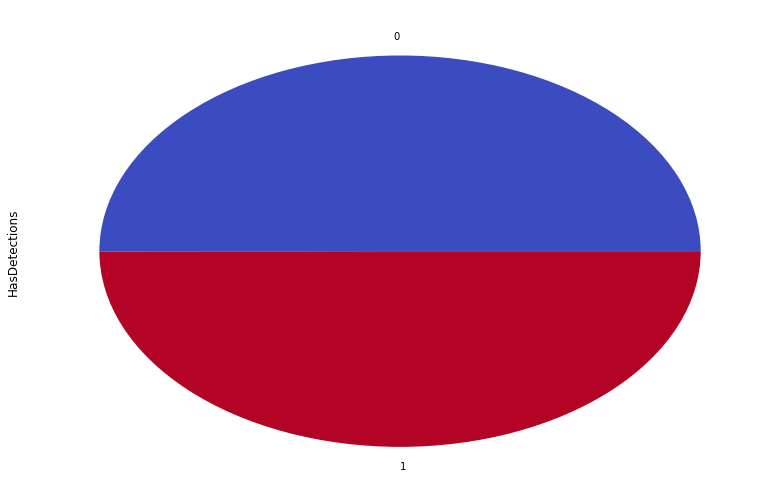

In [18]:
train['HasDetections'].value_counts().plot(kind="pie", figsize=(12,9), colormap="coolwarm")

#### The target is balanced, which is nice.

### Seperate the categorical and the numerical columns in the Train Set
MachineIdentifier is a unique ID and does not play any role to the analysis.

In [19]:
categorical_columns = list(train.loc[:, train.dtypes =="category"].columns)
numerical_and_binary_columns = list(train.loc[:, train.dtypes !="category"].columns)
numerical_columns = numerical_and_binary_columns

categorical_columns.remove("MachineIdentifier")

binary_columns = []
for col in (numerical_and_binary_columns):
    if train[col].nunique() == 2:
        binary_columns.append(col)
        numerical_columns.remove(col)

### The Majority of types of features

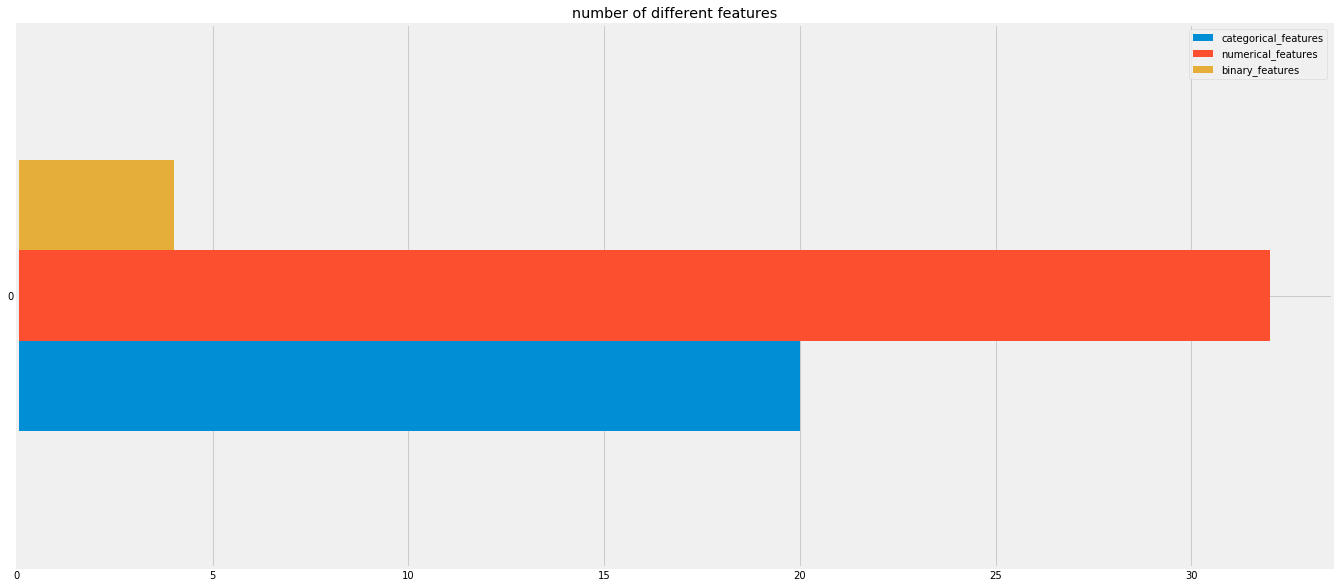

In [20]:
#print(len(categorical_columns))
#print(len(numerical_columns))
#print(len(binary_columns))

categories_list = []
categories_list.append(len(categorical_columns))
categories_list.append(len(numerical_columns))
categories_list.append(len(binary_columns))

categories_df = pd.DataFrame(categories_list, 
                             index=["categorical_features", "numerical_features", "binary_features"])

categories_df = categories_df.transpose().plot(kind="barh", figsize=(21, 10), title="number of different features")

### * Due to memory limitations, a small sample between 10% to 13% from the whole trainset will be used for Univariate, Bivariate and Multivariate plots *

In [21]:
train_sample = train.sample(frac=train_sample_fraction, random_state=42)
gc.collect()

10

In [22]:
categorical_columns

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel']

### Univariate Analysis - Barplots for the categorical features
#### Inspecting each one of the categorical features from the train set and illustrating the top most occured categories per categorical feature against the *HasDetections* target variable. Moreover trying to fit a logistic regression model between the target variable and the inspected feature to identify if the feature is a good predictor.

In [23]:
def categorical_univariate_and_bivariate_stats(feature):
    
    if feature in train_sample.columns:
    
        print("Top 10 most occurred categories for the categorical feature", feature)
        print(train_sample[feature].value_counts().head(10))

        f, axes = plt.subplots(1, 2, figsize=(21, 10))

        train_sample[feature].value_counts().head(10).plot.bar(ax=axes[0], colormap="BrBG")

        train_sample.groupby(["HasDetections", feature]).count()["MachineIdentifier"].unstack(0).sort_values(by=1, axis=0, ascending=False).head(10).plot.bar(ax=axes[1], colormap="coolwarm")
        
        f.suptitle("Categorical feature: "+" Univariate and Bivariate plots against the target variable")
        
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")
        
        
def logistic_fit(feature):
    
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import r2_score

    if feature in train_sample.columns:
        
        from sklearn.linear_model import LogisticRegression

        # test if there is a logistic relationship between the feature1 and the target.
        print()
        print("Fitting a logistic regression model for the feature", feature,"against the target variable")
        
               
        mask = ~train_sample[feature].isnull() & ~train_sample["HasDetections"].isnull()

        logmodel = LogisticRegression()
        
        if feature in categorical_columns:        
            logmodel.fit(train_sample[feature][mask].cat.codes.values.reshape(-1,1), train_sample["HasDetections"][mask])
            predictions = logmodel.predict(train_sample[feature][mask].cat.codes.values.reshape(-1,1))
        else:
            logmodel.fit(train_sample[feature][mask].values.reshape(-1,1), train_sample["HasDetections"][mask])
            predictions = logmodel.predict(train_sample[feature][mask].values.reshape(-1,1))

        from sklearn.metrics import classification_report
        print(classification_report(train_sample["HasDetections"][mask], predictions))
        print("")
        print("accuracy score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        print("F1 score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        #print("R^2 score:", r2_score(train_sample["HasDetections"][mask], predictions))

        import scikitplot as skplt
        skplt.metrics.plot_confusion_matrix(train_sample["HasDetections"][mask], predictions, normalize=False,
                                            title = "Confusion matrix for the feature: "+feature+" against the target variable after fitting a logistic regression model",
                                           figsize=(10,8), text_fontsize='medium', cmap="RdBu")
        
        
        # import statsmodels.api as sm
        # print()
        # est = sm.Logit(train_sample["HasDetections"][mask], train_sample[feature][mask].cat.codes.values.reshape(-1,1))
        # result1=est.fit()
        # print(result1.summary())
        
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")



In [24]:
categorical_univariate_and_bivariate_stats(feature="ProductName")
logistic_fit(feature="ProductName")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 most occurred categories for the categorical feature EngineVersion
1.1.15200.1    481006
1.1.15100.1    459356
1.1.15000.2     33194
1.1.14901.4     26594
1.1.14600.4     20079
1.1.14800.3     16854
1.1.15300.6     15089
1.1.14104.0     11766
1.1.13504.0      8777
1.1.15300.5      8626
Name: EngineVersion, dtype: int64

Fitting a logistic regression model for the feature EngineVersion against the target variable
              precision    recall  f1-score   support

           0       0.64      0.17      0.27    558014
           1       0.52      0.90      0.66    557171

   micro avg       0.54      0.54      0.54   1115185
   macro avg       0.58      0.54      0.47   1115185
weighted avg       0.58      0.54      0.47   1115185


accuracy score: 0.5363450907248574
F1 score: 0.5363450907248574


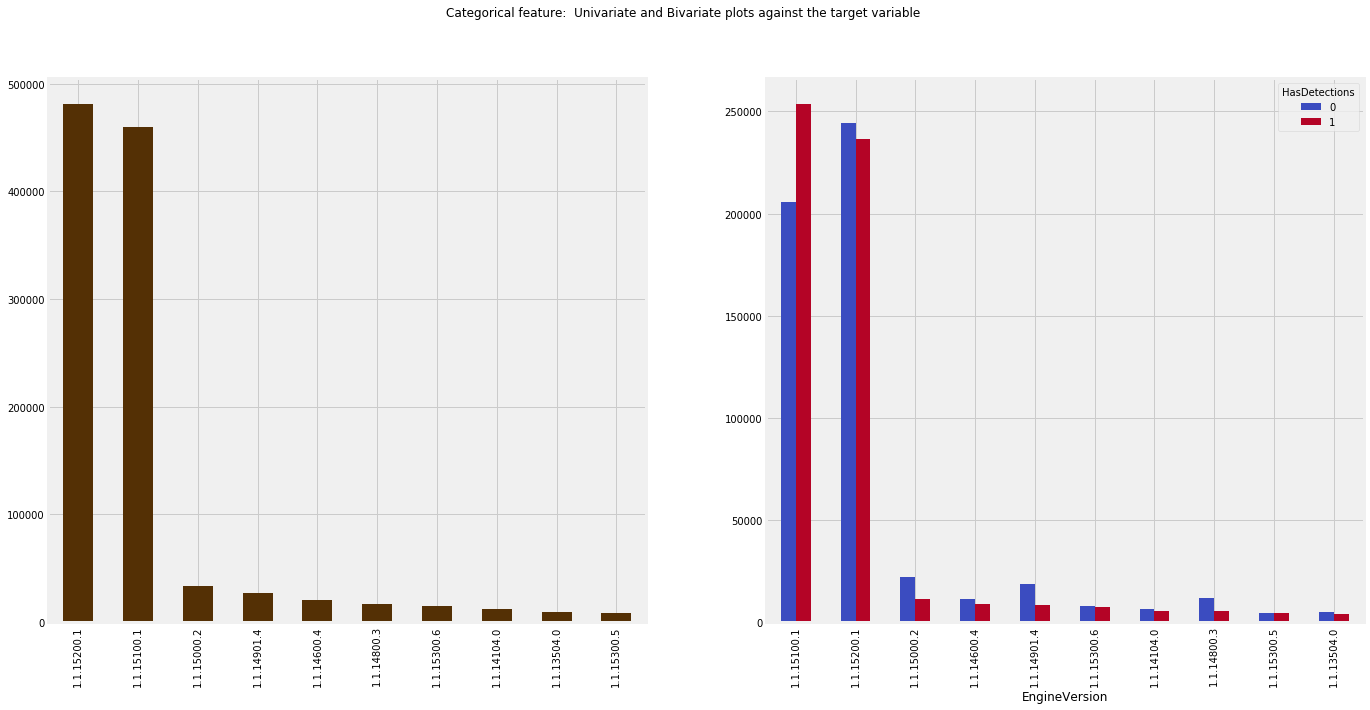

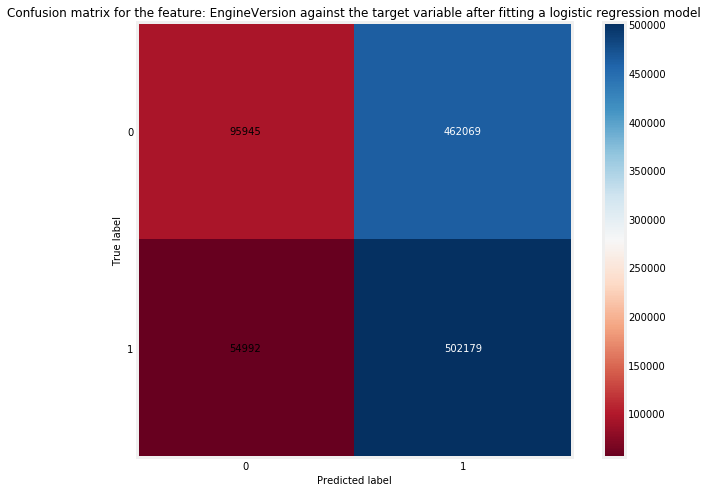

In [25]:
categorical_univariate_and_bivariate_stats(feature="EngineVersion")
logistic_fit(feature="EngineVersion")

We can see that 2 engine versions, "1.1.15200.1" and "1.1.15100.1" is at high frequencies than the rest engine versions. However the version "1.1.15100.1" has more Malware Detections than the rest of the categoeris. Just out of curiosity, fitting a logistic regression for binary classification for this feature against the target variable, It detects the infected systems with precision. However the model is very weak due to its low accuracy and high recall scores, but it can at least predict the infected systems with great precision.

Top 10 most occurred categories for the categorical feature AppVersion
4.18.1807.18075     643421
4.18.1806.18062     105937
4.12.16299.15        45372
4.10.209.0           34040
4.13.17134.1         31964
4.16.17656.18052     29403
4.13.17134.228       28249
4.8.10240.17443      25731
4.9.10586.1106       25397
4.14.17639.18041     23939
Name: AppVersion, dtype: int64

Fitting a logistic regression model for the feature AppVersion against the target variable
              precision    recall  f1-score   support

           0       0.54      0.37      0.44    558014
           1       0.52      0.69      0.59    557171

   micro avg       0.53      0.53      0.53   1115185
   macro avg       0.53      0.53      0.52   1115185
weighted avg       0.53      0.53      0.52   1115185


accuracy score: 0.5303182879970588
F1 score: 0.5303182879970588


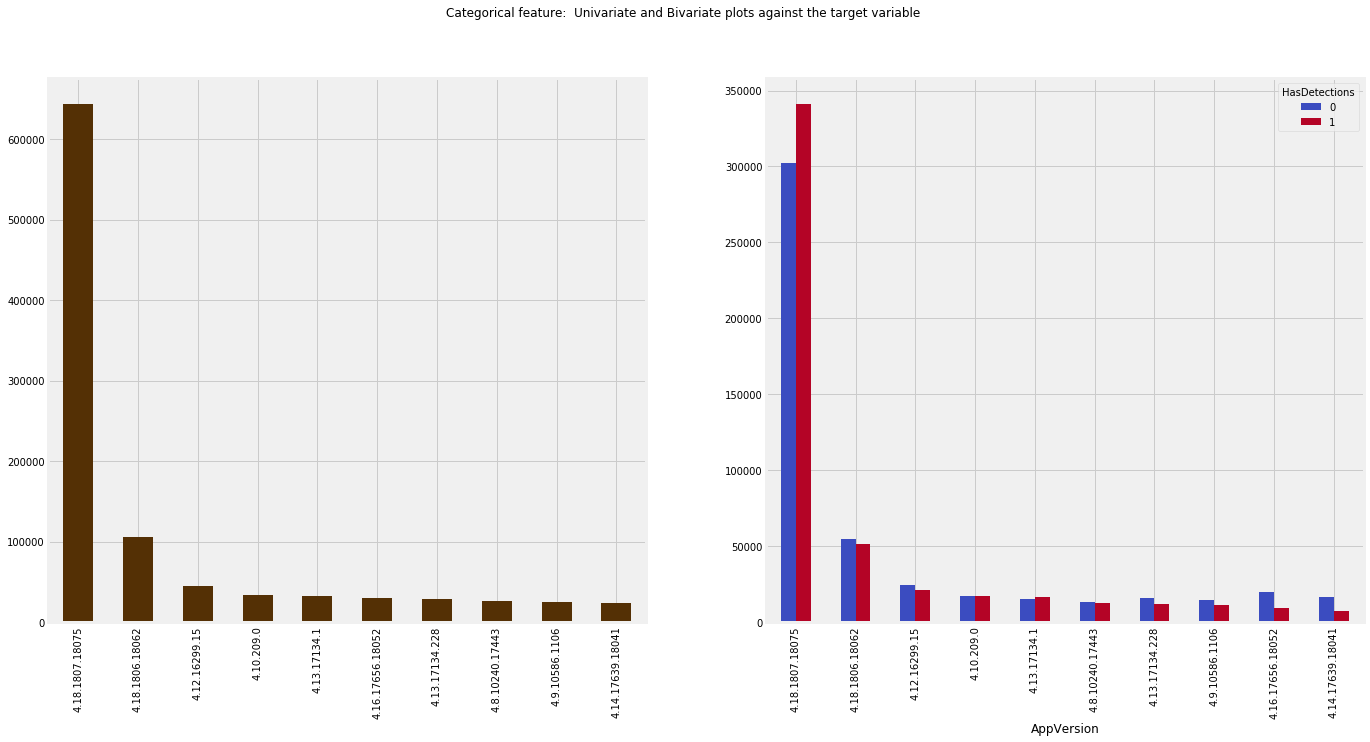

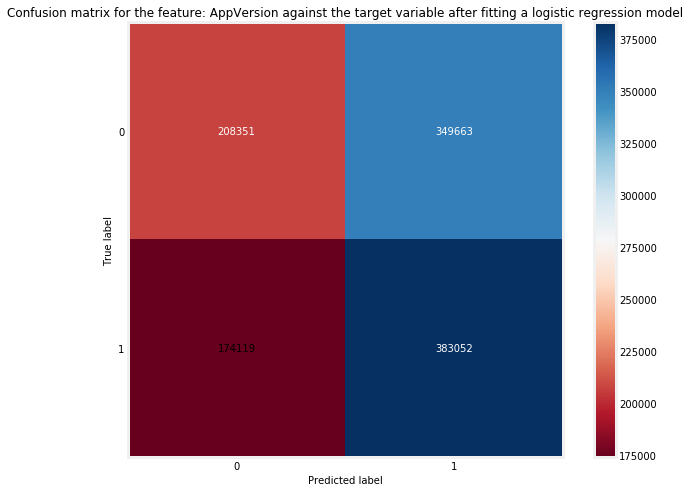

In [26]:
categorical_univariate_and_bivariate_stats(feature="AppVersion")
logistic_fit(feature="AppVersion")

Top 10 most occurred categories for the categorical feature AvSigVersion
1.273.1420.0    12960
1.263.48.0      12250
1.275.1140.0    11968
1.275.727.0     11564
1.273.371.0     10737
1.273.1826.0    10640
1.275.1244.0     9872
1.251.42.0       9609
1.275.1209.0     8343
1.273.810.0      8284
Name: AvSigVersion, dtype: int64

Fitting a logistic regression model for the feature AvSigVersion against the target variable
              precision    recall  f1-score   support

           0       0.53      0.40      0.45    558014
           1       0.52      0.64      0.57    557171

   micro avg       0.52      0.52      0.52   1115185
   macro avg       0.52      0.52      0.51   1115185
weighted avg       0.52      0.52      0.51   1115185


accuracy score: 0.5200285154481095
F1 score: 0.5200285154481095


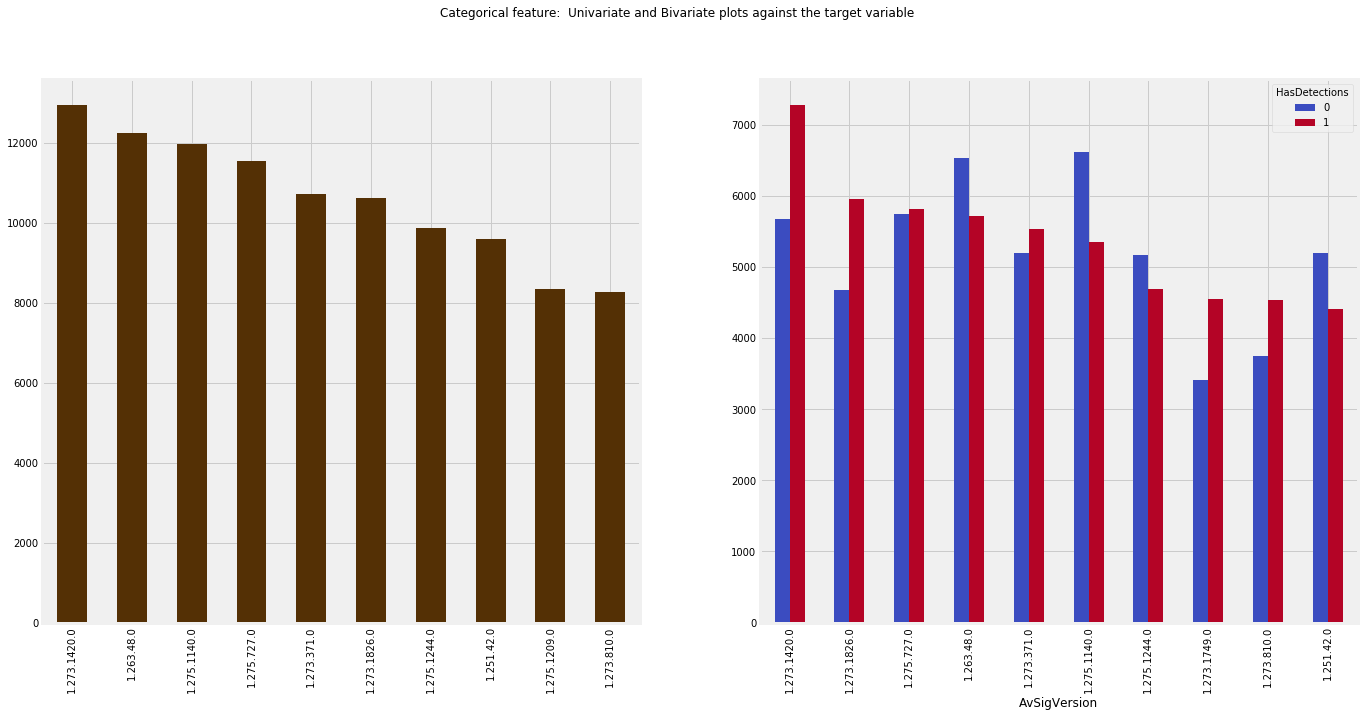

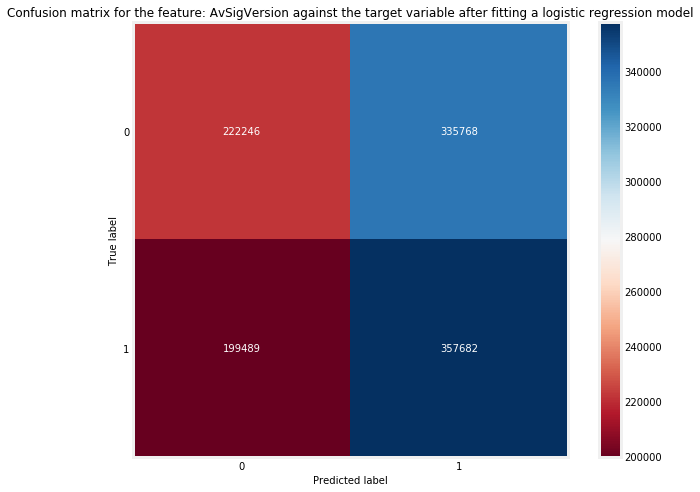

In [27]:
categorical_univariate_and_bivariate_stats(feature="AvSigVersion")
logistic_fit(feature="AvSigVersion")

In [28]:
categorical_univariate_and_bivariate_stats(feature="Platform")
logistic_fit(feature="Platform")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [29]:
categorical_univariate_and_bivariate_stats(feature="Processor")
logistic_fit(feature="Processor")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [30]:
categorical_univariate_and_bivariate_stats(feature="OsVer")
logistic_fit(feature="OsVer")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 most occurred categories for the categorical feature OsPlatformSubRelease
rs4           490150
rs3           313467
rs2            96871
rs1            90828
th2            51450
th1            33774
windows8.1     24212
windows7       11794
prers5          2639
Name: OsPlatformSubRelease, dtype: int64

Fitting a logistic regression model for the feature OsPlatformSubRelease against the target variable
              precision    recall  f1-score   support

           0       0.52      0.47      0.49    558014
           1       0.51      0.56      0.54    557171

   micro avg       0.51      0.51      0.51   1115185
   macro avg       0.51      0.51      0.51   1115185
weighted avg       0.51      0.51      0.51   1115185


accuracy score: 0.5144384115640006
F1 score: 0.5144384115640006


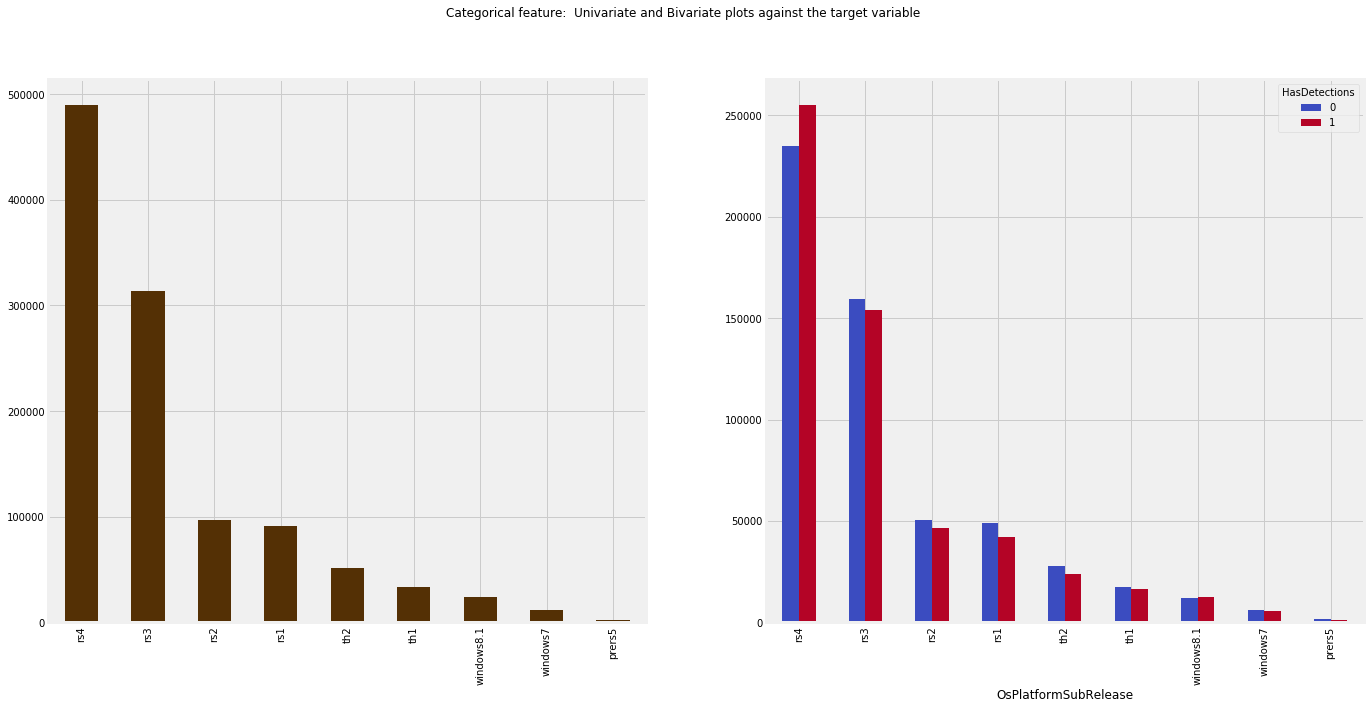

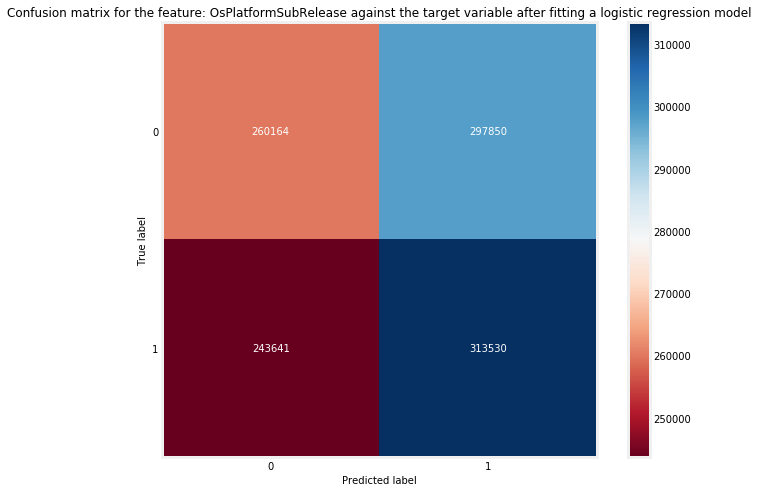

In [31]:
categorical_univariate_and_bivariate_stats(feature="OsPlatformSubRelease")
logistic_fit(feature="OsPlatformSubRelease")

Top 10 most occurred categories for the categorical feature OsBuildLab
17134.1.amd64fre.rs4_release.180410-1804                 458098
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908    156410
16299.15.amd64fre.rs3_release.170928-1534                120788
15063.0.amd64fre.rs2_release.170317-1834                  89130
17134.1.x86fre.rs4_release.180410-1804                    32023
16299.15.x86fre.rs3_release.170928-1534                   29376
14393.2189.amd64fre.rs1_release.180329-1711               23887
10240.17443.amd64fre.th1.170602-2340                      21566
10586.1176.amd64fre.th2_release_sec.170913-1848           18548
15063.0.x86fre.rs2_release.170317-1834                     7741
Name: OsBuildLab, dtype: int64

Fitting a logistic regression model for the feature OsBuildLab against the target variable
              precision    recall  f1-score   support

           0       0.53      0.16      0.25    558013
           1       0.51      0.86      0.64    557170

  

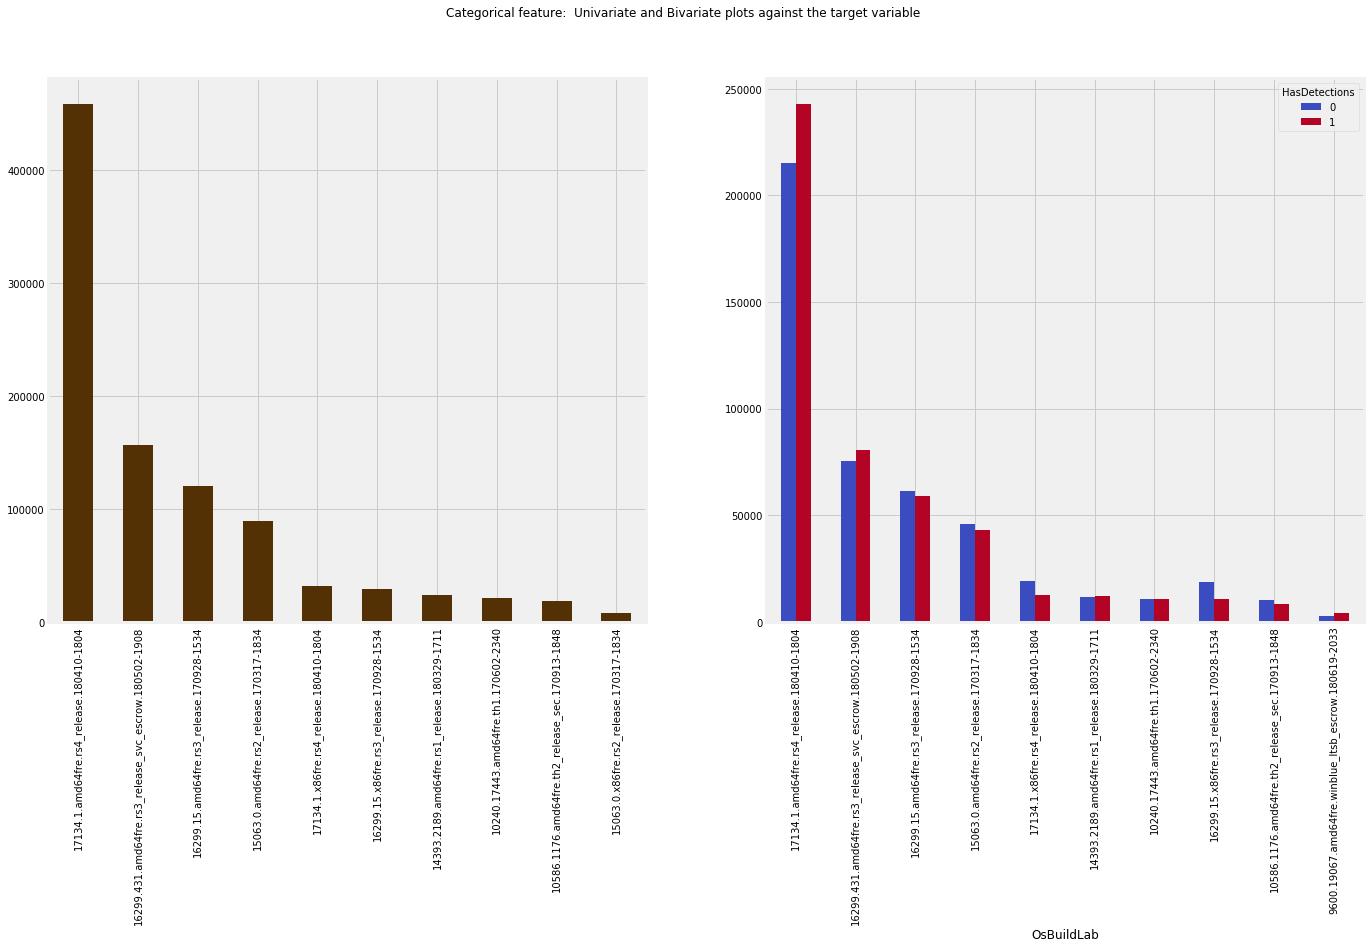

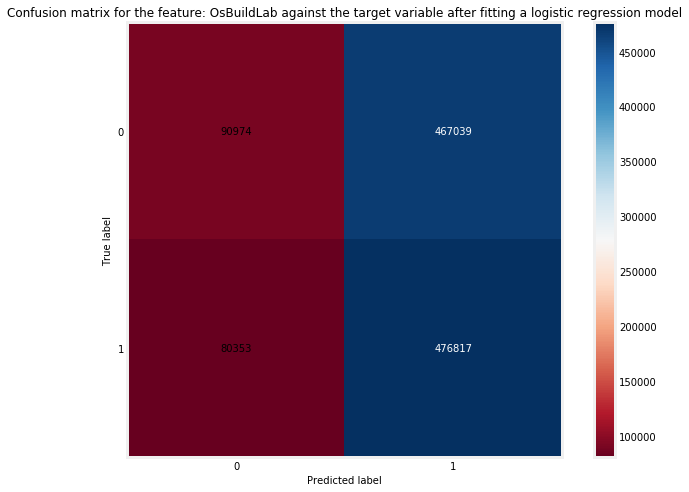

In [32]:
categorical_univariate_and_bivariate_stats(feature="OsBuildLab")
logistic_fit(feature="OsBuildLab")

Top 10 most occurred categories for the categorical feature SmartScreen
RequireAdmin    538991
ExistsNotSet    130758
Off              23218
Warn             17159
Prompt            4350
Block             2821
off                175
On                  99
&#x02;              40
&#x01;              36
Name: SmartScreen, dtype: int64

Fitting a logistic regression model for the feature SmartScreen against the target variable
              precision    recall  f1-score   support

           0       0.56      0.88      0.68    351547
           1       0.75      0.33      0.46    366121

   micro avg       0.60      0.60      0.60    717668
   macro avg       0.65      0.61      0.57    717668
weighted avg       0.65      0.60      0.57    717668


accuracy score: 0.6002315834062547
F1 score: 0.6002315834062547


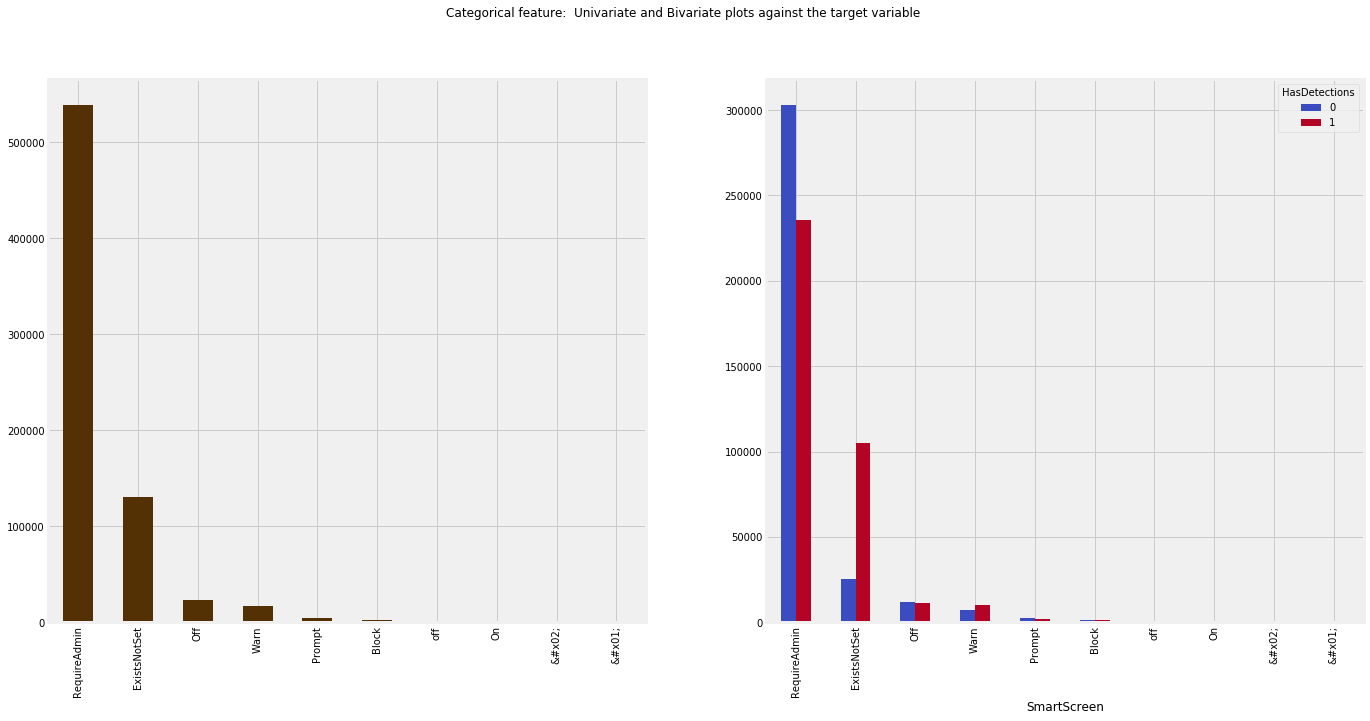

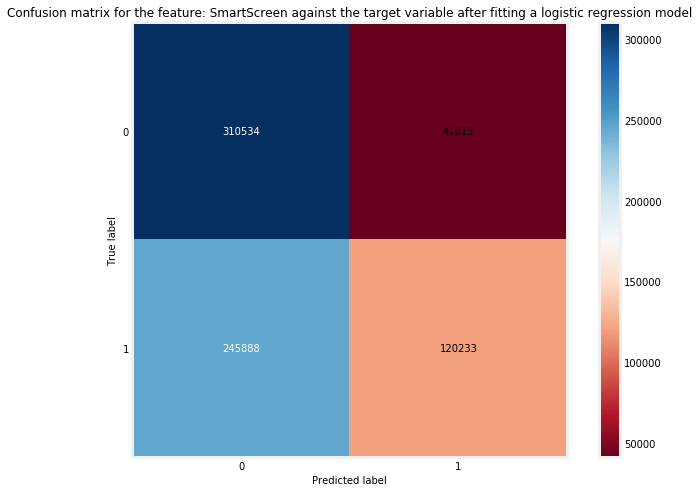

In [33]:
categorical_univariate_and_bivariate_stats(feature="SmartScreen")
logistic_fit(feature="SmartScreen")

Top 10 most occurred categories for the categorical feature Census_MDC2FormFactor
Notebook        715874
Desktop         243333
Convertible      50369
Detachable       37580
AllInOne         36544
PCOther          17519
LargeTablet       8430
SmallTablet       3923
SmallServer       1080
MediumServer       415
Name: Census_MDC2FormFactor, dtype: int64

Fitting a logistic regression model for the feature Census_MDC2FormFactor against the target variable
              precision    recall  f1-score   support

           0       0.50      0.66      0.57    558014
           1       0.50      0.34      0.40    557171

   micro avg       0.50      0.50      0.50   1115185
   macro avg       0.50      0.50      0.49   1115185
weighted avg       0.50      0.50      0.49   1115185


accuracy score: 0.4996641812793393
F1 score: 0.4996641812793393


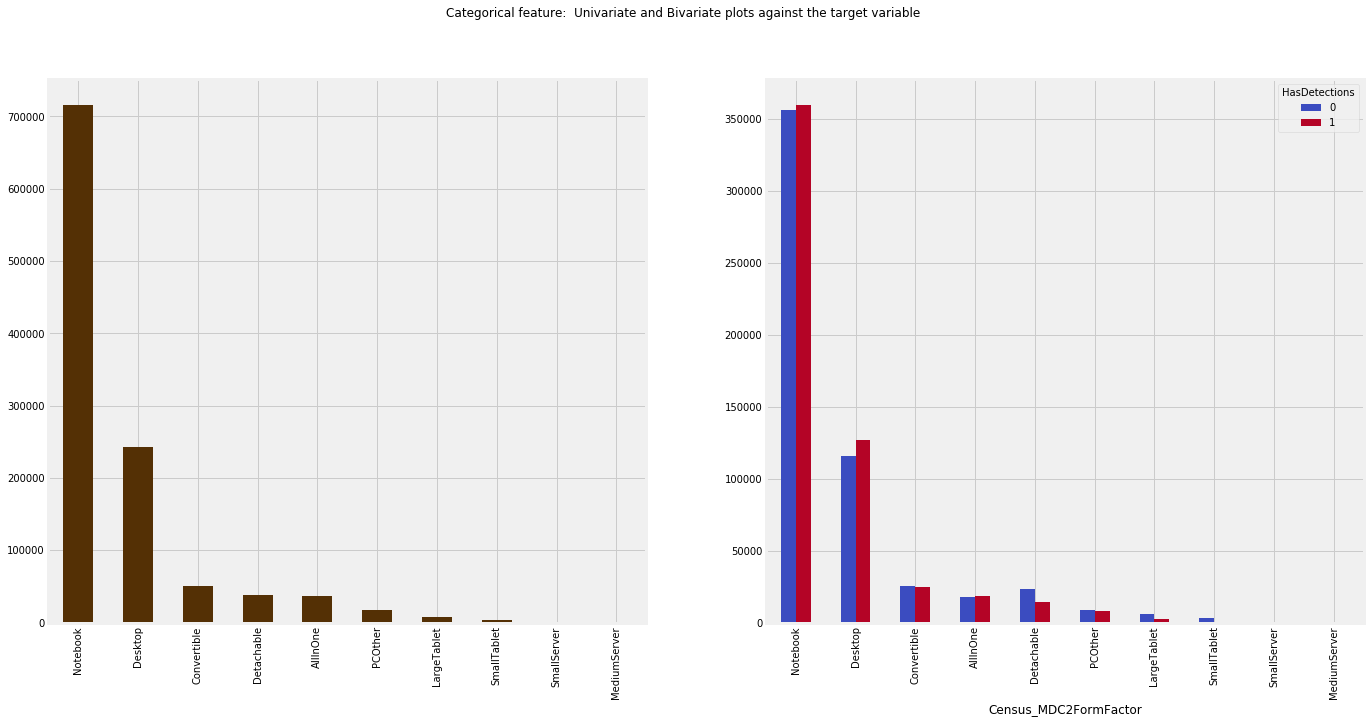

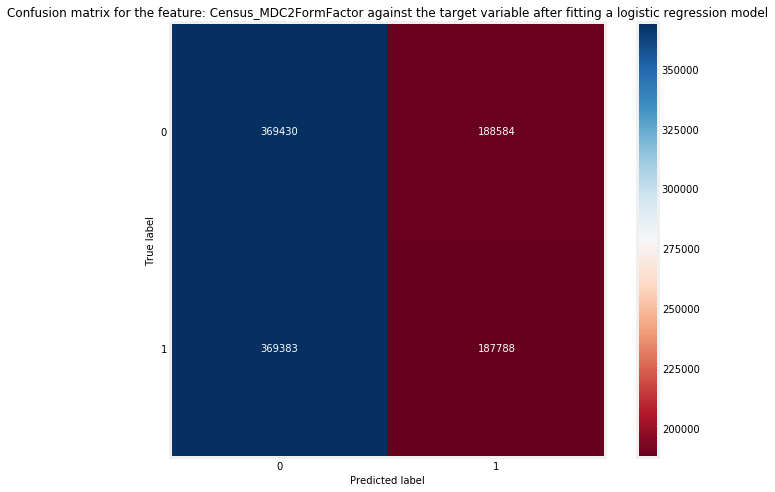

In [34]:
categorical_univariate_and_bivariate_stats(feature="Census_MDC2FormFactor")
logistic_fit(feature="Census_MDC2FormFactor")

Top 10 most occurred categories for the categorical feature Census_ChassisTypeName
Notebook       656645
Desktop        233454
Laptop          85492
Portable        45261
AllinOne        25526
MiniTower       10662
Convertible     10541
Other            9592
UNKNOWN          8207
Detachable       6485
Name: Census_ChassisTypeName, dtype: int64

Fitting a logistic regression model for the feature Census_ChassisTypeName against the target variable
              precision    recall  f1-score   support

           0       0.50      0.67      0.58    557977
           1       0.51      0.34      0.41    557140

   micro avg       0.51      0.51      0.51   1115117
   macro avg       0.51      0.51      0.49   1115117
weighted avg       0.51      0.51      0.49   1115117


accuracy score: 0.5061935205005395
F1 score: 0.5061935205005395


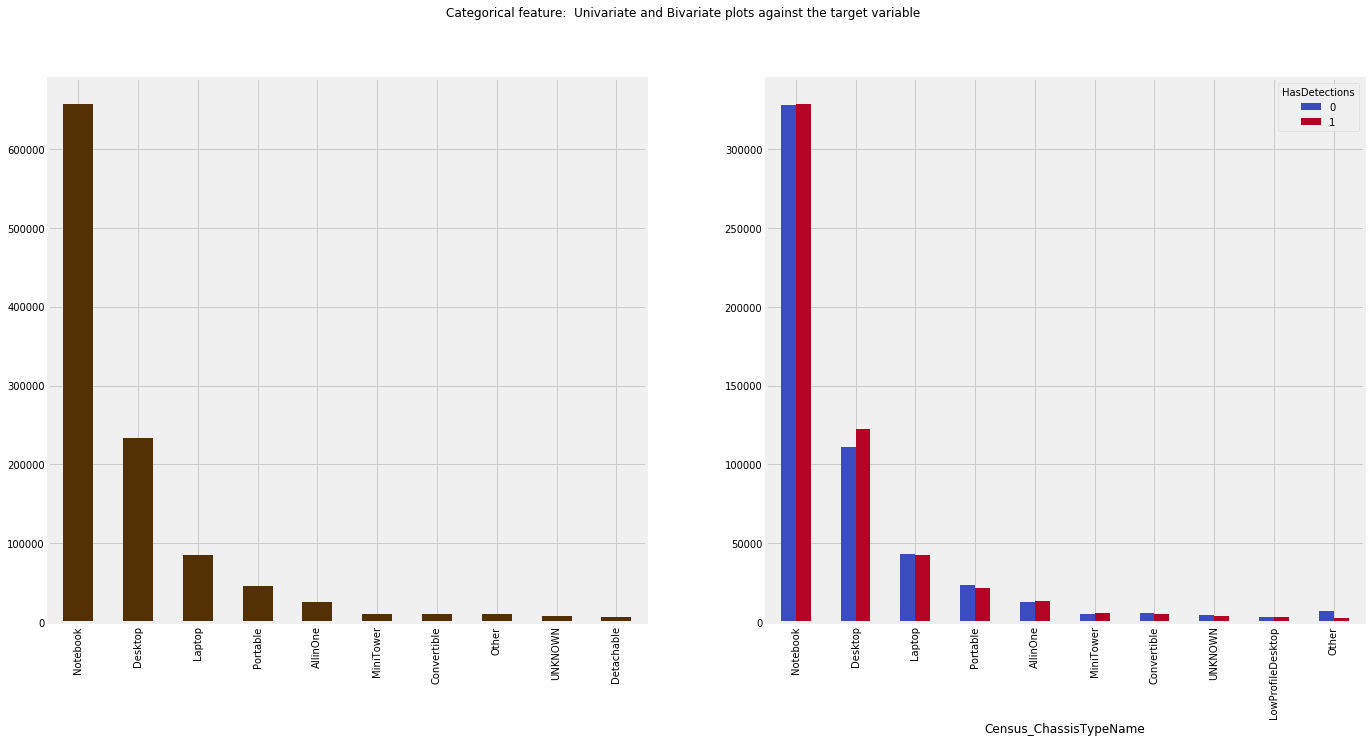

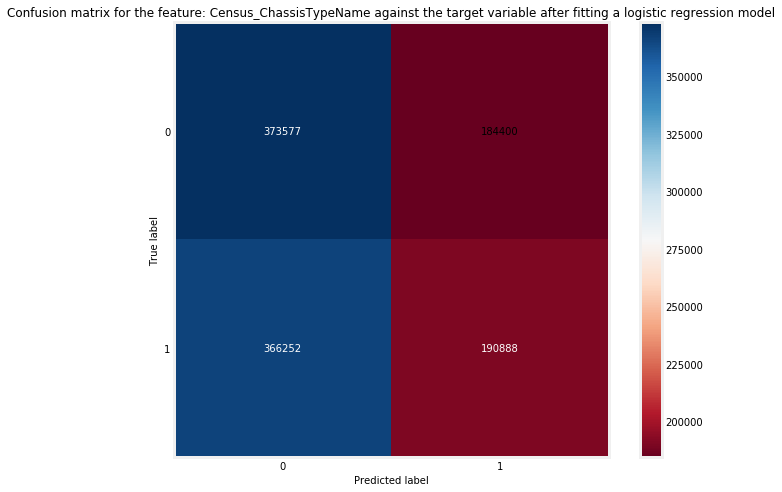

In [35]:
categorical_univariate_and_bivariate_stats(feature="Census_ChassisTypeName")
logistic_fit(feature="Census_ChassisTypeName")

Top 10 most occurred categories for the categorical feature Census_PowerPlatformRoleName
Mobile               773077
Desktop              257859
Slate                 61822
Workstation           13748
SOHOServer             4693
UNKNOWN                2567
EnterpriseServer        903
AppliancePC             493
PerformanceServer        15
Unspecified               1
Name: Census_PowerPlatformRoleName, dtype: int64

Fitting a logistic regression model for the feature Census_PowerPlatformRoleName against the target variable
              precision    recall  f1-score   support

           0       0.51      0.78      0.61    558009
           1       0.52      0.24      0.33    557169

   micro avg       0.51      0.51      0.51   1115178
   macro avg       0.52      0.51      0.47   1115178
weighted avg       0.52      0.51      0.47   1115178


accuracy score: 0.5113748657165045
F1 score: 0.5113748657165045


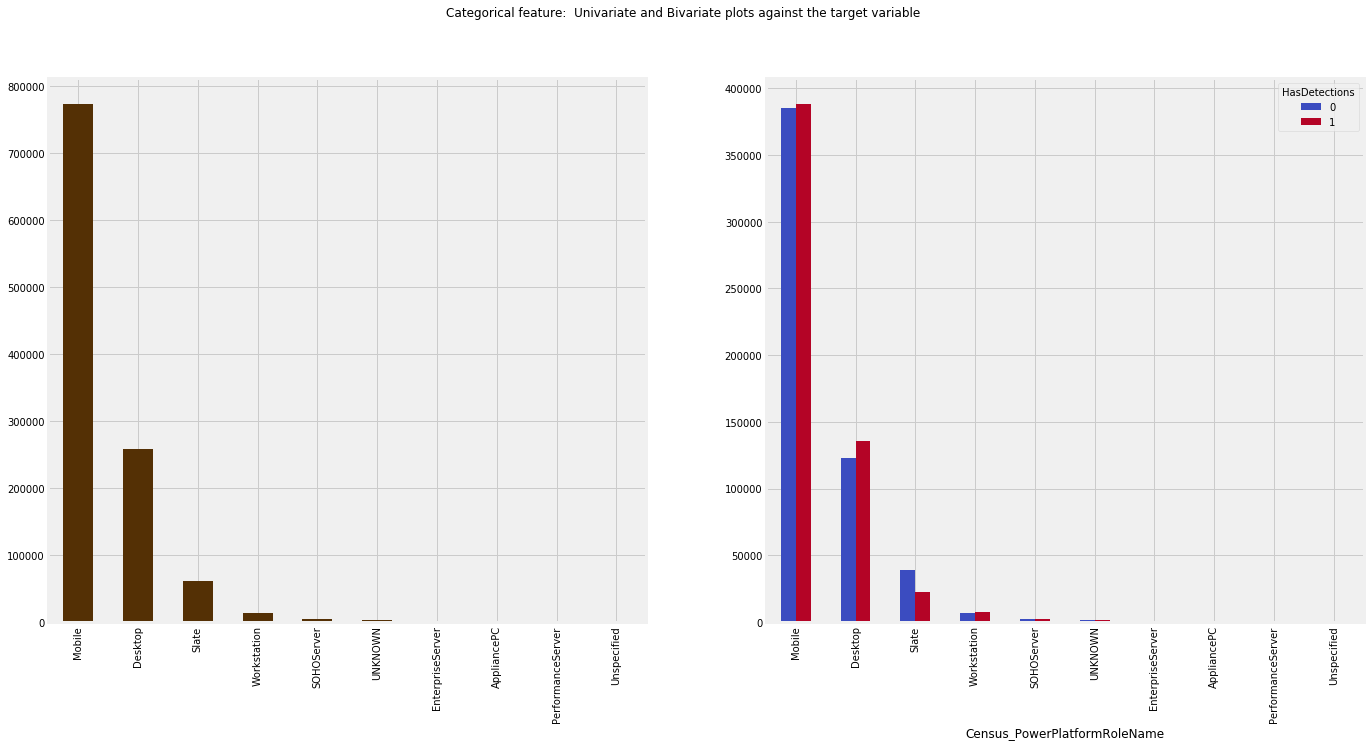

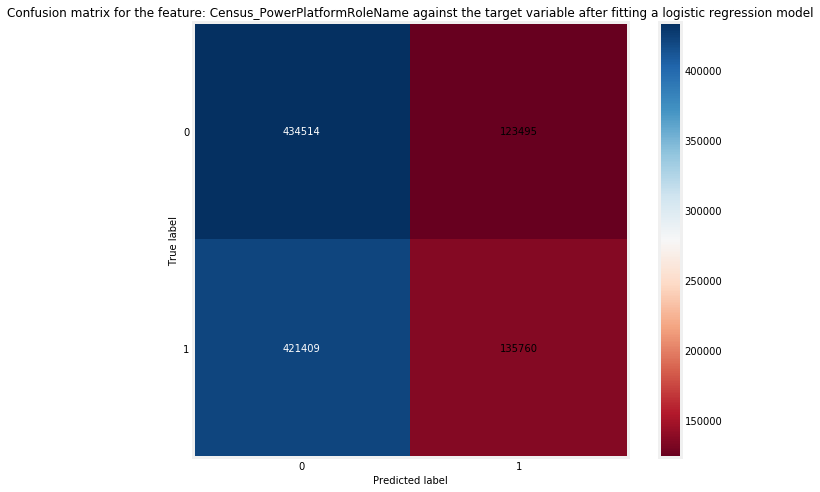

In [36]:
categorical_univariate_and_bivariate_stats(feature="Census_PowerPlatformRoleName")
logistic_fit(feature="Census_PowerPlatformRoleName")

Top 10 most occurred categories for the categorical feature Census_InternalBatteryType
lion    253563
li-i     30883
#        22973
lip       7578
liio      4127
li p      1030
li         844
nimh       571
real       347
bq20       298
Name: Census_InternalBatteryType, dtype: int64

Fitting a logistic regression model for the feature Census_InternalBatteryType against the target variable
              precision    recall  f1-score   support

           0       0.52      0.93      0.67    166257
           1       0.51      0.08      0.13    156693

   micro avg       0.52      0.52      0.52    322950
   macro avg       0.52      0.50      0.40    322950
weighted avg       0.52      0.52      0.41    322950


accuracy score: 0.5168911596222325
F1 score: 0.5168911596222325


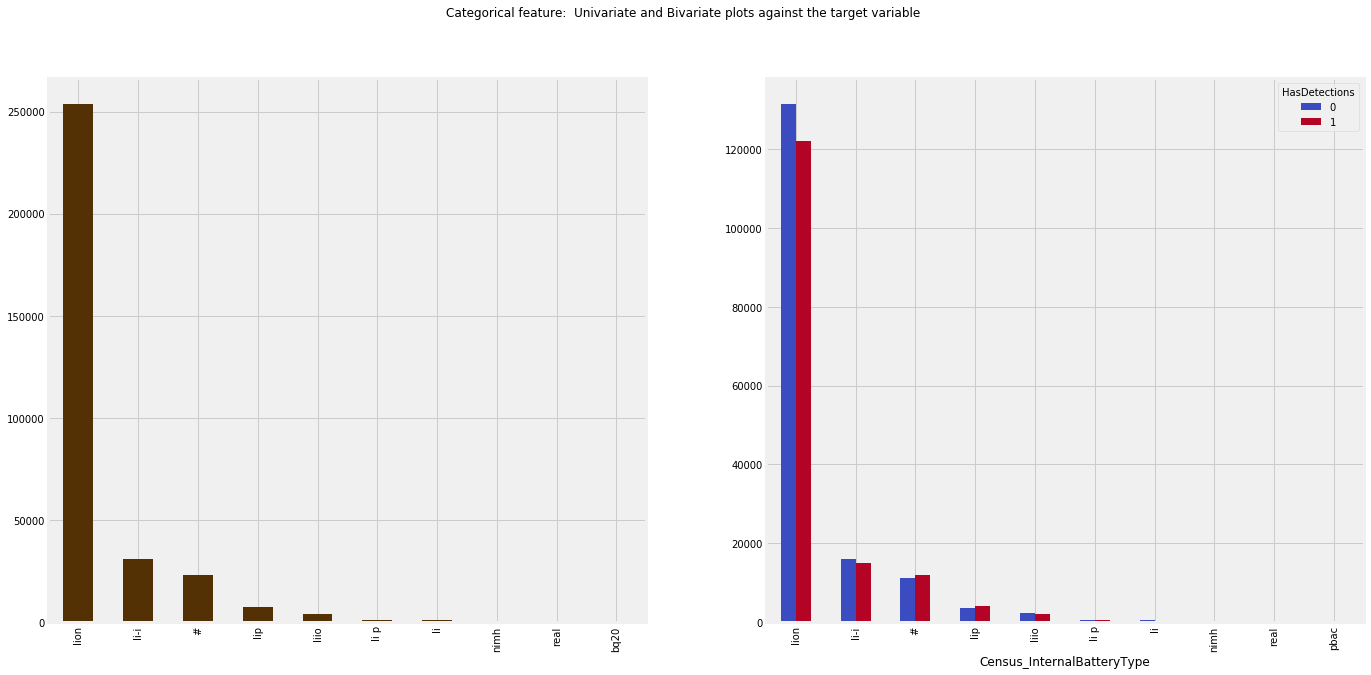

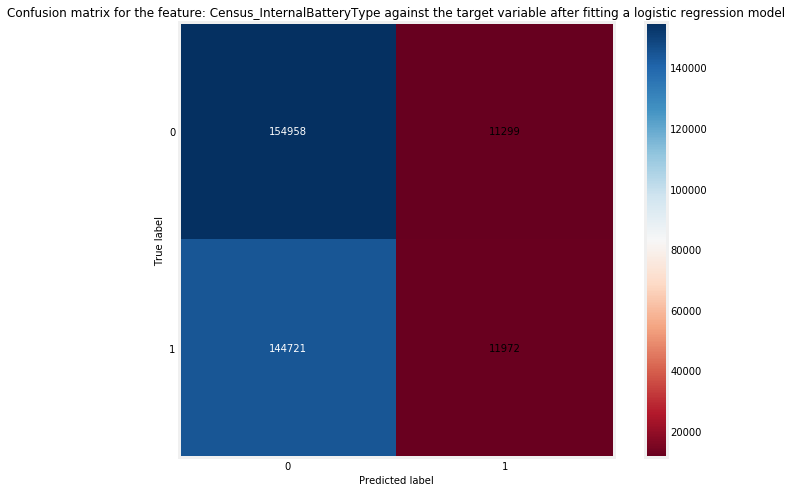

In [37]:
categorical_univariate_and_bivariate_stats(feature="Census_InternalBatteryType")
logistic_fit(feature="Census_InternalBatteryType")

Top 10 most occurred categories for the categorical feature Census_OSVersion
10.0.17134.228     177208
10.0.17134.165     112313
10.0.16299.431      68557
10.0.17134.285      58503
10.0.17134.112      43338
10.0.16299.547      42892
10.0.16299.371      40719
10.0.17134.191      28868
10.0.14393.2189     27641
10.0.16299.611      27255
Name: Census_OSVersion, dtype: int64

Fitting a logistic regression model for the feature Census_OSVersion against the target variable
              precision    recall  f1-score   support

           0       0.53      0.32      0.40    558014
           1       0.51      0.71      0.59    557171

   micro avg       0.52      0.52      0.52   1115185
   macro avg       0.52      0.52      0.50   1115185
weighted avg       0.52      0.52      0.50   1115185


accuracy score: 0.5155054990875954
F1 score: 0.5155054990875954


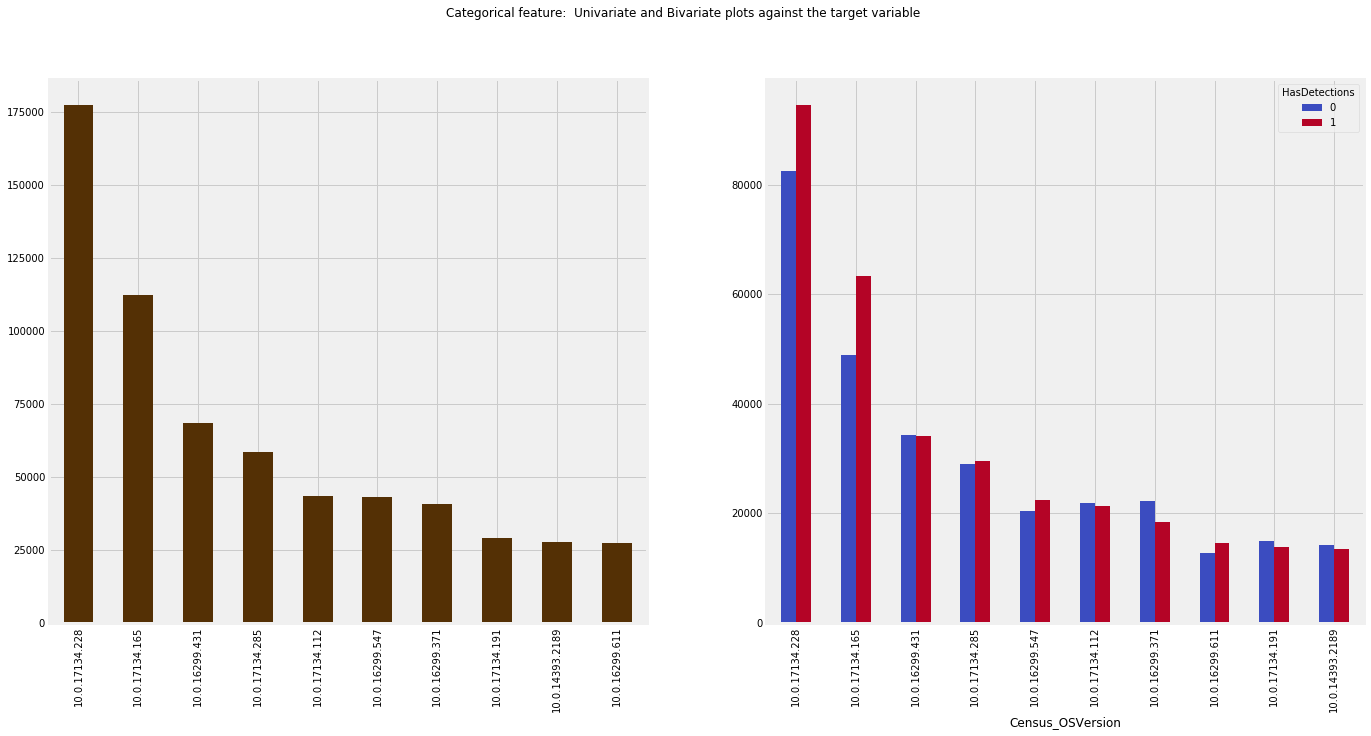

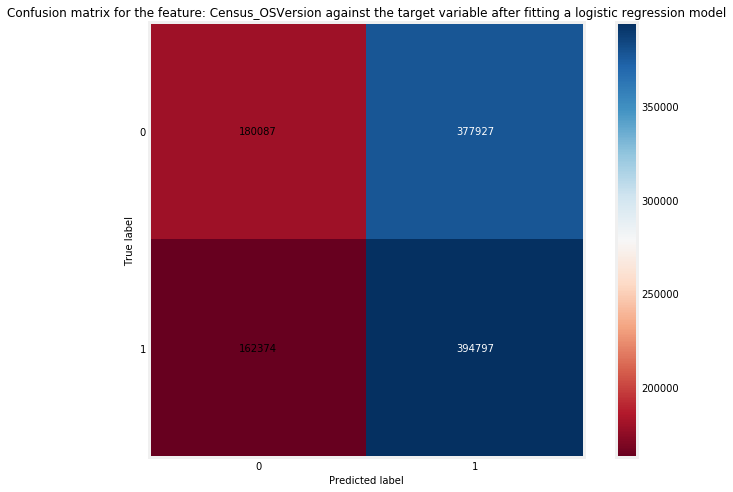

In [38]:
categorical_univariate_and_bivariate_stats(feature="Census_OSVersion")
logistic_fit(feature="Census_OSVersion")

In [39]:
categorical_univariate_and_bivariate_stats(feature="Census_OSArchitecture")
logistic_fit(feature="Census_OSArchitecture")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 most occurred categories for the categorical feature Census_OSBranch
rs4_release               501886
rs3_release               155306
rs3_release_svc_escrow    149912
rs2_release                98886
rs1_release                97532
th2_release                40938
th2_release_sec            33347
th1_st1                    24483
th1                         9489
rs5_release                 1909
Name: Census_OSBranch, dtype: int64

Fitting a logistic regression model for the feature Census_OSBranch against the target variable
              precision    recall  f1-score   support

           0       0.52      0.47      0.49    558014
           1       0.51      0.56      0.54    557171

   micro avg       0.52      0.52      0.52   1115185
   macro avg       0.52      0.52      0.51   1115185
weighted avg       0.52      0.52      0.51   1115185


accuracy score: 0.5152535229580743
F1 score: 0.5152535229580743


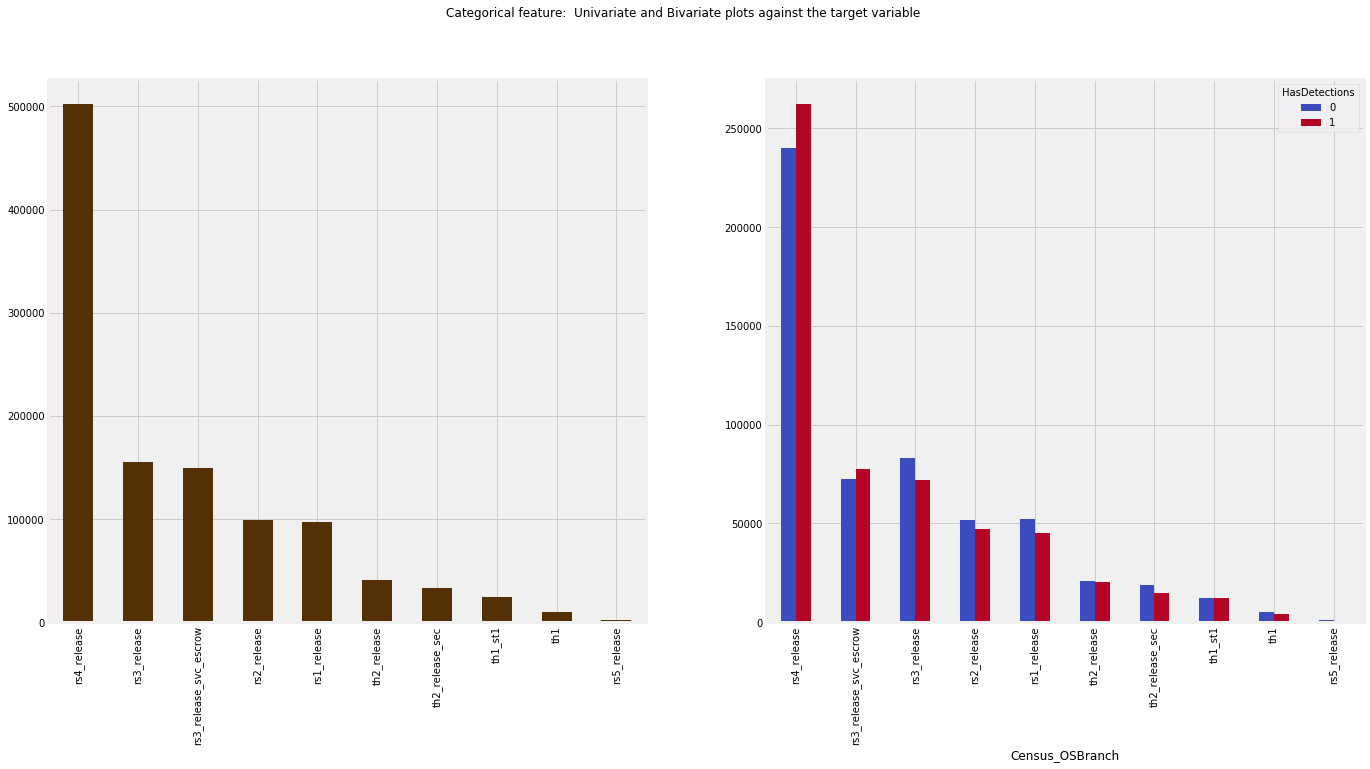

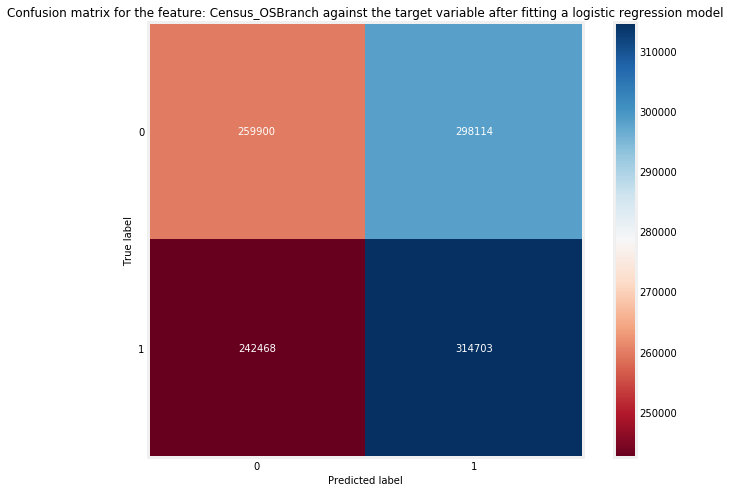

In [40]:
categorical_univariate_and_bivariate_stats(feature="Census_OSBranch")
logistic_fit(feature="Census_OSBranch")

Top 10 most occurred categories for the categorical feature Census_OSEdition
Core                     434208
Professional             391431
CoreSingleLanguage       243043
CoreCountrySpecific       20417
ProfessionalEducation      6991
Education                  5109
Enterprise                 4428
ProfessionalN              3584
EnterpriseS                2509
ServerStandard             1280
Name: Census_OSEdition, dtype: int64

Fitting a logistic regression model for the feature Census_OSEdition against the target variable
              precision    recall  f1-score   support

           0       0.51      0.64      0.57    558014
           1       0.51      0.38      0.43    557171

   micro avg       0.51      0.51      0.51   1115185
   macro avg       0.51      0.51      0.50   1115185
weighted avg       0.51      0.51      0.50   1115185


accuracy score: 0.50940875280783
F1 score: 0.50940875280783


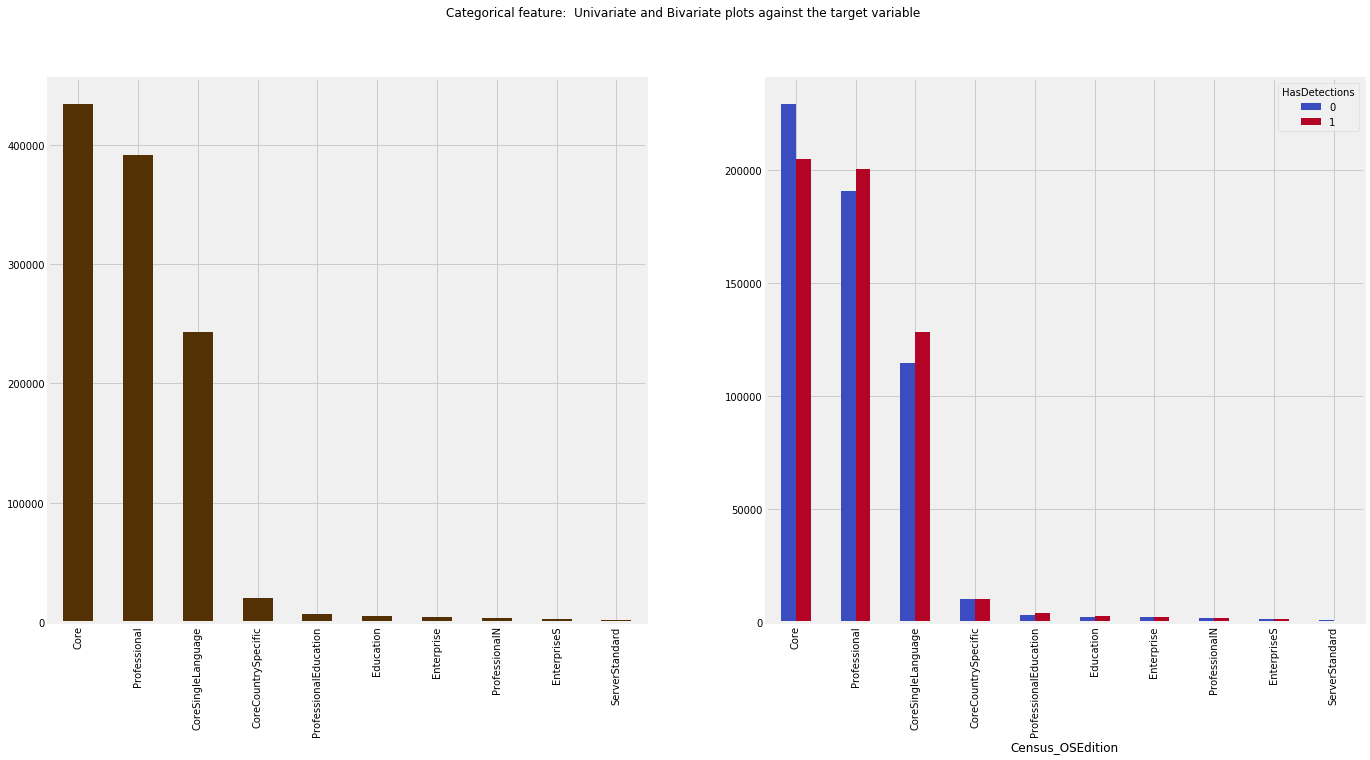

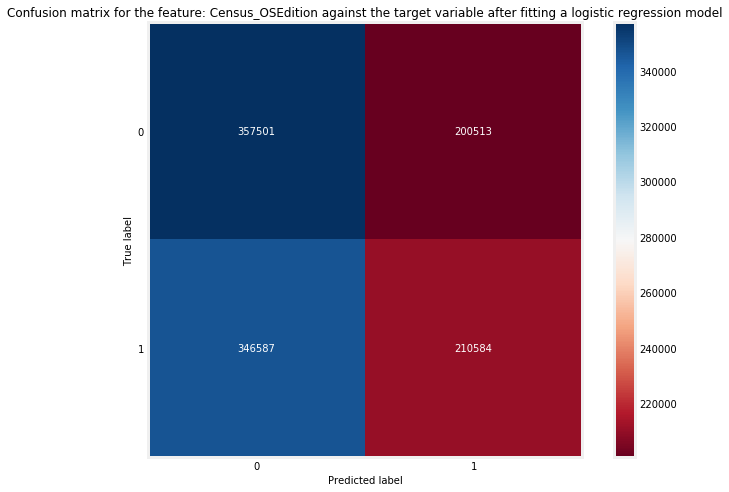

In [41]:
categorical_univariate_and_bivariate_stats(feature="Census_OSEdition")
logistic_fit(feature="Census_OSEdition")

Top 10 most occurred categories for the categorical feature Census_OSSkuName
CORE                    434201
PROFESSIONAL            398499
CORE_SINGLELANGUAGE     242994
CORE_COUNTRYSPECIFIC     20387
EDUCATION                 5120
ENTERPRISE                4440
PROFESSIONAL_N            3610
ENTERPRISE_S              2508
STANDARD_SERVER           1279
CLOUD                      736
Name: Census_OSSkuName, dtype: int64

Fitting a logistic regression model for the feature Census_OSSkuName against the target variable
              precision    recall  f1-score   support

           0       0.51      0.64      0.57    558014
           1       0.51      0.38      0.44    557171

   micro avg       0.51      0.51      0.51   1115185
   macro avg       0.51      0.51      0.50   1115185
weighted avg       0.51      0.51      0.50   1115185


accuracy score: 0.5094069593834207
F1 score: 0.5094069593834207


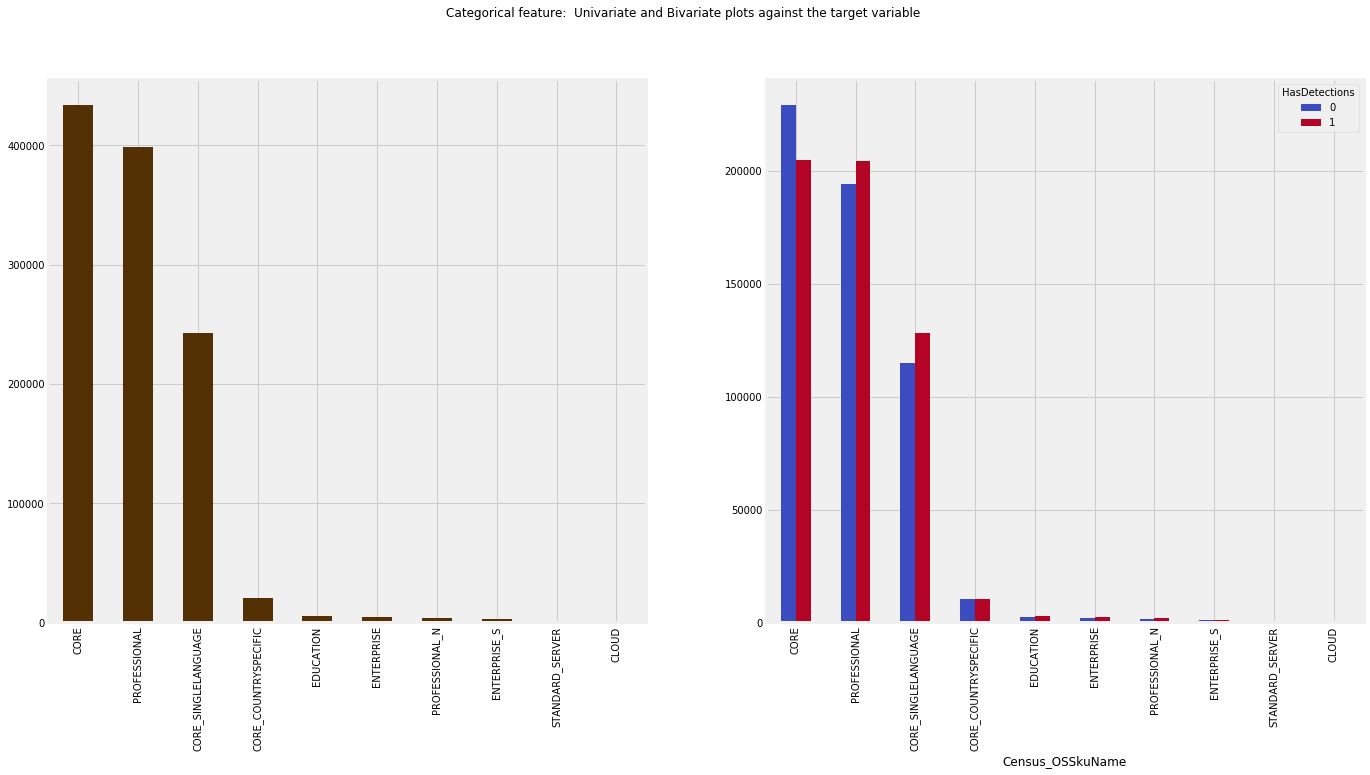

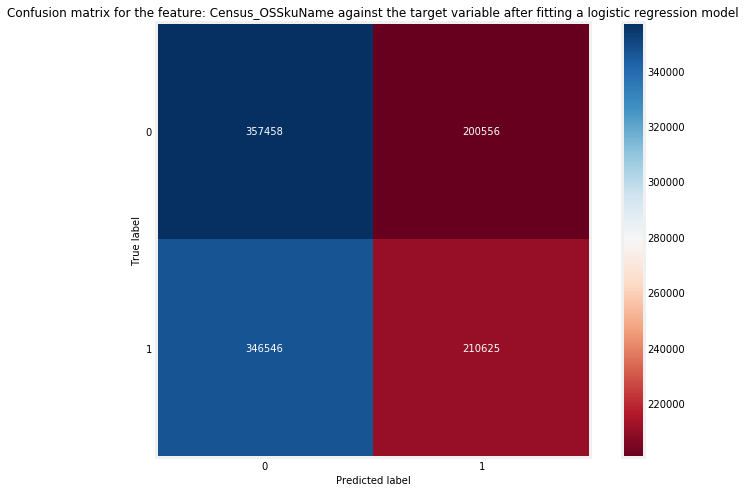

In [42]:
categorical_univariate_and_bivariate_stats(feature="Census_OSSkuName")
logistic_fit(feature="Census_OSSkuName")

Top 10 most occurred categories for the categorical feature Census_OSInstallTypeName
UUPUpgrade        326629
IBSClean          206372
Update            198885
Upgrade           156500
Other             104552
Reset              81161
Refresh            25796
Clean               8597
CleanPCRefresh      6693
Name: Census_OSInstallTypeName, dtype: int64

Fitting a logistic regression model for the feature Census_OSInstallTypeName against the target variable
              precision    recall  f1-score   support

           0       0.50      0.61      0.55    558014
           1       0.50      0.39      0.44    557171

   micro avg       0.50      0.50      0.50   1115185
   macro avg       0.50      0.50      0.49   1115185
weighted avg       0.50      0.50      0.49   1115185


accuracy score: 0.49998610096082713
F1 score: 0.49998610096082713


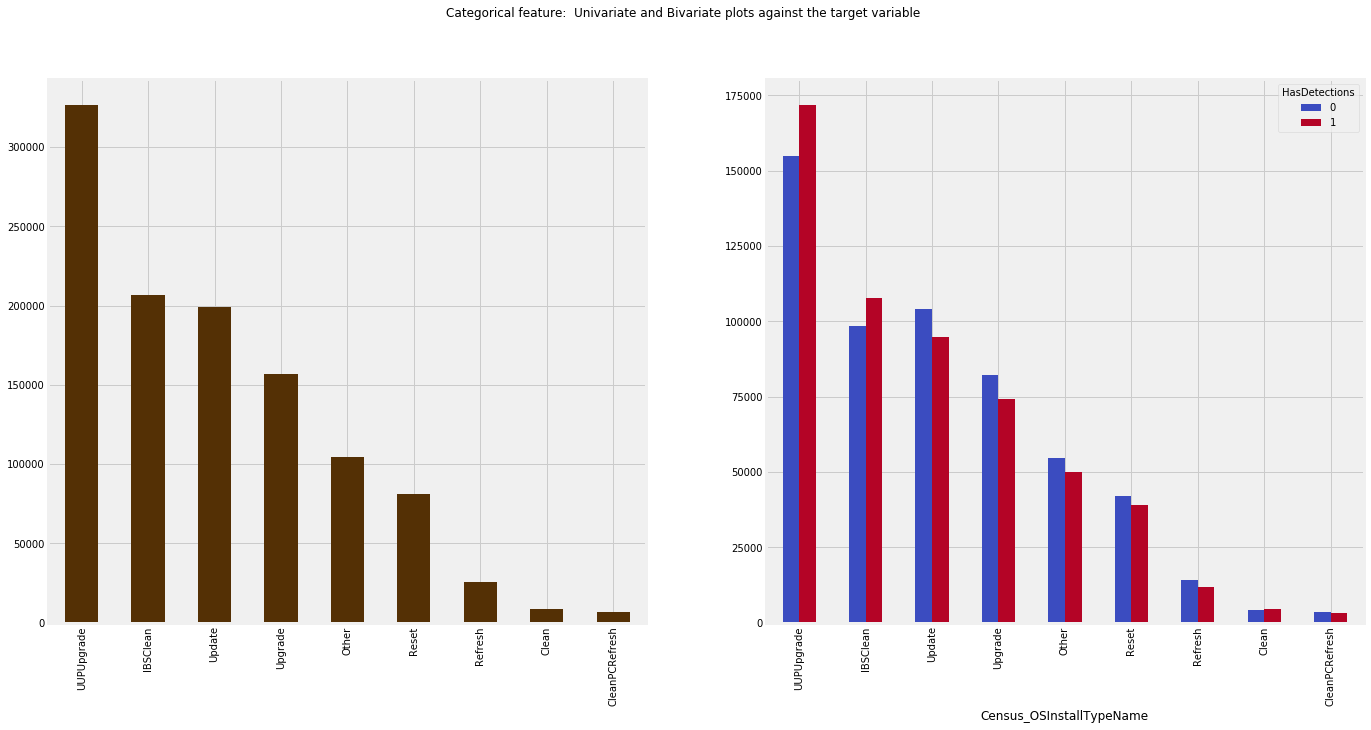

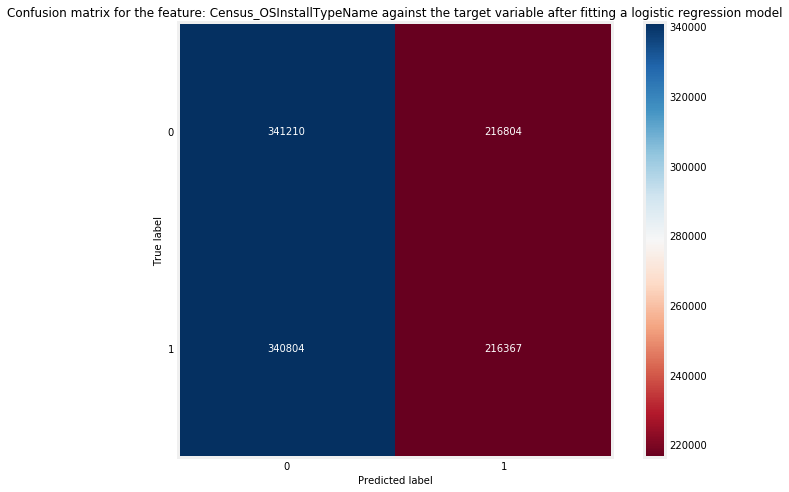

In [43]:
categorical_univariate_and_bivariate_stats(feature="Census_OSInstallTypeName")
logistic_fit(feature="Census_OSInstallTypeName")

Top 10 most occurred categories for the categorical feature Census_OSWUAutoUpdateOptionsName
FullAuto                                 494833
UNKNOWN                                  314831
Notify                                   254069
AutoInstallAndRebootAtMaintenanceTime     46313
Off                                        3350
DownloadNotify                             1789
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64

Fitting a logistic regression model for the feature Census_OSWUAutoUpdateOptionsName against the target variable
              precision    recall  f1-score   support

           0       0.51      0.53      0.52    558014
           1       0.51      0.50      0.51    557171

   micro avg       0.51      0.51      0.51   1115185
   macro avg       0.51      0.51      0.51   1115185
weighted avg       0.51      0.51      0.51   1115185


accuracy score: 0.512728381389635
F1 score: 0.512728381389635


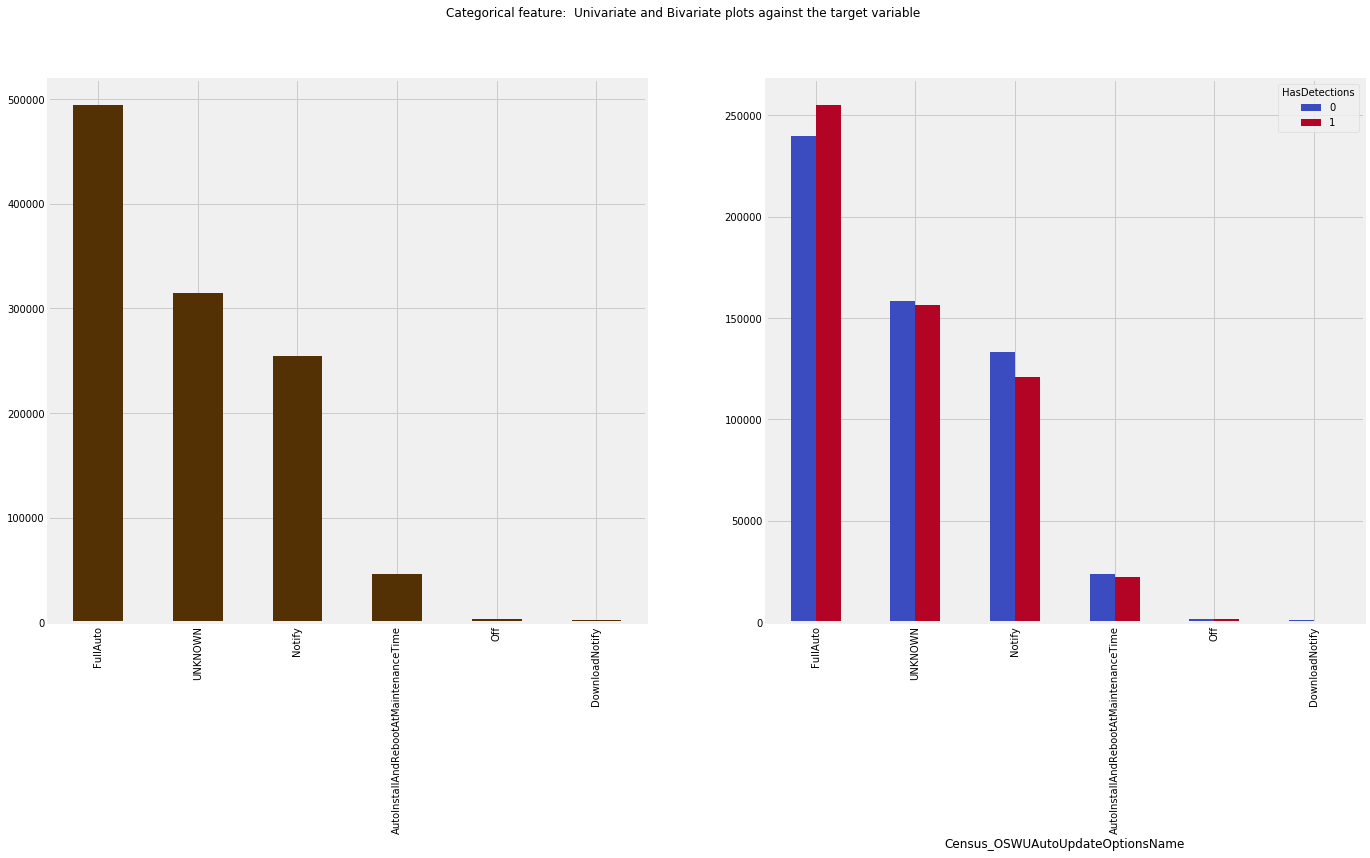

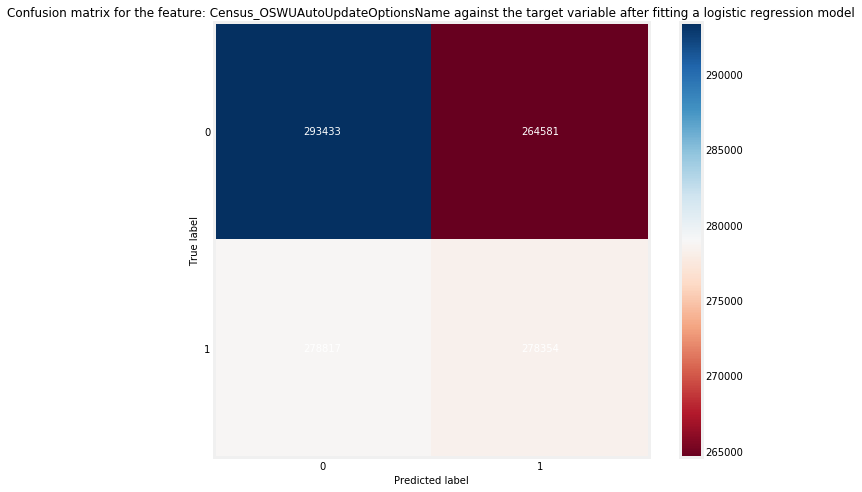

In [44]:
categorical_univariate_and_bivariate_stats(feature="Census_OSWUAutoUpdateOptionsName")
logistic_fit(feature="Census_OSWUAutoUpdateOptionsName")

Top 10 most occurred categories for the categorical feature Census_GenuineStateName
IS_GENUINE         984633
INVALID_LICENSE    100314
OFFLINE             28526
UNKNOWN              1712
TAMPERED                0
Name: Census_GenuineStateName, dtype: int64

Fitting a logistic regression model for the feature Census_GenuineStateName against the target variable
              precision    recall  f1-score   support

           0       0.51      0.09      0.15    558014
           1       0.50      0.91      0.65    557171

   micro avg       0.50      0.50      0.50   1115185
   macro avg       0.50      0.50      0.40   1115185
weighted avg       0.50      0.50      0.40   1115185


accuracy score: 0.5009796580836363
F1 score: 0.5009796580836363


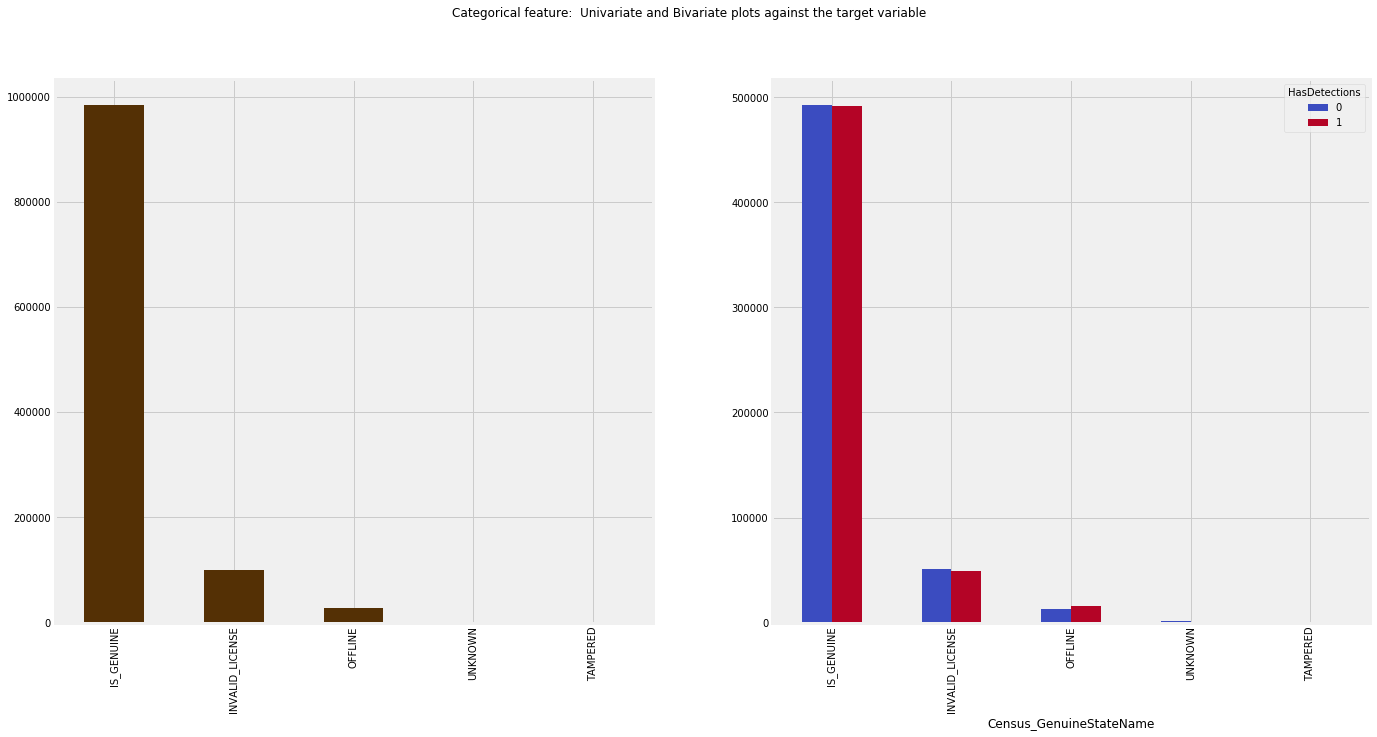

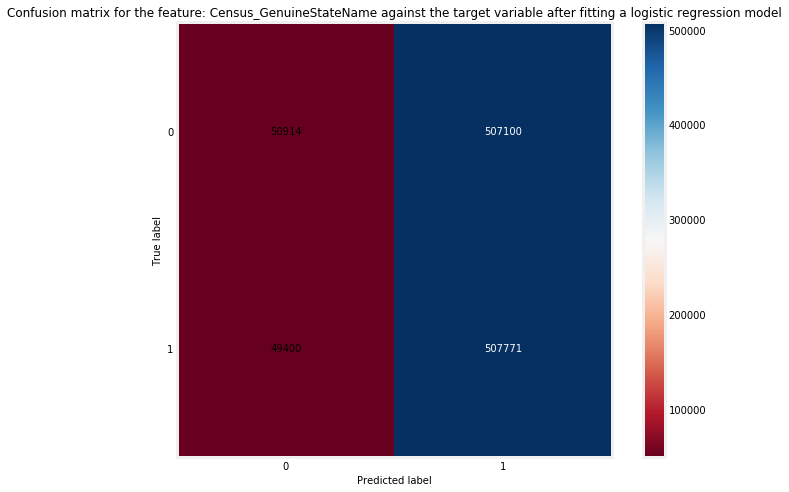

In [45]:
categorical_univariate_and_bivariate_stats(feature="Census_GenuineStateName")
logistic_fit(feature="Census_GenuineStateName")

Top 10 most occurred categories for the categorical feature Census_ActivationChannel
Retail            590746
OEM:DM            427066
Volume:GVLK        56125
OEM:NONSLP         39801
Volume:MAK          1019
Retail:TB:Eval       428
Name: Census_ActivationChannel, dtype: int64

Fitting a logistic regression model for the feature Census_ActivationChannel against the target variable
              precision    recall  f1-score   support

           0       0.50      0.42      0.46    558014
           1       0.50      0.58      0.54    557171

   micro avg       0.50      0.50      0.50   1115185
   macro avg       0.50      0.50      0.50   1115185
weighted avg       0.50      0.50      0.50   1115185


accuracy score: 0.500944686307653
F1 score: 0.500944686307653


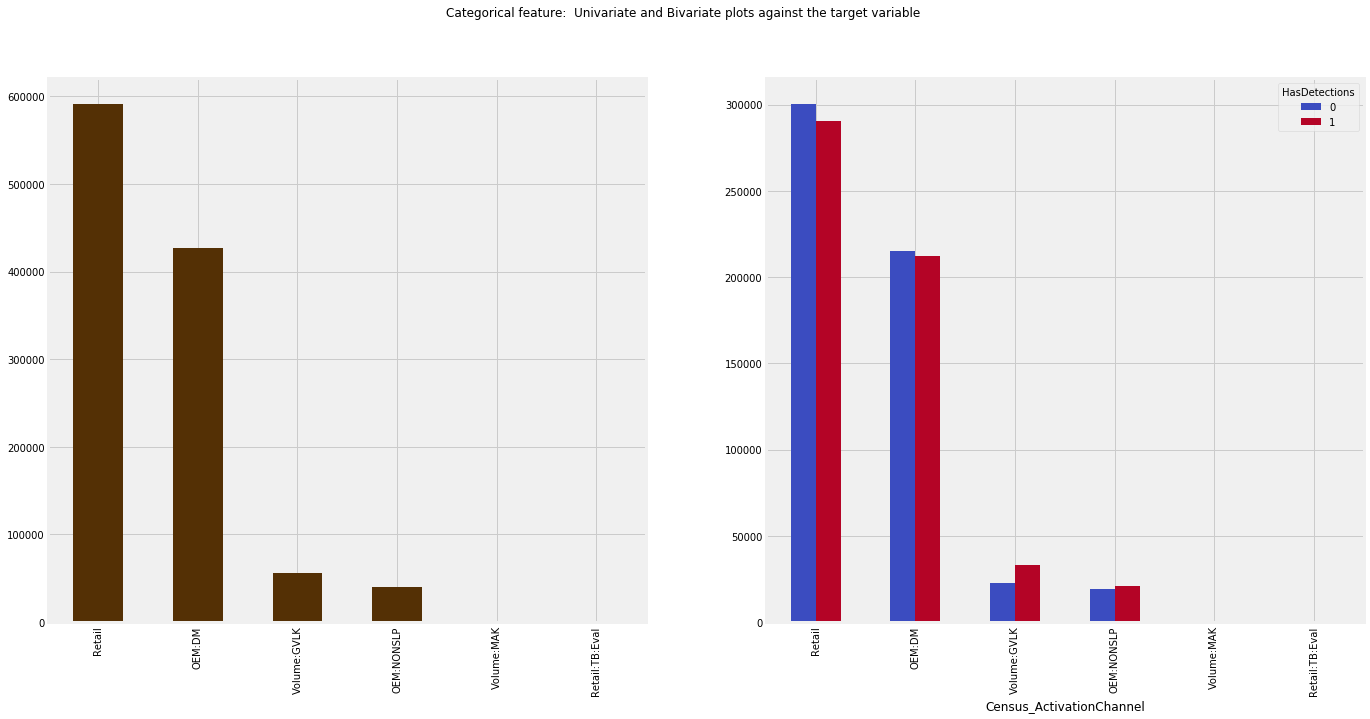

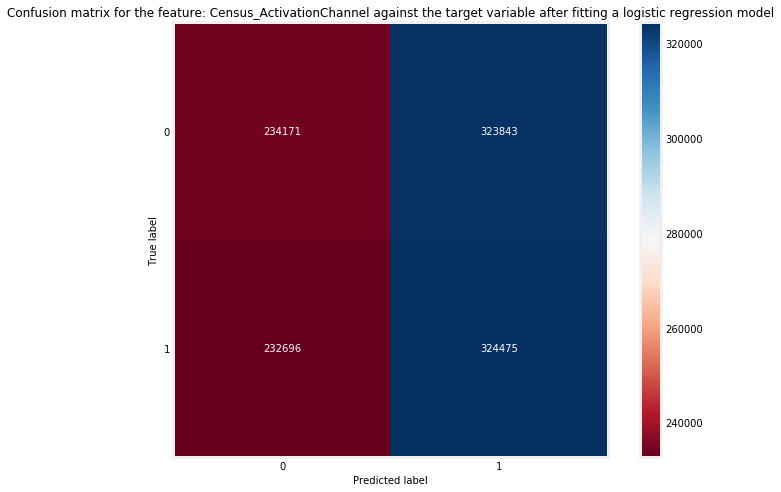

In [46]:
categorical_univariate_and_bivariate_stats(feature="Census_ActivationChannel")
logistic_fit(feature="Census_ActivationChannel")

In [47]:
categorical_univariate_and_bivariate_stats(feature="Census_FlightRing")
logistic_fit(feature="Census_FlightRing")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [48]:
gc.collect()

8289

### Numerical Columns Univariate and Bivariate Plots against the taget variable

#### Inspecting each one of the numerical features from the train set and illustrating the top most occured values against the *HasDetections* target variable. Moreover trying to fit a logistic regression model between the target variable and the inspected feature to identify if the feature is a good predictor.

In [49]:
numerical_and_binary_columns

['AVProductStatesIdentifier',
 'AVProductsInstalled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_ThresholdOptIn',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsWIMBootEnabled',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

In [50]:
def numerical_univariate_and_bivariate_plot(feature, num_of_bins = 40):
    
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    
    if feature in train_sample.columns:
    
        print("Top 10 Values counts for the numerical feature", feature)
        print(train_sample[feature].value_counts().head(10))
        print("Min value", train_sample[feature].min())
        print("Max value", train_sample[feature].max())
        print("NaN values", train_sample[feature].isnull().sum())
        print("Number of unique values", train_sample[feature].nunique())

        if train[feature].nunique() > 2:
            print("Mean value", train_sample[feature].mean())
            print("Variance value", train_sample[feature].var())

        # for binary features
        if train[feature].nunique() <= 2:

            f, axes = plt.subplots(1, 2, figsize=(21, 10))

            sns.countplot(x=feature, data=train_sample, ax=axes[0])
            sns.countplot(x=feature, hue = "HasDetections", data=train_sample, ax=axes[1], palette=['b','r'])
            
            f.suptitle("Numerical feature: "+feature+" Univariate and Bivariate plots against the target variable")

        # for numeric features
        else:

            f, axes = plt.subplots(1, 3, figsize=(21, 10))

            sns.distplot(train_sample[feature].dropna(), rug=False, kde=False, ax=axes[0], bins = num_of_bins)

            sns.violinplot(x="HasDetections", y = feature, hue="HasDetections", data=train_sample, ax=axes[1], palette=['b','r'])

            if feature == "LocaleEnglishNameIdentifier":
                sns.distplot(train_sample[train_sample["HasDetections"] == 0][feature].dropna().astype("int16"), rug=False, kde=False, color="b", ax=axes[2], bins = num_of_bins)
                sns.distplot(train_sample[train_sample["HasDetections"] == 1][feature].dropna().astype("int16"), rug=False, kde=False, color="r", ax=axes[2], bins = num_of_bins)
            else:
                sns.distplot(train_sample[train_sample["HasDetections"] == 0][feature].dropna(), rug=False, kde=False, color="b", ax=axes[2], bins = num_of_bins)
                sns.distplot(train_sample[train_sample["HasDetections"] == 1][feature].dropna(), rug=False, kde=False, color="r", ax=axes[2], bins = num_of_bins)
            
                f.suptitle("Numerical feature: "+feature+" Univariate and Bivariate plots against the target variable")
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")


numerical_univariate_and_bivariate_plot(feature = "IsBeta")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [51]:
numerical_univariate_and_bivariate_plot(feature="RtpStateBitfield")
logistic_fit("RtpStateBitfield")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [52]:
numerical_univariate_and_bivariate_plot(feature="IsSxsPassiveMode")
logistic_fit("IsSxsPassiveMode")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature AVProductStatesIdentifier
53447.0    727828
7945.0      59865
47238.0     41090
62773.0     33296
46413.0     14231
49480.0     12709
23657.0     12517
41571.0     11989
29199.0      9270
51954.0      8345
Name: AVProductStatesIdentifier, dtype: int64
Min value 3.0
Max value 70492.0
NaN values 4479
Number of unique values 8802
Mean value 47750.171875
Variance value 197797648.0

Fitting a logistic regression model for the feature AVProductStatesIdentifier against the target variable


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    555291
           1       0.50      1.00      0.67    555415

   micro avg       0.50      0.50      0.50   1110706
   macro avg       0.25      0.50      0.33   1110706
weighted avg       0.25      0.50      0.33   1110706


accuracy score: 0.5000558203521004
F1 score: 0.5000558203521004


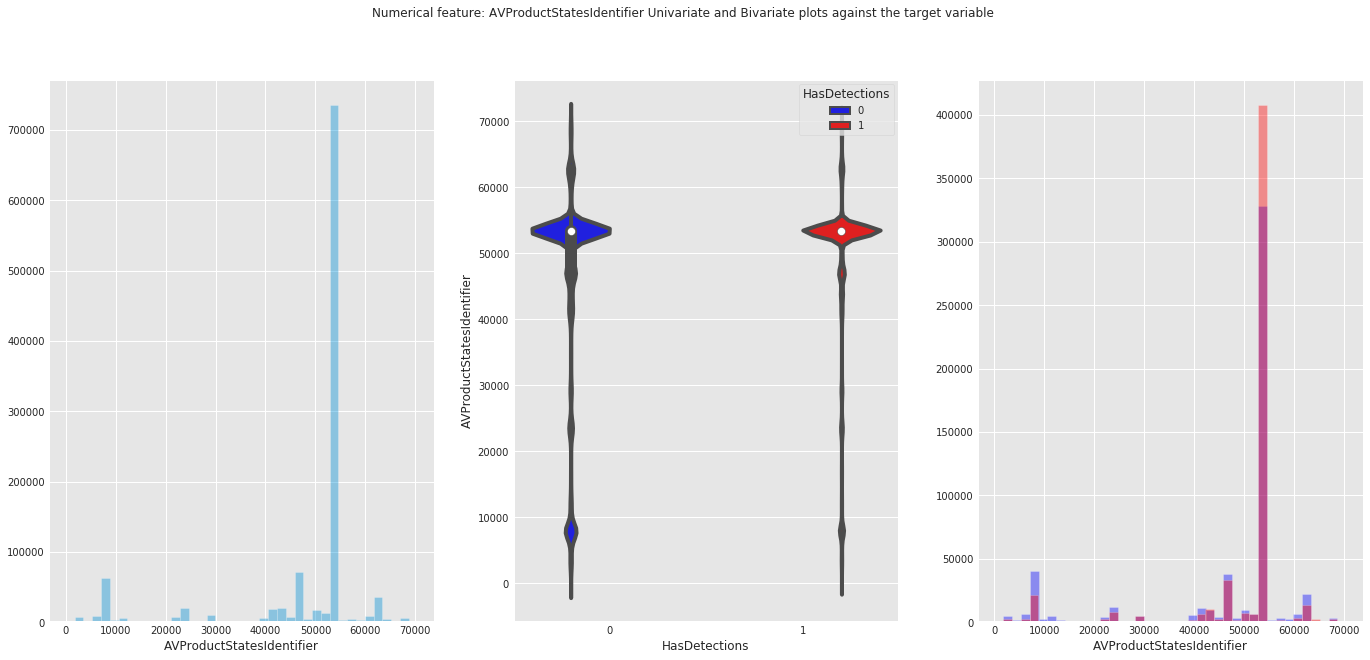

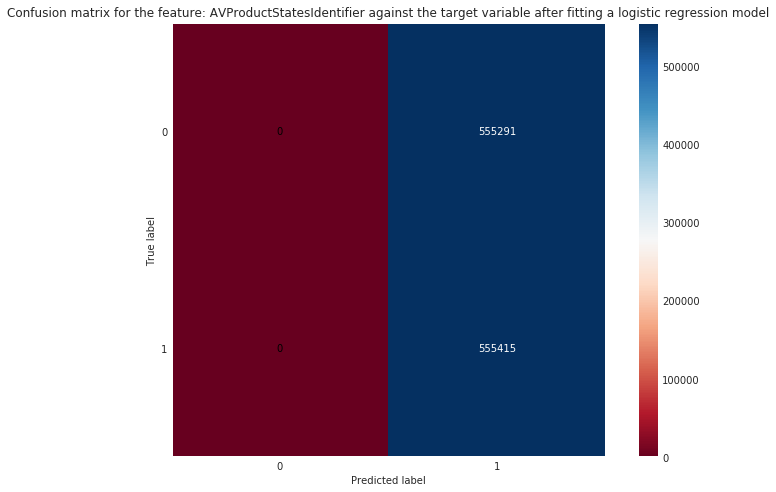

In [53]:
numerical_univariate_and_bivariate_plot(feature="AVProductStatesIdentifier")
logistic_fit("AVProductStatesIdentifier")

Top 10 Values counts for the numerical feature AVProductsInstalled
1.0    775994
2.0    307457
3.0     26047
4.0      1139
5.0        65
6.0         3
7.0         1
Name: AVProductsInstalled, dtype: int64
Min value 1.0
Max value 7.0
NaN values 4479
Number of unique values 7
Mean value nan
Variance value 0.0

Fitting a logistic regression model for the feature AVProductsInstalled against the target variable
              precision    recall  f1-score   support

           0       0.61      0.37      0.46    555291
           1       0.55      0.77      0.64    555415

   micro avg       0.57      0.57      0.57   1110706
   macro avg       0.58      0.57      0.55   1110706
weighted avg       0.58      0.57      0.55   1110706


accuracy score: 0.5676722733108491
F1 score: 0.5676722733108491


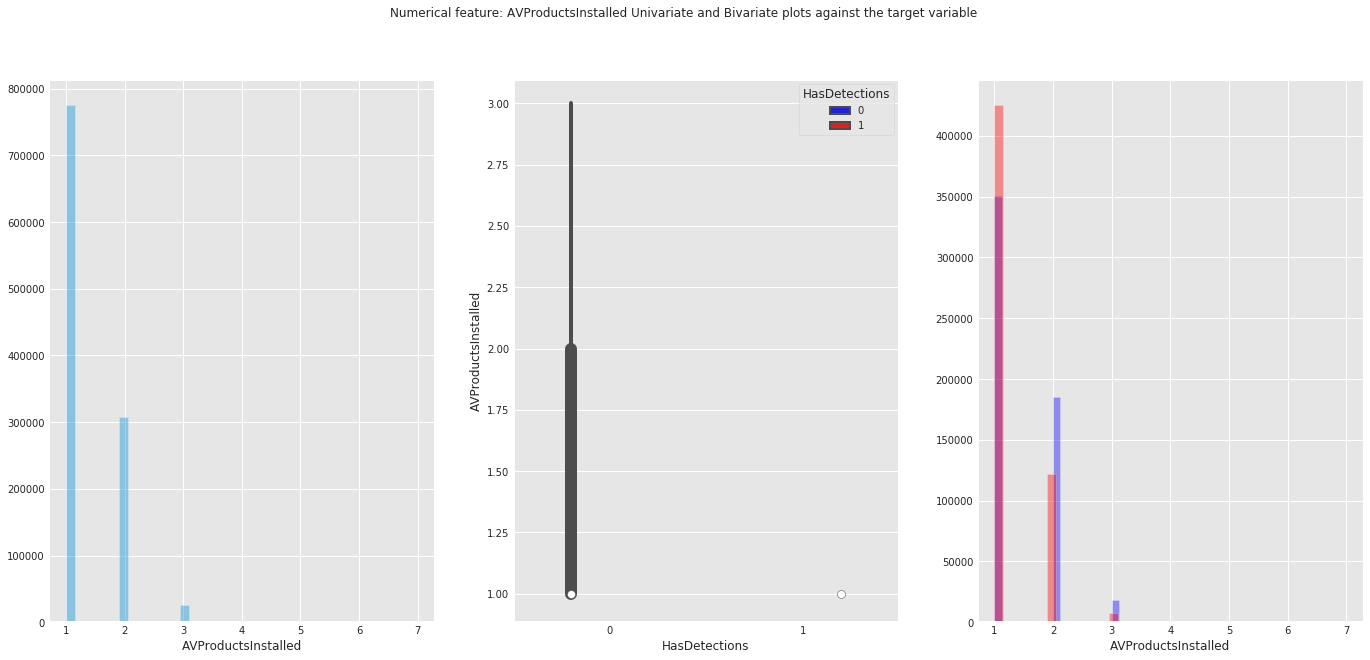

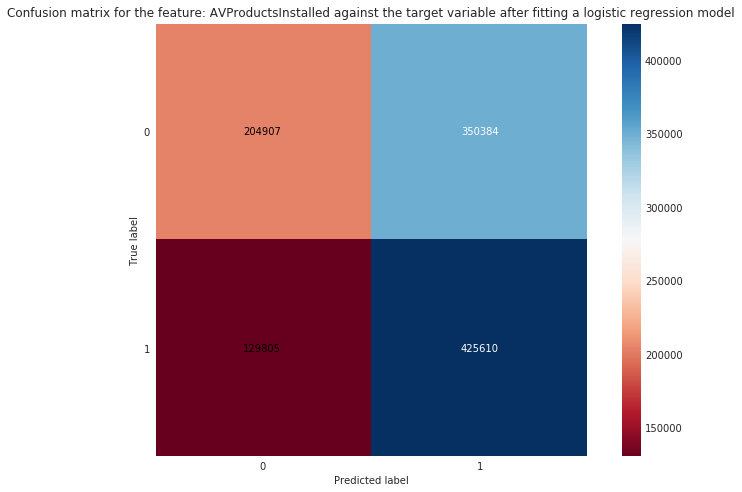

In [54]:
numerical_univariate_and_bivariate_plot(feature="AVProductsInstalled")
logistic_fit("AVProductsInstalled")

In [55]:
numerical_univariate_and_bivariate_plot("HasTpm")
logistic_fit("HasTpm")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature CountryIdentifier
43     49480
29     43306
141    41386
93     35684
171    35181
60     29204
201    27452
207    26385
66     25975
89     25048
Name: CountryIdentifier, dtype: int64
Min value 1
Max value 222
NaN values 0
Number of unique values 222
Mean value 108.03869582176948
Variance value 3976.693680288815

Fitting a logistic regression model for the feature CountryIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      0.57      0.53    558014
           1       0.50      0.43      0.46    557171

   micro avg       0.50      0.50      0.50   1115185
   macro avg       0.50      0.50      0.50   1115185
weighted avg       0.50      0.50      0.50   1115185


accuracy score: 0.5009617238395423
F1 score: 0.5009617238395423


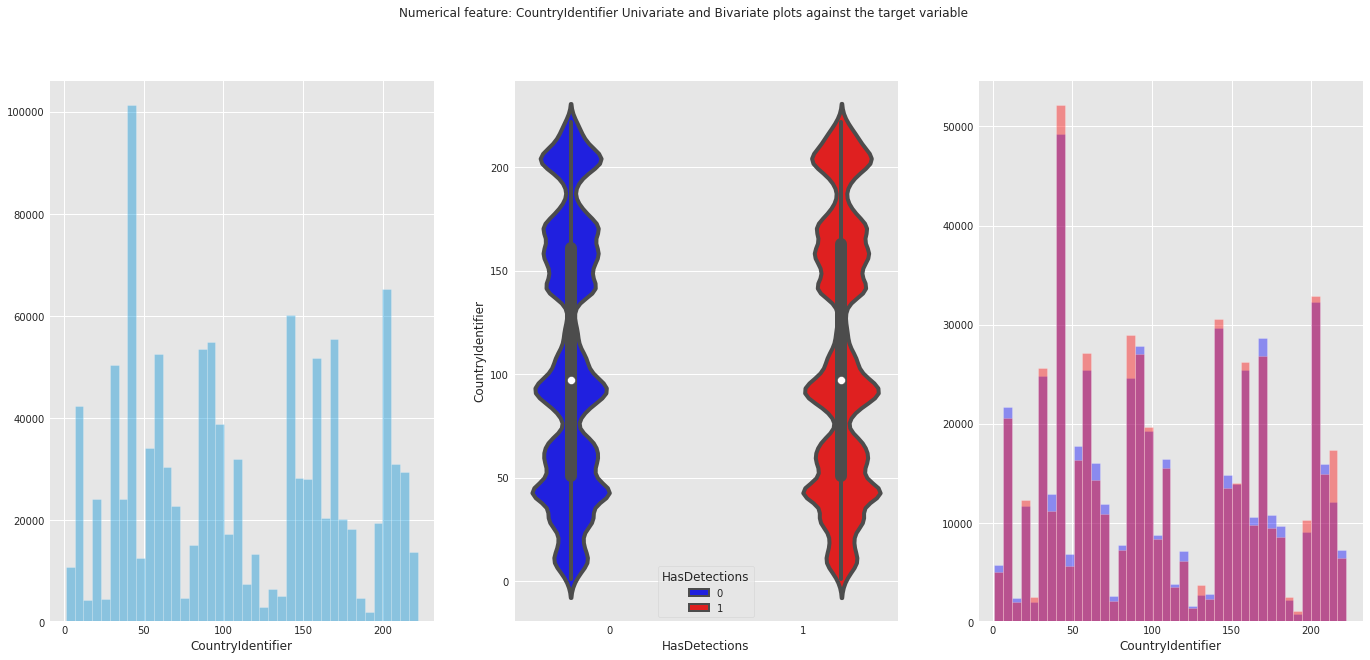

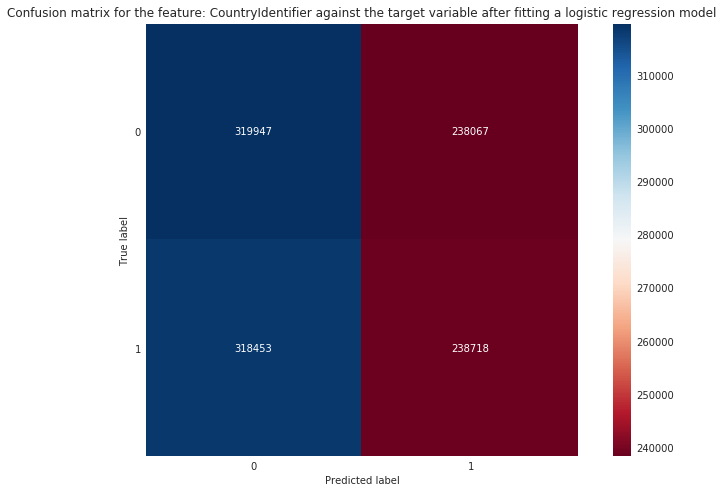

In [56]:
numerical_univariate_and_bivariate_plot("CountryIdentifier")
logistic_fit("CountryIdentifier")

Top 10 Values counts for the numerical feature CityIdentifier
130775.0    11821
16668.0     10713
82373.0     10398
10222.0      8974
61668.0      8303
143782.0     8076
66202.0      7954
58607.0      7721
92213.0      7219
66953.0      7185
Name: CityIdentifier, dtype: int64
Min value 7.0
Max value 167959.0
NaN values 40502
Number of unique values 53256
Mean value 81228.8359375
Variance value 2391647232.0

Fitting a logistic regression model for the feature CityIdentifier against the target variable


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    537324
           1       0.00      0.00      0.00    537359

   micro avg       0.50      0.50      0.50   1074683
   macro avg       0.25      0.50      0.33   1074683
weighted avg       0.25      0.50      0.33   1074683


accuracy score: 0.4999837161283839
F1 score: 0.4999837161283839


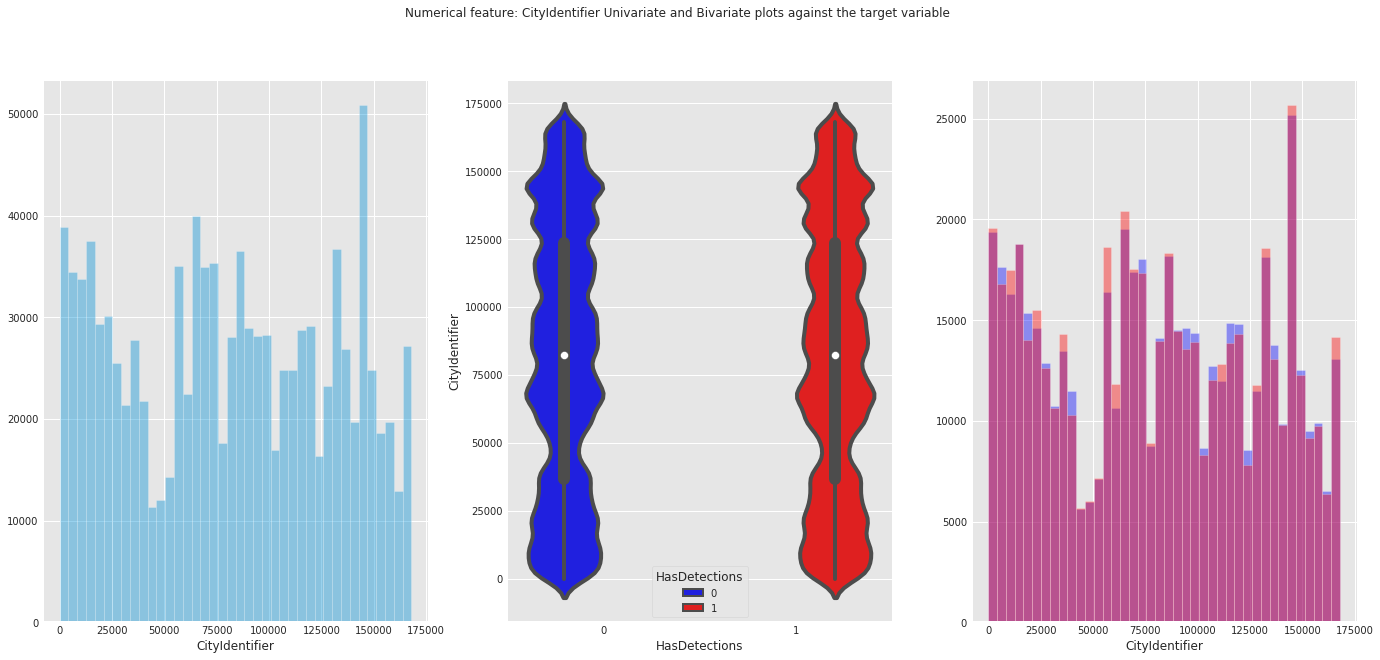

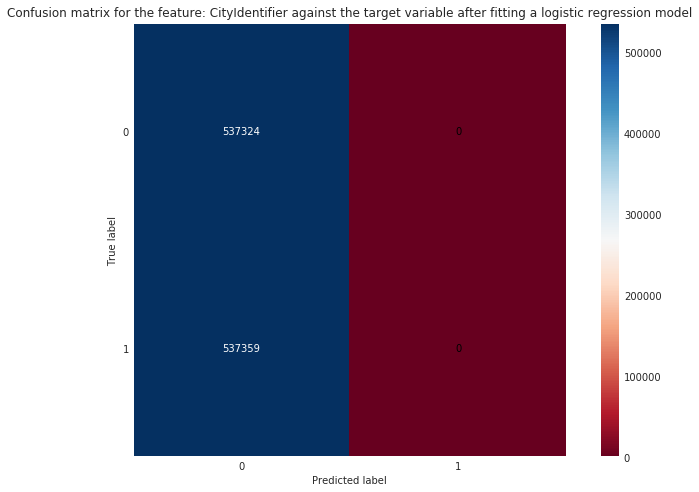

In [57]:
numerical_univariate_and_bivariate_plot("CityIdentifier")
logistic_fit("CityIdentifier")

Top 10 Values counts for the numerical feature OrganizationIdentifier
27.0    523355
18.0    221135
48.0      8092
50.0      5622
37.0      2354
11.0      2320
49.0      1718
46.0      1366
14.0       606
32.0       480
Name: OrganizationIdentifier, dtype: int64
Min value 1.0
Max value 52.0
NaN values 344660
Number of unique values 45
Mean value nan
Variance value 0.0

Fitting a logistic regression model for the feature OrganizationIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      0.29      0.37    384486
           1       0.50      0.71      0.59    386039

   micro avg       0.50      0.50      0.50    770525
   macro avg       0.50      0.50      0.48    770525
weighted avg       0.50      0.50      0.48    770525


accuracy score: 0.49853930761493787
F1 score: 0.49853930761493787


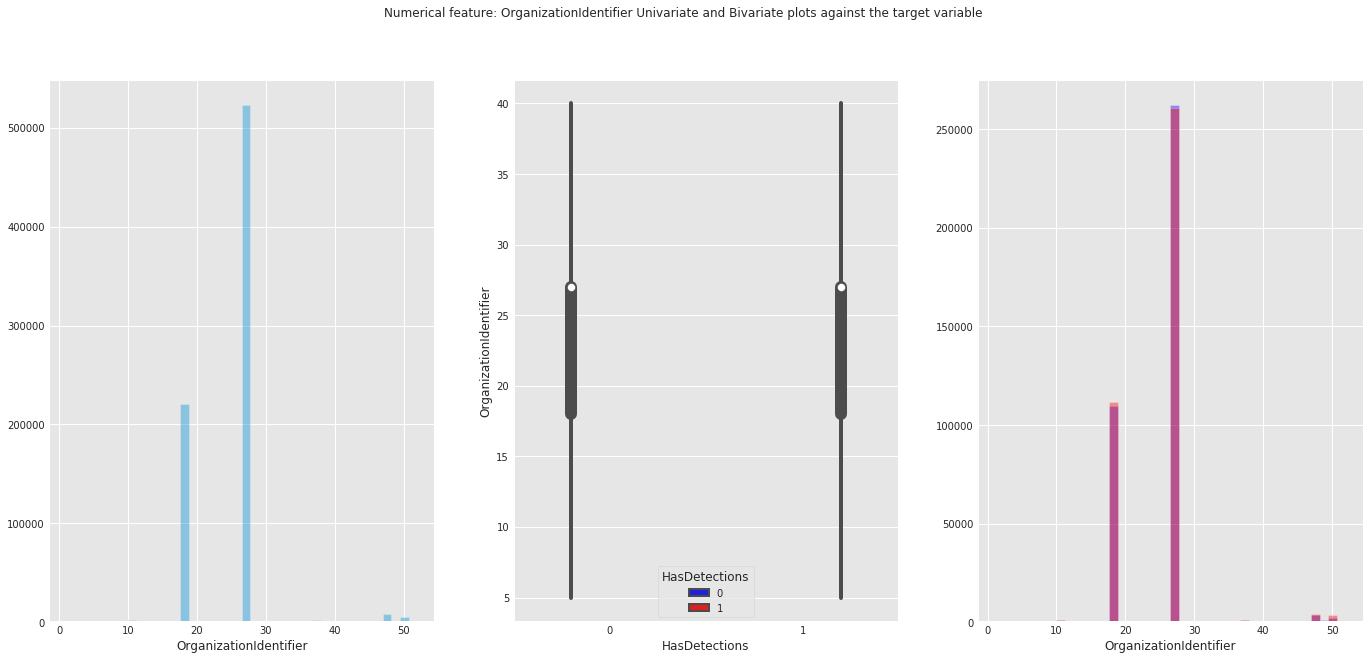

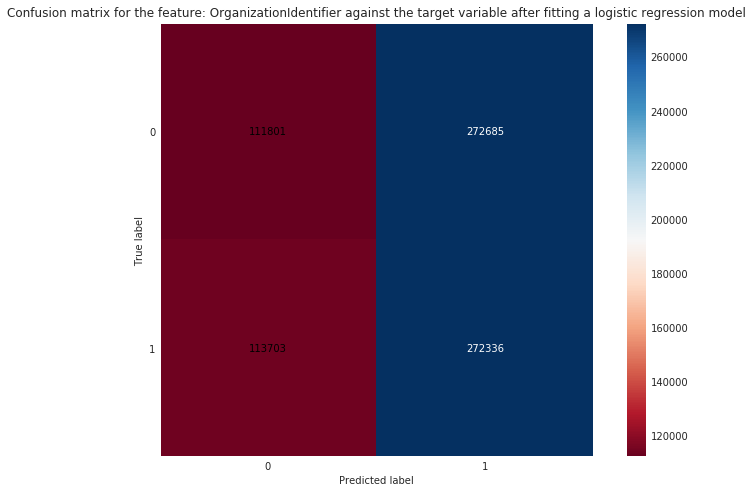

In [58]:
numerical_univariate_and_bivariate_plot("OrganizationIdentifier")
logistic_fit("OrganizationIdentifier")

Top 10 Values counts for the numerical feature GeoNameIdentifier
277.0    191543
211.0     52869
53.0      50839
89.0      45302
240.0     43375
35.0      43035
167.0     42259
276.0     37142
267.0     26853
126.0     24766
Name: GeoNameIdentifier, dtype: int64
Min value 1.0
Max value 296.0
NaN values 22
Number of unique values 276
Mean value nan
Variance value nan

Fitting a logistic regression model for the feature GeoNameIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      0.52      0.51    557995
           1       0.50      0.49      0.49    557168

   micro avg       0.50      0.50      0.50   1115163
   macro avg       0.50      0.50      0.50   1115163
weighted avg       0.50      0.50      0.50   1115163


accuracy score: 0.5022862128675359
F1 score: 0.5022862128675359


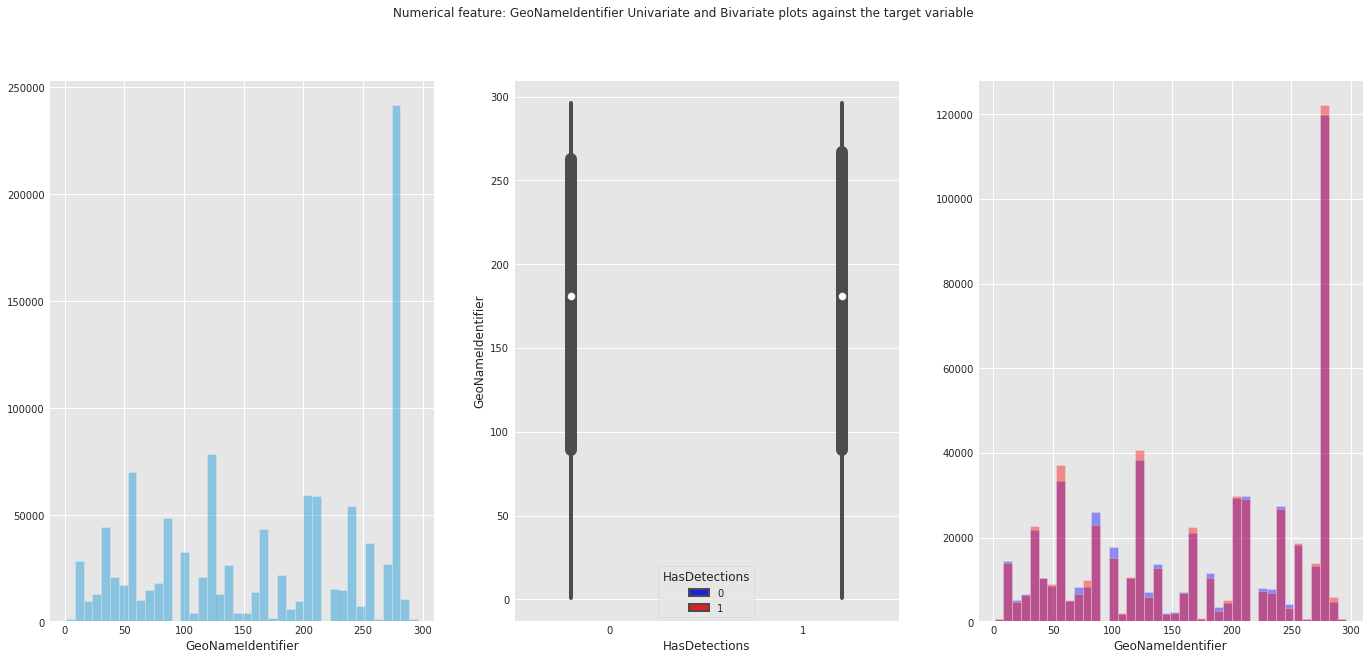

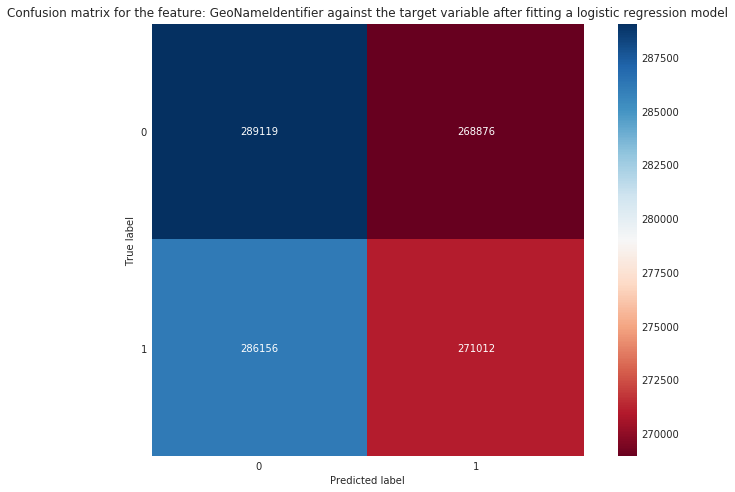

In [59]:
numerical_univariate_and_bivariate_plot("GeoNameIdentifier")
logistic_fit("GeoNameIdentifier")

Top 10 Values counts for the numerical feature LocaleEnglishNameIdentifier
 75     261706
-74      56298
 74      51370
 42      50921
 88      47077
-23      42772
-85      42728
-29      41364
-5       26319
 124     24416
Name: LocaleEnglishNameIdentifier, dtype: int64
Min value -128
Max value 127
NaN values 0
Number of unique values 236
Mean value 27.99577738222806
Variance value 4301.143683119284

Fitting a logistic regression model for the feature LocaleEnglishNameIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.62      0.56    558014
           1       0.51      0.39      0.44    557171

   micro avg       0.51      0.51      0.51   1115185
   macro avg       0.51      0.51      0.50   1115185
weighted avg       0.51      0.51      0.50   1115185


accuracy score: 0.506888991512619
F1 score: 0.506888991512619


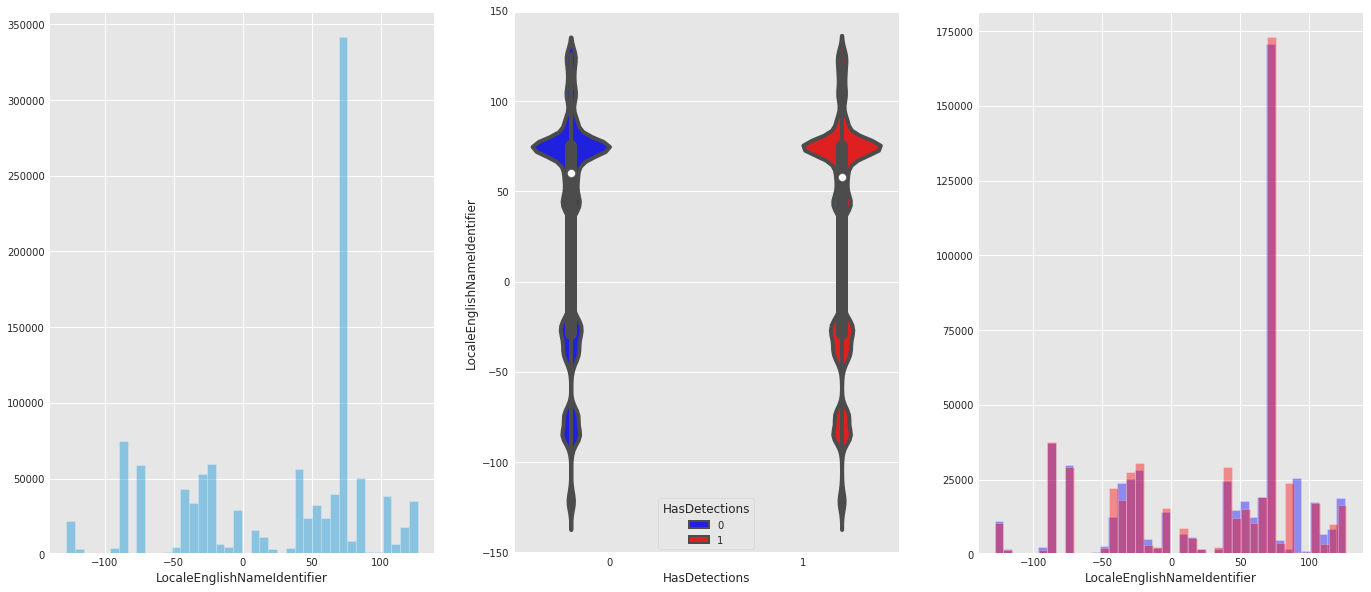

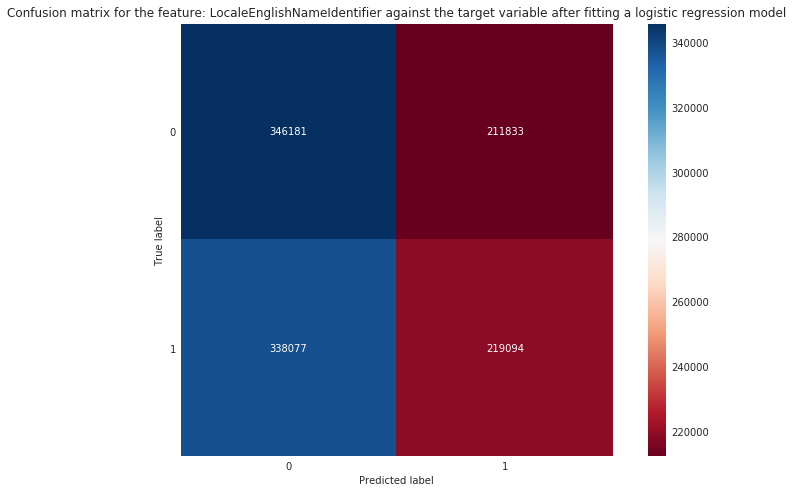

In [60]:
numerical_univariate_and_bivariate_plot("LocaleEnglishNameIdentifier")
logistic_fit("LocaleEnglishNameIdentifier")

Top 10 Values counts for the numerical feature OsBuild
17134    490150
16299    313467
15063     96871
14393     90828
10586     51450
10240     33774
9600      24212
7601      11724
17692       387
17744       300
Name: OsBuild, dtype: int64
Min value 7600
Max value 18242
NaN values 0
Number of unique values 53
Mean value 15722.308897626852
Variance value 4799481.659098016

Fitting a logistic regression model for the feature OsBuild against the target variable
              precision    recall  f1-score   support

           0       0.53      0.29      0.37    558014
           1       0.51      0.74      0.60    557171

   micro avg       0.51      0.51      0.51   1115185
   macro avg       0.52      0.51      0.49   1115185
weighted avg       0.52      0.51      0.49   1115185


accuracy score: 0.5137300089222865
F1 score: 0.5137300089222865


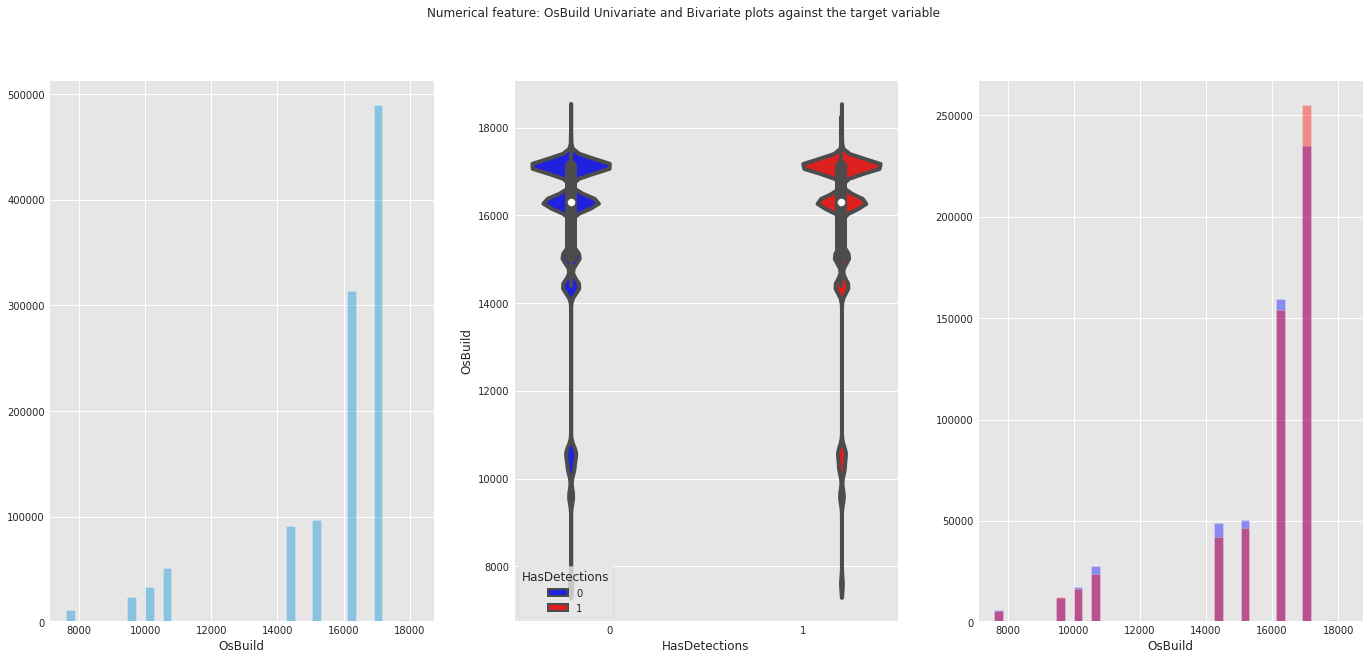

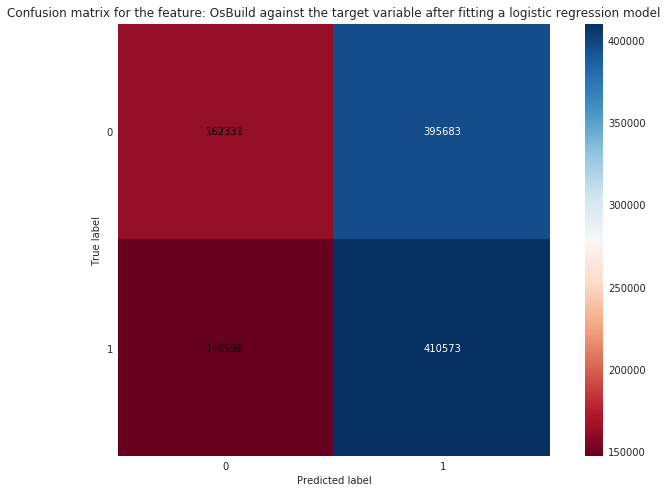

In [61]:
numerical_univariate_and_bivariate_plot("OsBuild")
logistic_fit("OsBuild")

Top 10 Values counts for the numerical feature OsSuite
768    695027
256    418349
272      1477
400       110
16        109
305        82
784        20
274         5
144         3
49          2
Name: OsSuite, dtype: int64
Min value 16
Max value 784
NaN values 0
Number of unique values 11
Mean value 575.1226711263154
Variance value 61552.544612787875

Fitting a logistic regression model for the feature OsSuite against the target variable
              precision    recall  f1-score   support

           0       0.51      0.63      0.56    558014
           1       0.51      0.39      0.44    557171

   micro avg       0.51      0.51      0.51   1115185
   macro avg       0.51      0.51      0.50   1115185
weighted avg       0.51      0.51      0.50   1115185


accuracy score: 0.5103207091200115
F1 score: 0.5103207091200115


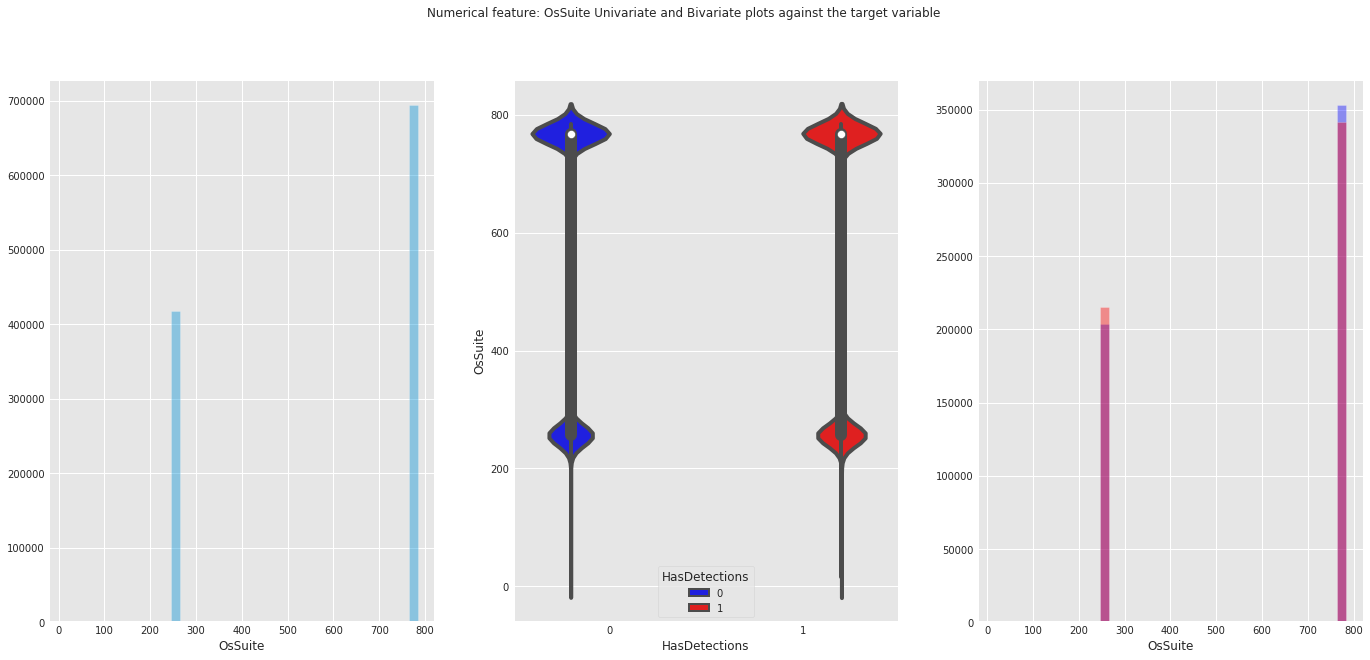

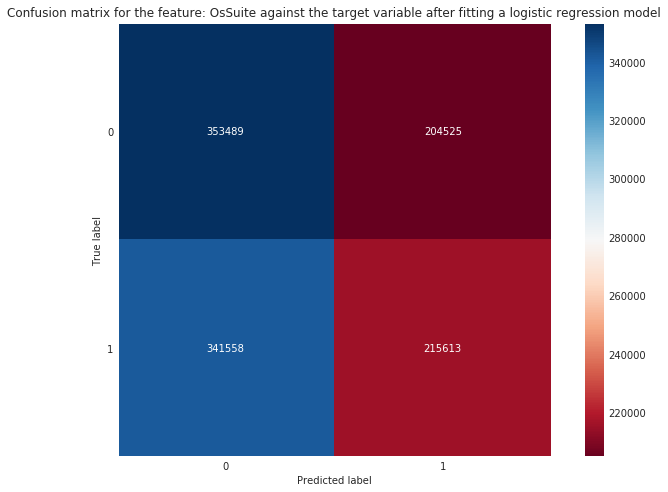

In [62]:
numerical_univariate_and_bivariate_plot("OsSuite")
logistic_fit("OsSuite")

In [63]:
numerical_univariate_and_bivariate_plot("IsProtected")
logistic_fit("IsProtected")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [64]:
numerical_univariate_and_bivariate_plot("AutoSampleOptIn")
logistic_fit("AutoSampleOptIn")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [65]:
numerical_univariate_and_bivariate_plot("SMode")
logistic_fit("SMode")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature IeVerIdentifier
137.0    486419
117.0    220836
108.0     58904
111.0     58792
98.0      43781
135.0     27592
53.0      25656
74.0      25276
94.0      21812
105.0     21523
Name: IeVerIdentifier, dtype: int64
Min value 1.0
Max value 429.0
NaN values 7368
Number of unique values 204
Mean value nan
Variance value nan

Fitting a logistic regression model for the feature IeVerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.52      0.52      0.52    554331
           1       0.52      0.52      0.52    553486

   micro avg       0.52      0.52      0.52   1107817
   macro avg       0.52      0.52      0.52   1107817
weighted avg       0.52      0.52      0.52   1107817


accuracy score: 0.5169084785664059
F1 score: 0.5169084785664059


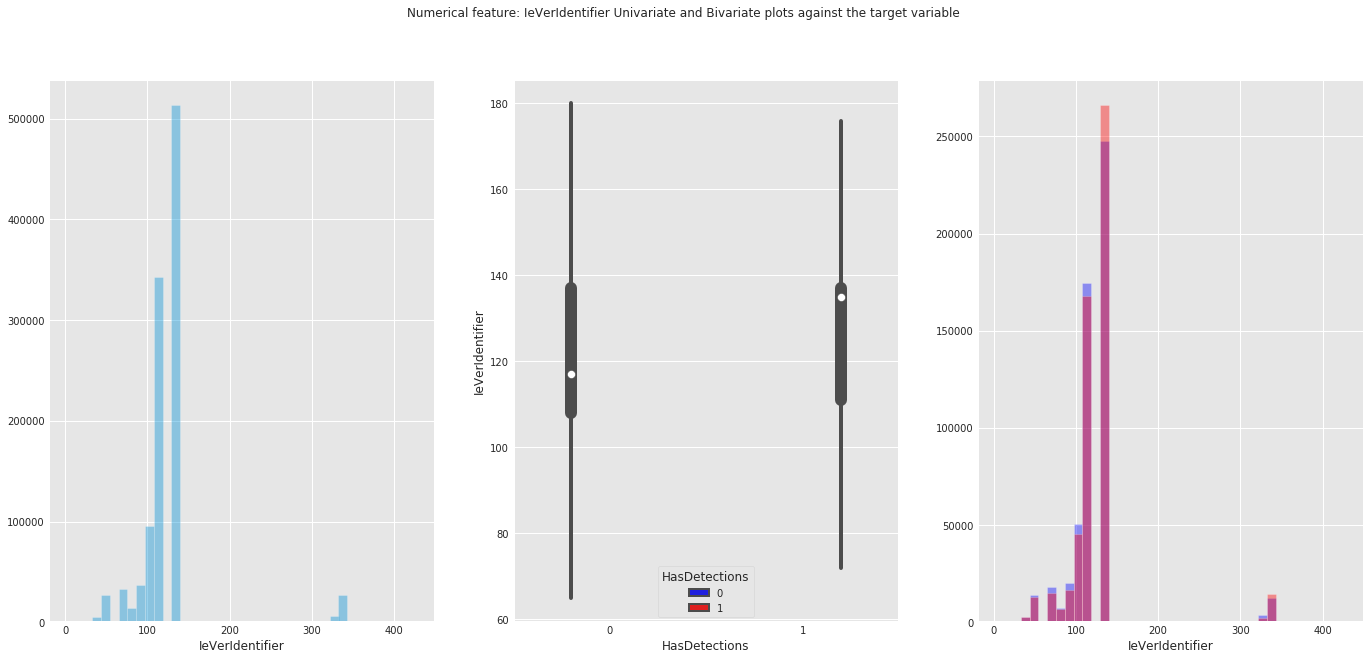

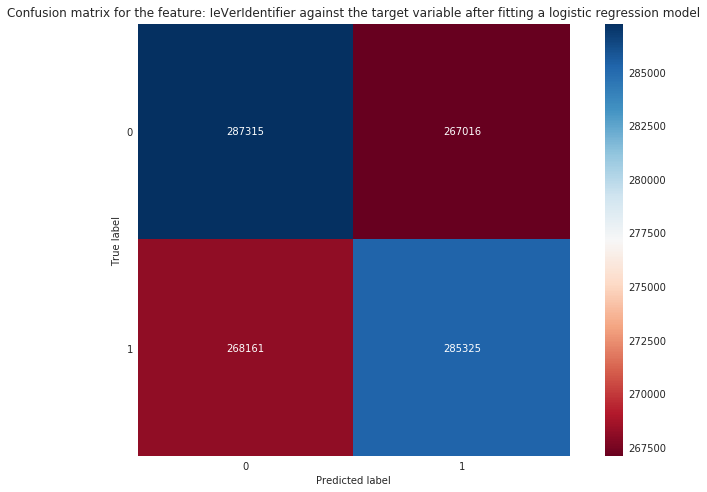

In [66]:
numerical_univariate_and_bivariate_plot("IeVerIdentifier")
logistic_fit("IeVerIdentifier")

In [67]:
numerical_univariate_and_bivariate_plot("Firewall")
logistic_fit("Firewall")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [68]:
numerical_univariate_and_bivariate_plot("UacLuaenable")
logistic_fit("UacLuaenable")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Census_OEMNameIdentifier
2668.0    160842
2102.0    129255
1443.0    118748
2206.0    115595
585.0     111893
525.0     105536
4588.0     38724
4728.0     38266
1980.0     35777
4144.0     25551
Name: Census_OEMNameIdentifier, dtype: int64
Min value 15.0
Max value 6144.0
NaN values 12021
Number of unique values 1582
Mean value nan
Variance value nan

Fitting a logistic regression model for the feature Census_OEMNameIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.49      0.50    551768
           1       0.51      0.53      0.52    551396

   micro avg       0.51      0.51      0.51   1103164
   macro avg       0.51      0.51      0.51   1103164
weighted avg       0.51      0.51      0.51   1103164


accuracy score: 0.510070125566099
F1 score: 0.510070125566099


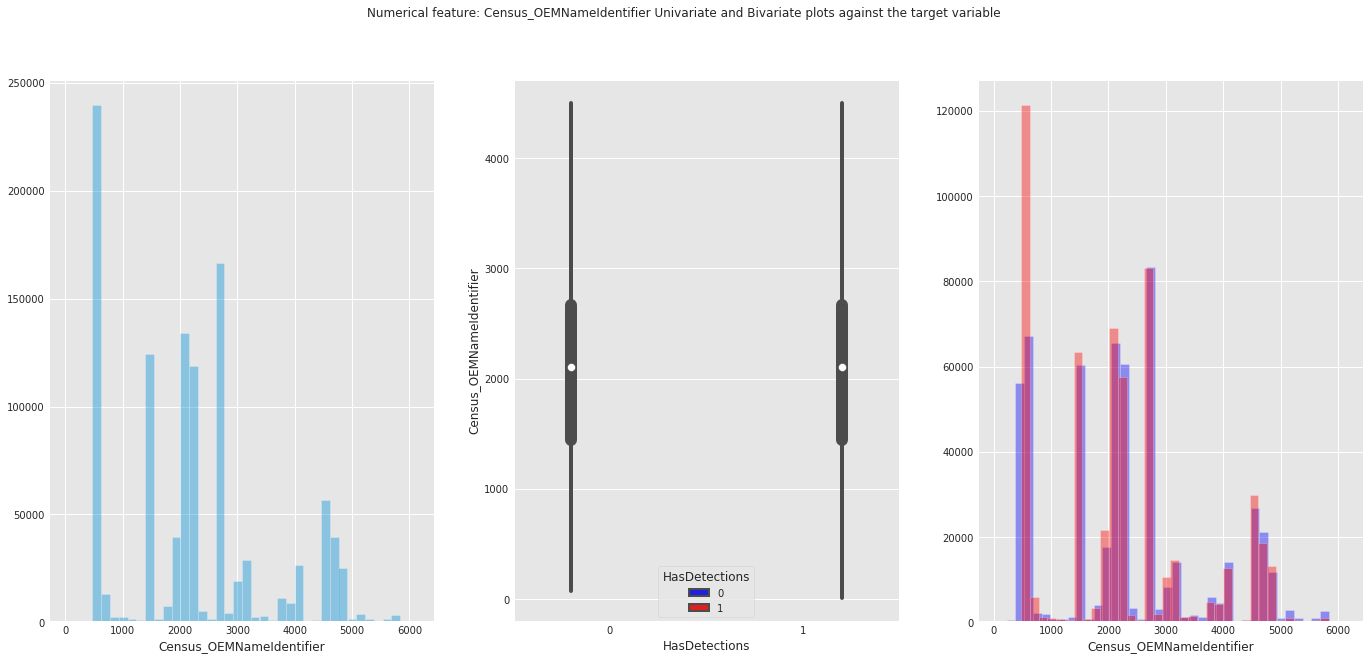

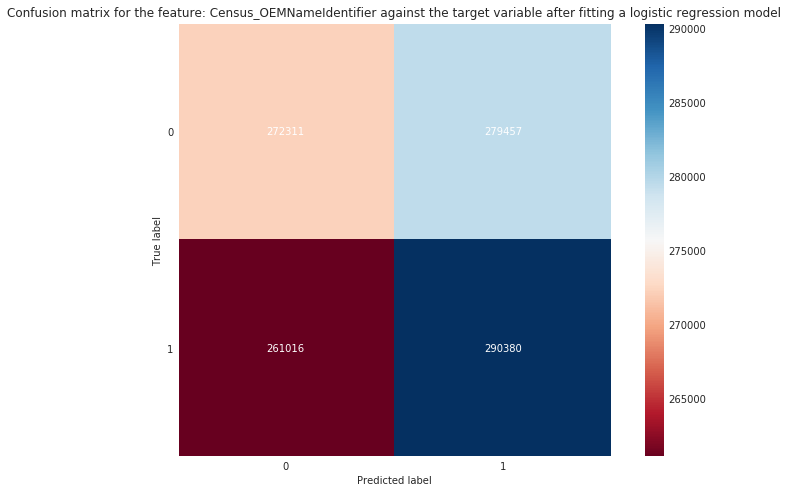

In [69]:
numerical_univariate_and_bivariate_plot("Census_OEMNameIdentifier")
logistic_fit("Census_OEMNameIdentifier")

Top 10 Values counts for the numerical feature Census_OEMModelIdentifier
313586.0    37991
242491.0    32656
317701.0    17173
317708.0    14438
228975.0     9919
188345.0     8854
241876.0     8643
245824.0     8637
244755.0     6176
248045.0     5426
Name: Census_OEMModelIdentifier, dtype: int64
Min value 1.0
Max value 345494.0
NaN values 12885
Number of unique values 63446
Mean value 238993.015625
Variance value 5189310464.0

Fitting a logistic regression model for the feature Census_OEMModelIdentifier against the target variable


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    551288
           1       0.00      0.00      0.00    551012

   micro avg       0.50      0.50      0.50   1102300
   macro avg       0.25      0.50      0.33   1102300
weighted avg       0.25      0.50      0.33   1102300


accuracy score: 0.5001251927787354
F1 score: 0.5001251927787354


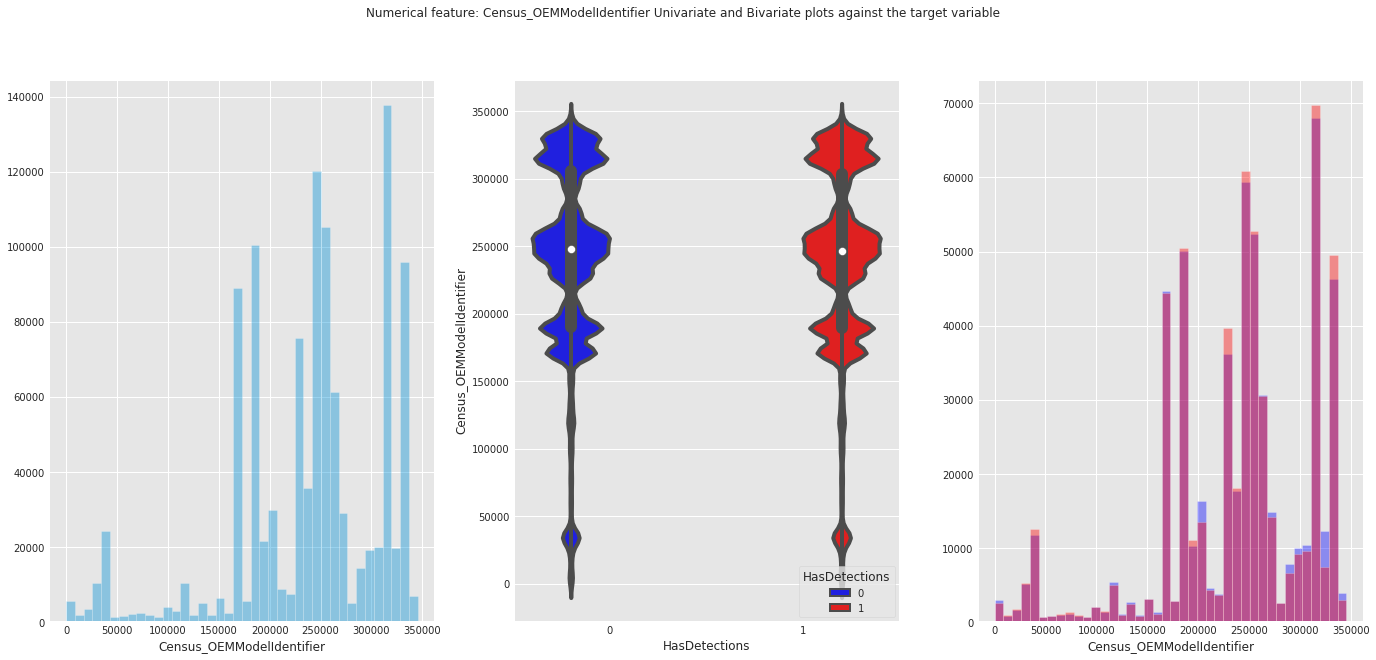

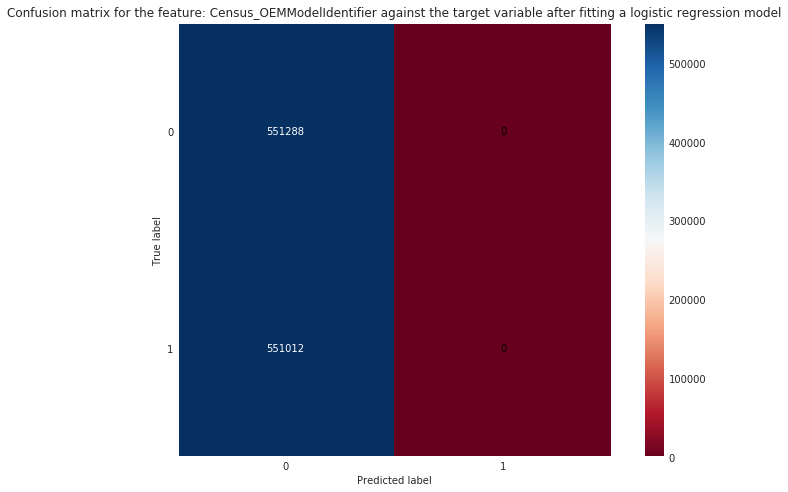

In [70]:
numerical_univariate_and_bivariate_plot("Census_OEMModelIdentifier")
logistic_fit("Census_OEMModelIdentifier")

Top 10 Values counts for the numerical feature Census_ProcessorCoreCount
4.0     678166
2.0     288757
8.0     108797
12.0     11569
6.0       8942
1.0       8893
16.0      2288
3.0       1698
32.0       253
20.0       223
Name: Census_ProcessorCoreCount, dtype: int64
Min value 1.0
Max value 88.0
NaN values 5136
Number of unique values 28
Mean value nan
Variance value 0.0

Fitting a logistic regression model for the feature Census_ProcessorCoreCount against the target variable
              precision    recall  f1-score   support

           0       0.51      0.89      0.65    555715
           1       0.56      0.13      0.22    554334

   micro avg       0.51      0.51      0.51   1110049
   macro avg       0.53      0.51      0.43   1110049
weighted avg       0.53      0.51      0.43   1110049


accuracy score: 0.5143610777542252
F1 score: 0.5143610777542252


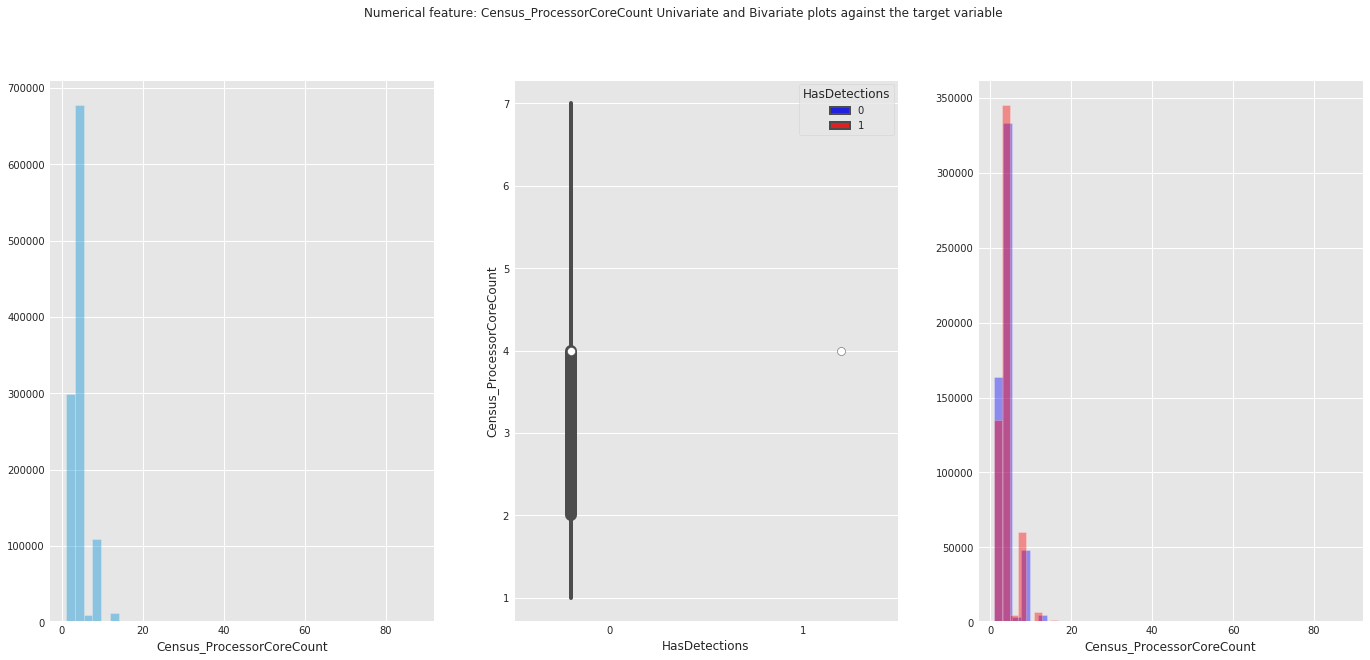

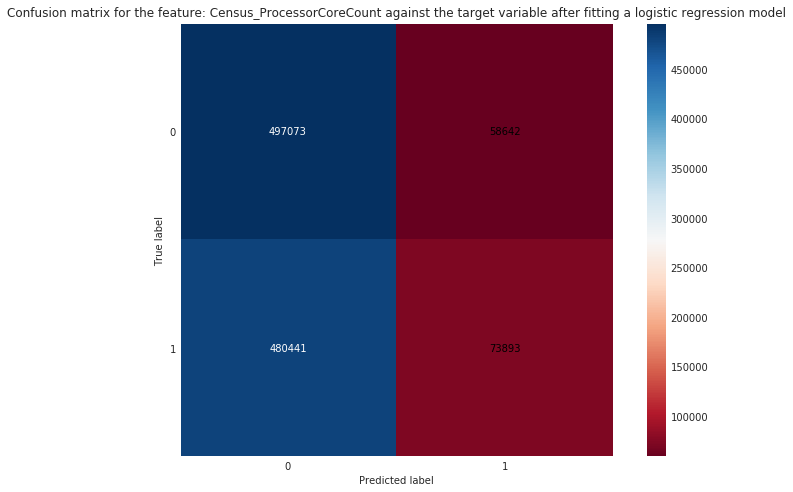

In [71]:
numerical_univariate_and_bivariate_plot("Census_ProcessorCoreCount")
logistic_fit("Census_ProcessorCoreCount")

Top 10 Values counts for the numerical feature Census_ProcessorManufacturerIdentifier
5.0     980164
1.0     129823
10.0        48
3.0         14
Name: Census_ProcessorManufacturerIdentifier, dtype: int64
Min value 1.0
Max value 10.0
NaN values 5136
Number of unique values 4
Mean value nan
Variance value 0.0

Fitting a logistic regression model for the feature Census_ProcessorManufacturerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.12      0.19    555715
           1       0.50      0.89      0.64    554334

   micro avg       0.50      0.50      0.50   1110049
   macro avg       0.51      0.50      0.42   1110049
weighted avg       0.51      0.50      0.42   1110049


accuracy score: 0.5019264915332566
F1 score: 0.5019264915332566


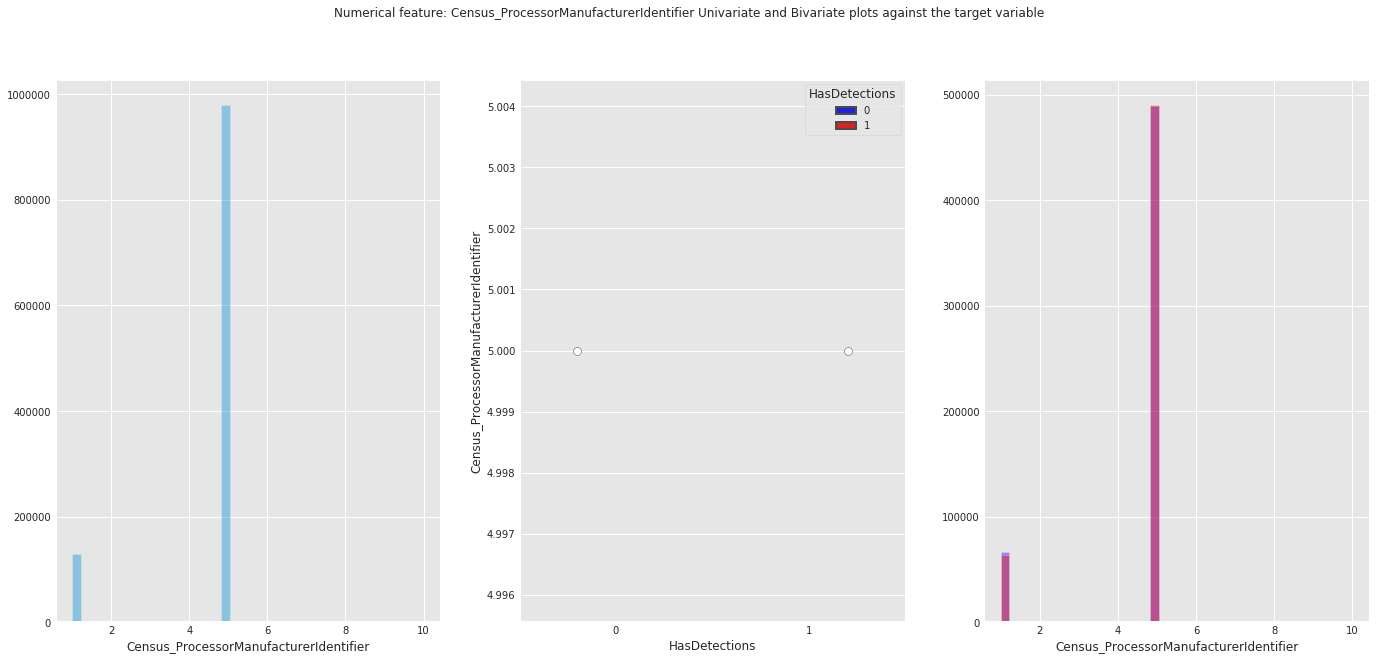

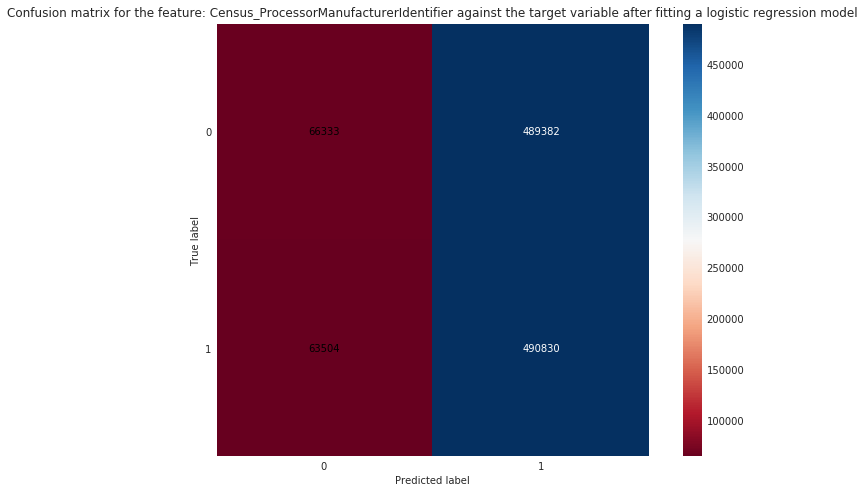

In [72]:
numerical_univariate_and_bivariate_plot("Census_ProcessorManufacturerIdentifier")
logistic_fit("Census_ProcessorManufacturerIdentifier")

Top 10 Values counts for the numerical feature Census_ProcessorModelIdentifier
2696.0    36215
1998.0    33392
2660.0    24459
2372.0    21918
1992.0    21460
2382.0    21258
2640.0    19079
2524.0    17980
1985.0    16986
2096.0    16951
Name: Census_ProcessorModelIdentifier, dtype: int64
Min value 3.0
Max value 4470.0
NaN values 5140
Number of unique values 1959
Mean value nan
Variance value nan

Fitting a logistic regression model for the feature Census_ProcessorModelIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.52      0.49      0.51    555712
           1       0.52      0.55      0.53    554333

   micro avg       0.52      0.52      0.52   1110045
   macro avg       0.52      0.52      0.52   1110045
weighted avg       0.52      0.52      0.52   1110045


accuracy score: 0.5209212239143458
F1 score: 0.5209212239143458


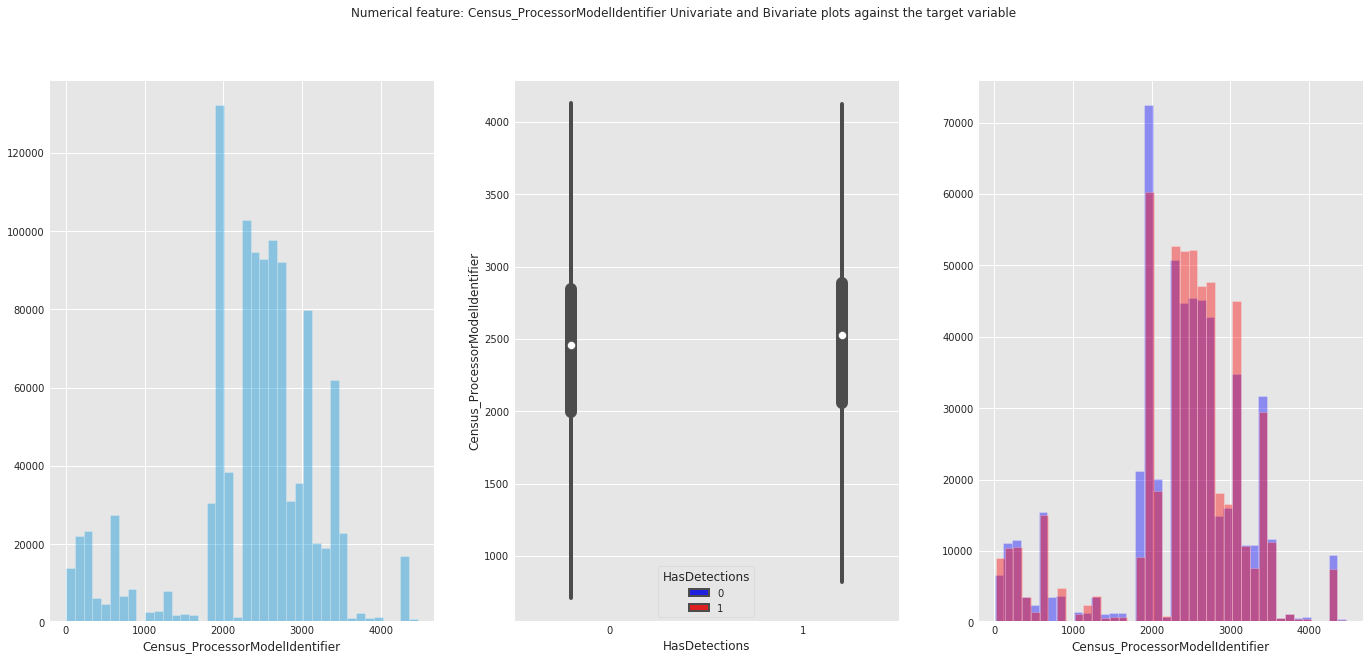

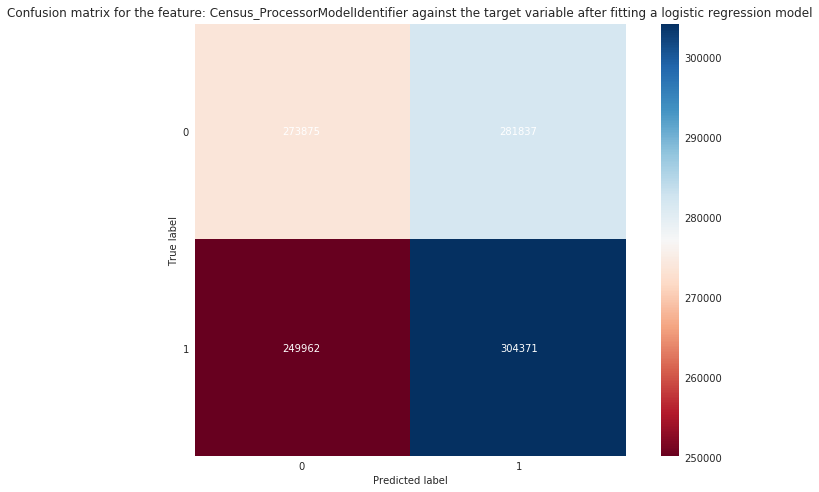

In [73]:
numerical_univariate_and_bivariate_plot("Census_ProcessorModelIdentifier")
logistic_fit("Census_ProcessorModelIdentifier")

Top 10 Values counts for the numerical feature Census_PrimaryDiskTotalCapacity
476940.0    354813
953869.0    271831
305245.0     59347
122104.0     58656
244198.0     56239
238475.0     39227
29820.0      38198
114473.0     32549
715404.0     31038
228936.0     19894
Name: Census_PrimaryDiskTotalCapacity, dtype: int64
Min value 0.0
Max value 47687668.0
NaN values 6551
Number of unique values 1713
Mean value 514261.40625
Variance value 130346041344.0

Fitting a logistic regression model for the feature Census_PrimaryDiskTotalCapacity against the target variable
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    554905
           1       0.50      1.00      0.67    553729

   micro avg       0.50      0.50      0.50   1108634
   macro avg       0.25      0.50      0.33   1108634
weighted avg       0.25      0.50      0.33   1108634


accuracy score: 0.4994687155544571
F1 score: 0.4994687155544571


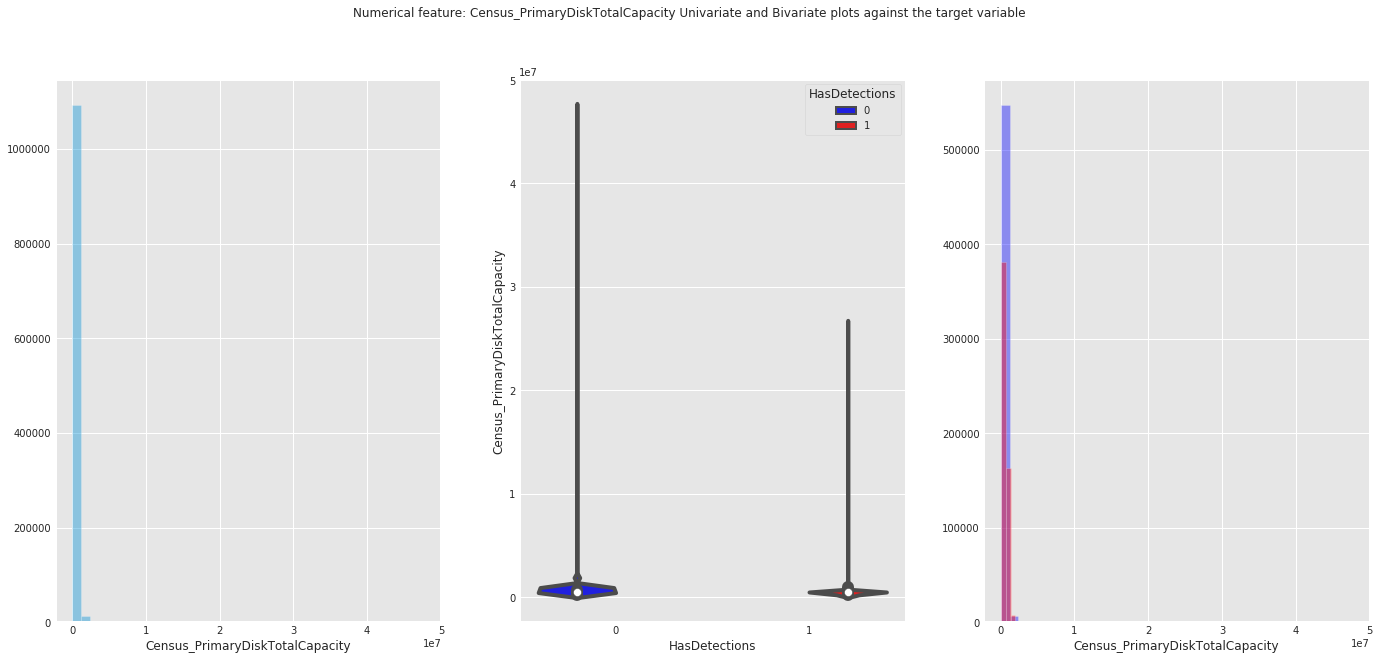

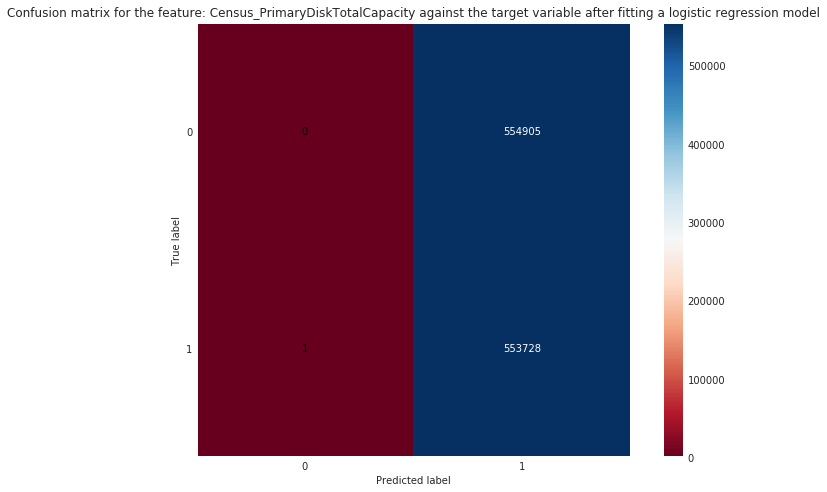

In [74]:
numerical_univariate_and_bivariate_plot("Census_PrimaryDiskTotalCapacity")
logistic_fit("Census_PrimaryDiskTotalCapacity")

Top 10 Values counts for the numerical feature Census_SystemVolumeTotalCapacity
28542.0     6490
926992.0    6352
476389.0    5527
476324.0    5162
953253.0    5111
102400.0    5097
952728.0    4761
476323.0    4450
475799.0    4269
952727.0    4203
Name: Census_SystemVolumeTotalCapacity, dtype: int64
Min value 0.0
Max value 47687100.0
NaN values 6551
Number of unique values 226398
Mean value 377892.78125
Variance value 109404291072.0

Fitting a logistic regression model for the feature Census_SystemVolumeTotalCapacity against the target variable
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    554905
           1       0.50      1.00      0.67    553729

   micro avg       0.50      0.50      0.50   1108634
   macro avg       0.25      0.50      0.33   1108634
weighted avg       0.25      0.50      0.33   1108634


accuracy score: 0.4994687155544571
F1 score: 0.4994687155544571


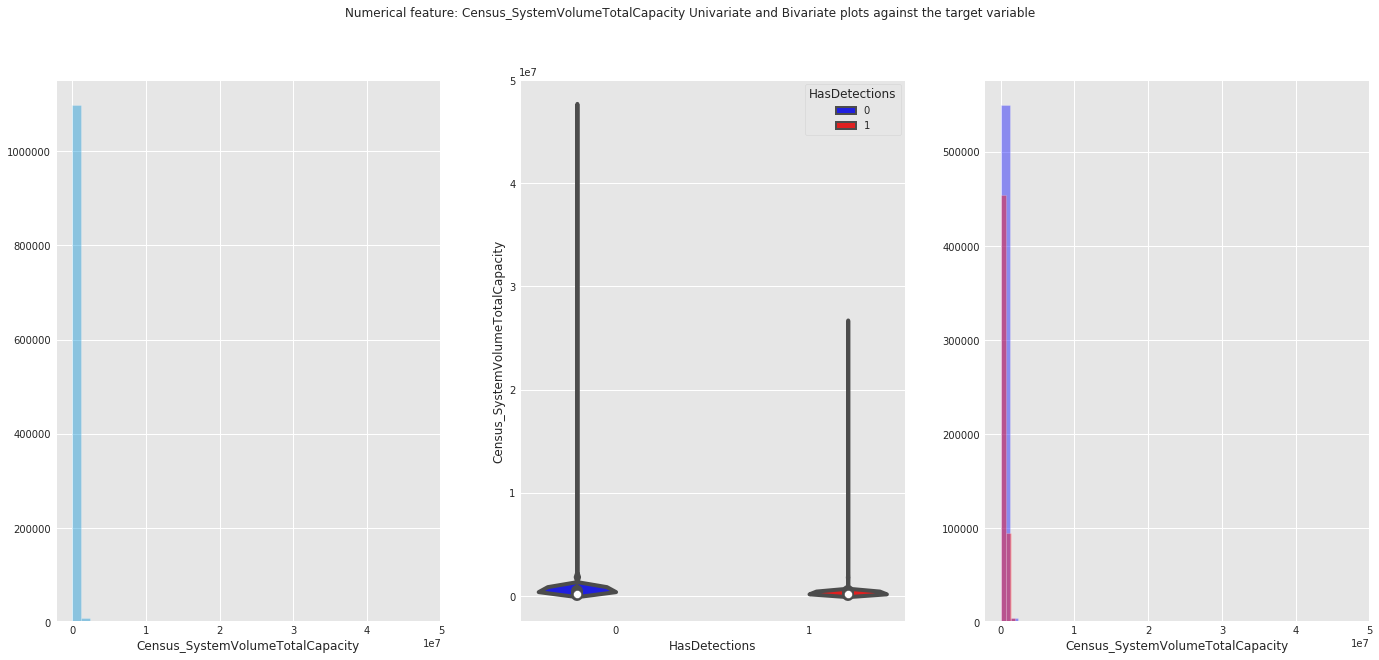

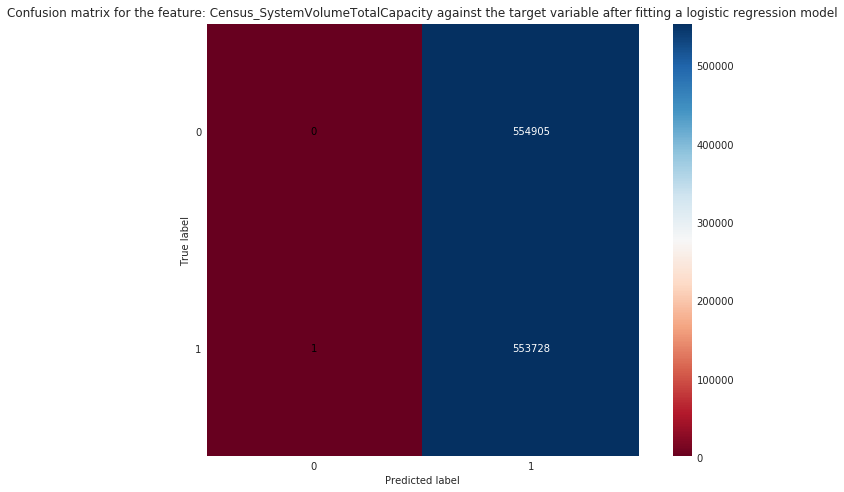

In [75]:
numerical_univariate_and_bivariate_plot("Census_SystemVolumeTotalCapacity")
logistic_fit("Census_SystemVolumeTotalCapacity")

In [76]:
numerical_univariate_and_bivariate_plot("Census_HasOpticalDiskDrive")
logistic_fit("Census_HasOpticalDiskDrive")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Census_TotalPhysicalRAM
4096.0     511017
8192.0     273878
2048.0     137885
16384.0     66939
6144.0      49824
12288.0     20192
3072.0      19188
1024.0       8236
32768.0      7208
24576.0      1525
Name: Census_TotalPhysicalRAM, dtype: int64
Min value 255.0
Max value 786432.0
NaN values 10046
Number of unique values 960
Mean value 6117.15087890625
Variance value 25677516.0

Fitting a logistic regression model for the feature Census_TotalPhysicalRAM against the target variable
              precision    recall  f1-score   support

           0       0.53      0.65      0.58    552655
           1       0.54      0.42      0.47    552484

   micro avg       0.53      0.53      0.53   1105139
   macro avg       0.54      0.53      0.53   1105139
weighted avg       0.54      0.53      0.53   1105139


accuracy score: 0.5337563872055914
F1 score: 0.5337563872055914


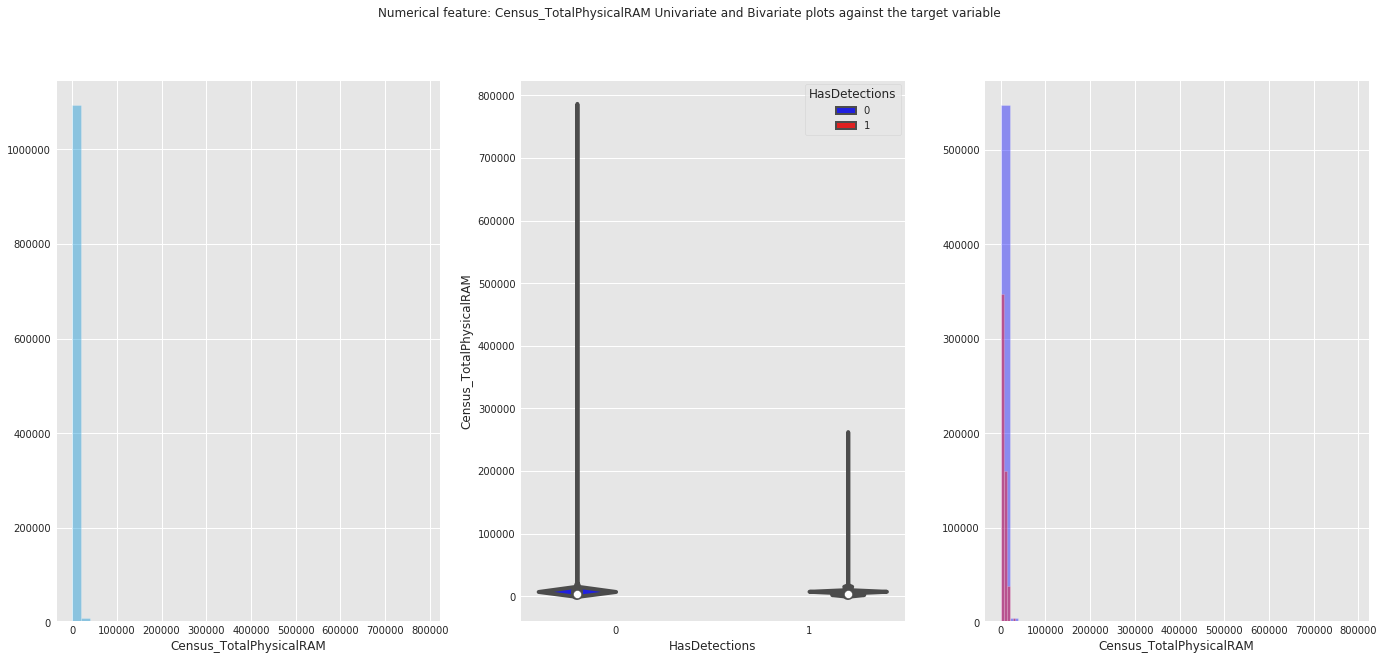

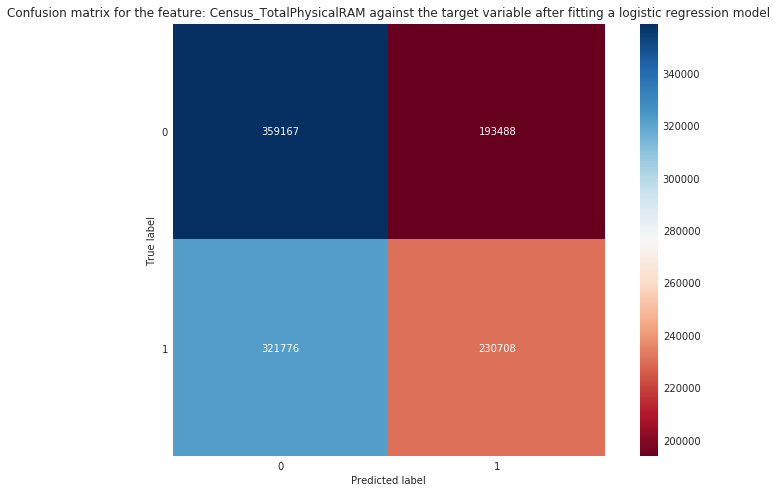

In [77]:
numerical_univariate_and_bivariate_plot("Census_TotalPhysicalRAM")
logistic_fit("Census_TotalPhysicalRAM")

Top 10 Values counts for the numerical feature Census_InternalPrimaryDiagonalDisplaySizeInInches
15.500000    381108
13.898438    119154
14.000000     67912
11.601562     39523
21.500000     34404
13.296875     30605
18.500000     26478
13.203125     25595
23.000000     23756
15.601562     22463
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, dtype: int64
Min value 3.0
Max value 173.5
NaN values 5859
Number of unique values 603
Mean value nan
Variance value 0.0

Fitting a logistic regression model for the feature Census_InternalPrimaryDiagonalDisplaySizeInInches against the target variable
              precision    recall  f1-score   support

           0       0.51      0.73      0.60    555107
           1       0.52      0.29      0.37    554219

   micro avg       0.51      0.51      0.51   1109326
   macro avg       0.52      0.51      0.49   1109326
weighted avg       0.52      0.51      0.49   1109326


accuracy score: 0.5131953997292049
F1 score: 0.5131953997292049


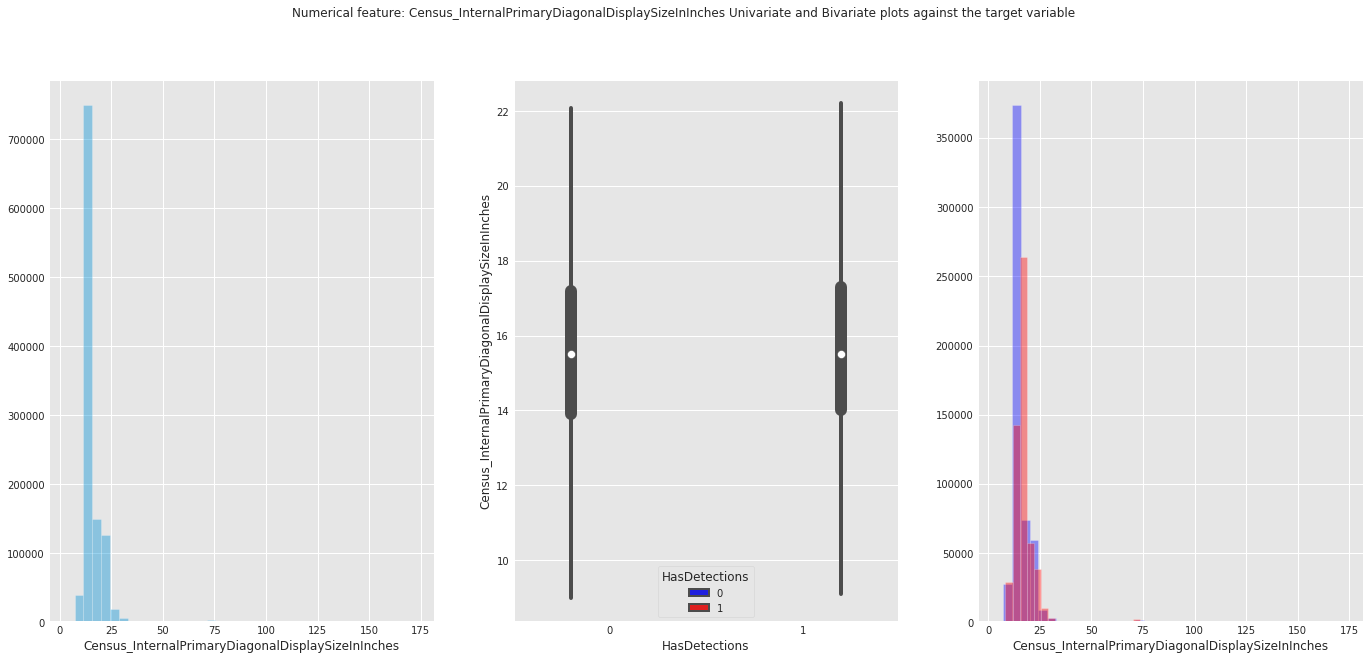

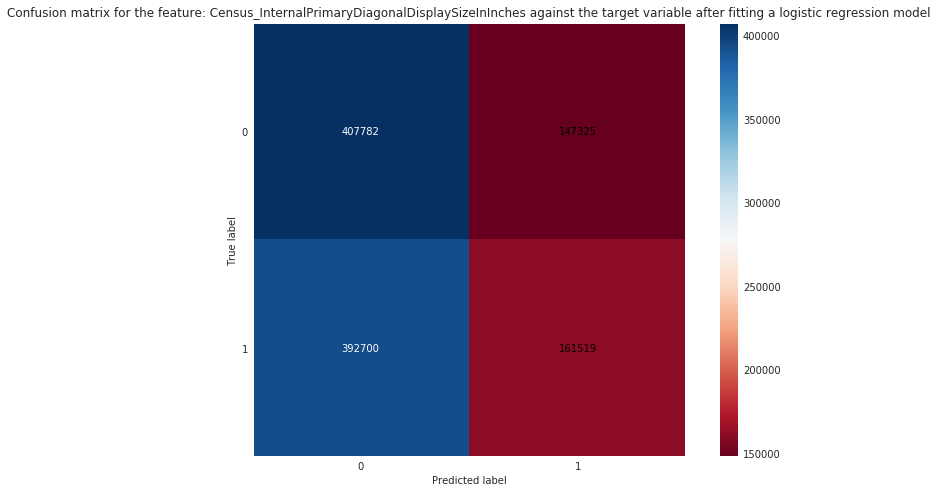

In [78]:
numerical_univariate_and_bivariate_plot("Census_InternalPrimaryDiagonalDisplaySizeInInches")
logistic_fit("Census_InternalPrimaryDiagonalDisplaySizeInInches")

Top 10 Values counts for the numerical feature Census_InternalPrimaryDisplayResolutionHorizontal
1366.0    563124
1920.0    278039
1280.0     66229
1600.0     62862
1024.0     42983
1440.0     21064
1360.0     15755
1680.0     13840
2560.0      8889
2736.0      7103
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: int64
Min value -1.0
Max value 11520.0
NaN values 5846
Number of unique values 830
Mean value nan
Variance value nan

Fitting a logistic regression model for the feature Census_InternalPrimaryDisplayResolutionHorizontal against the target variable
              precision    recall  f1-score   support

           0       0.51      0.66      0.58    555118
           1       0.52      0.37      0.43    554221

   micro avg       0.52      0.52      0.52   1109339
   macro avg       0.52      0.52      0.51   1109339
weighted avg       0.52      0.52      0.51   1109339


accuracy score: 0.5161172554106545
F1 score: 0.5161172554106545


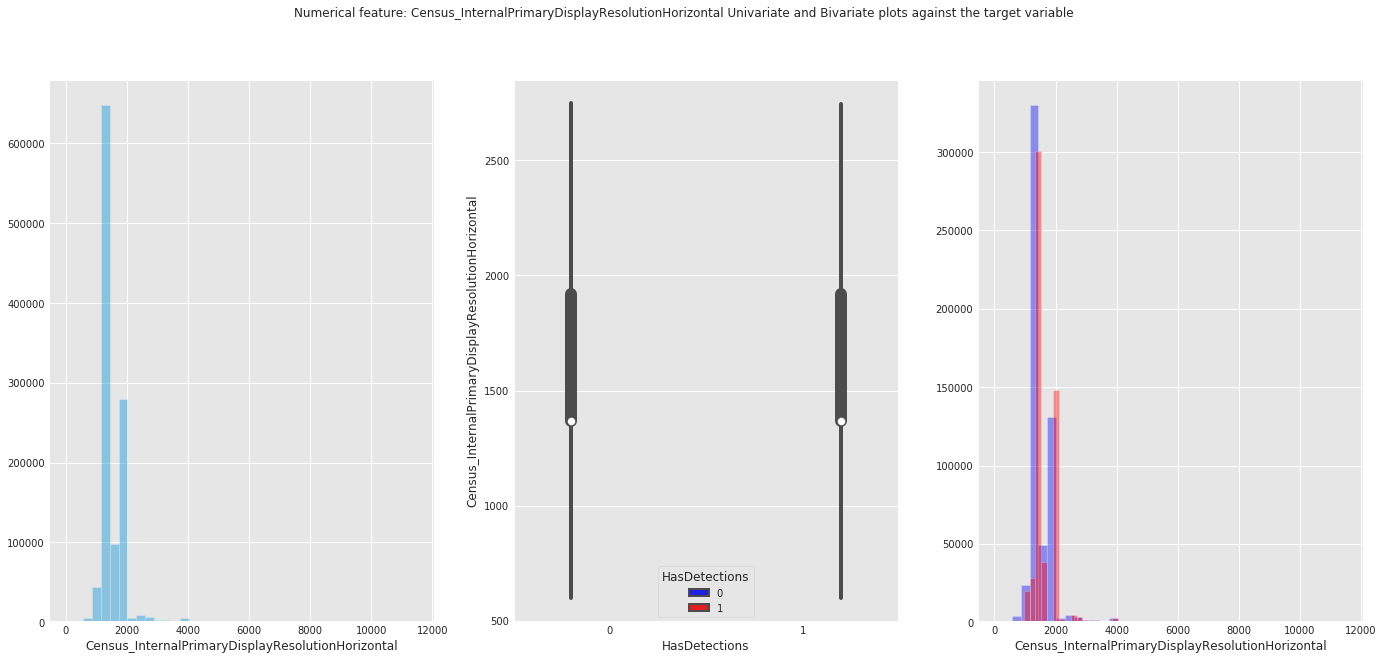

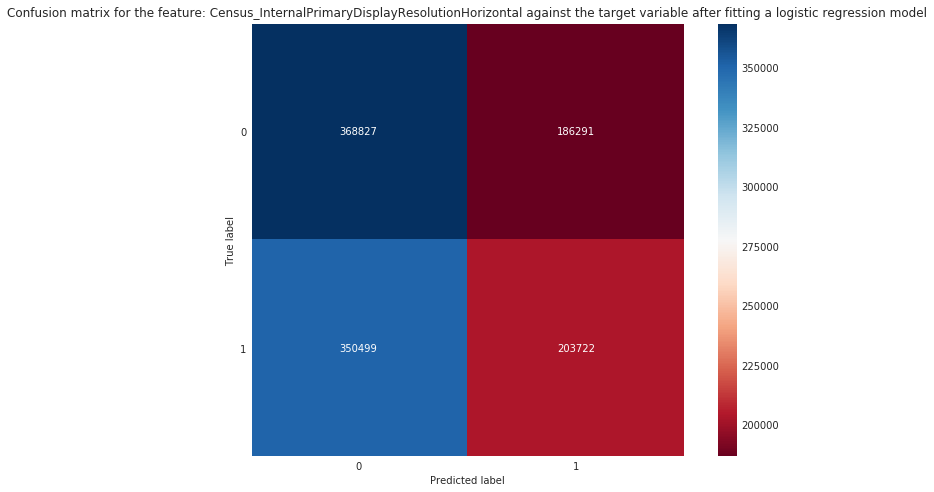

In [79]:
numerical_univariate_and_bivariate_plot("Census_InternalPrimaryDisplayResolutionHorizontal")
logistic_fit("Census_InternalPrimaryDisplayResolutionHorizontal")

Top 10 Values counts for the numerical feature Census_InternalPrimaryDisplayResolutionVertical
768.0     620325
1080.0    269115
900.0      82251
800.0      32912
1024.0     23462
1050.0     14188
1440.0     10120
1200.0      9824
600.0       7981
1824.0      7100
Name: Census_InternalPrimaryDisplayResolutionVertical, dtype: int64
Min value -1.0
Max value 5760.0
NaN values 5846
Number of unique values 779
Mean value nan
Variance value nan

Fitting a logistic regression model for the feature Census_InternalPrimaryDisplayResolutionVertical against the target variable
              precision    recall  f1-score   support

           0       0.51      0.69      0.59    555118
           1       0.52      0.34      0.41    554221

   micro avg       0.51      0.51      0.51   1109339
   macro avg       0.52      0.51      0.50   1109339
weighted avg       0.52      0.51      0.50   1109339


accuracy score: 0.5138294065204595
F1 score: 0.5138294065204595


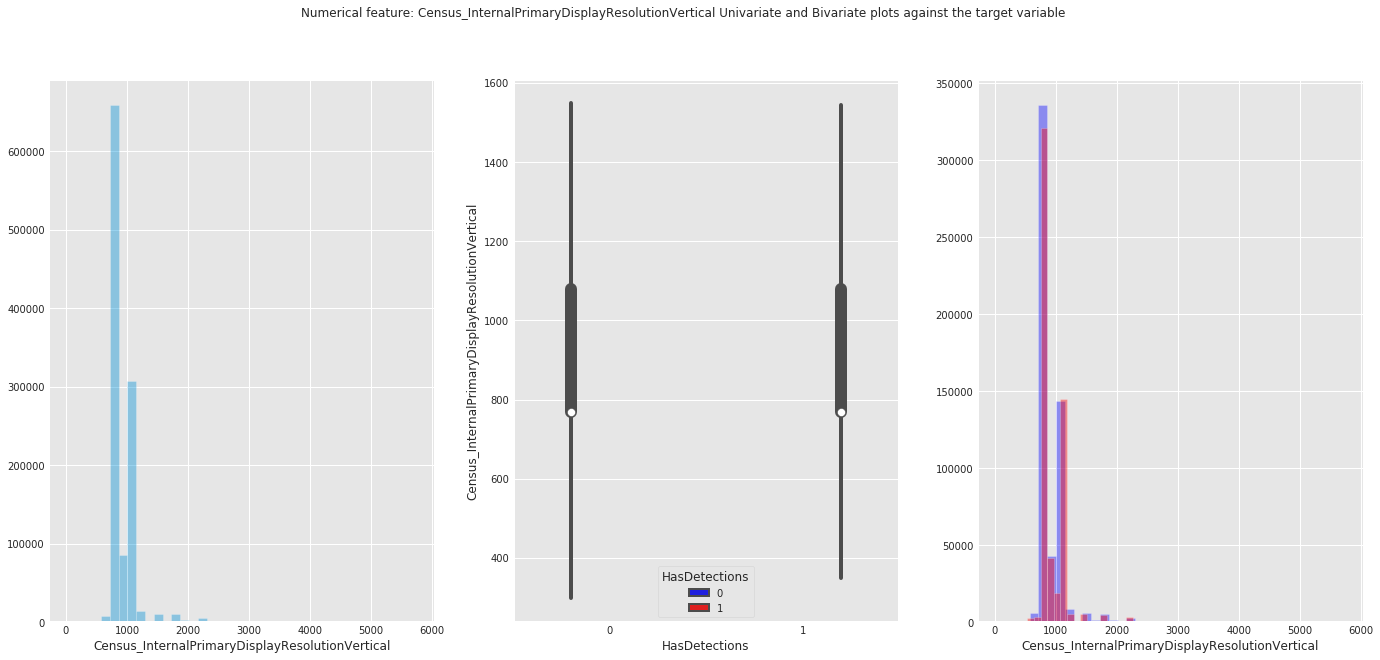

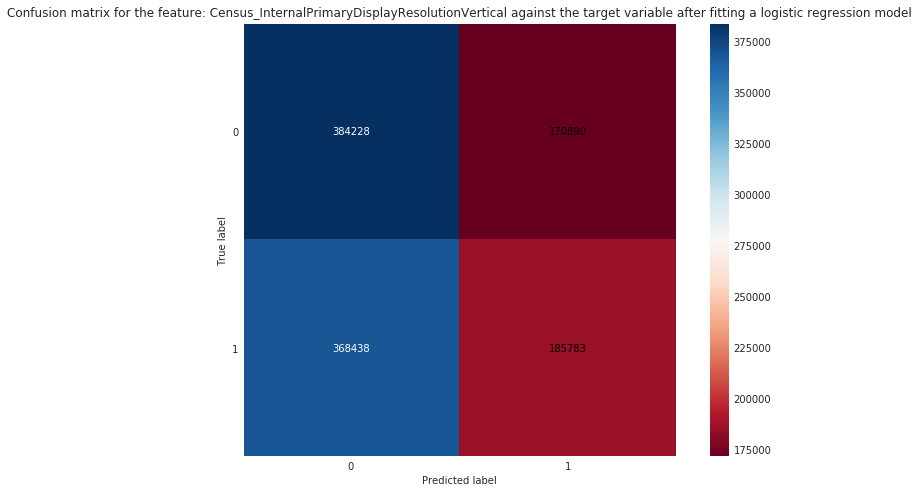

In [80]:
numerical_univariate_and_bivariate_plot("Census_InternalPrimaryDisplayResolutionVertical")
logistic_fit("Census_InternalPrimaryDisplayResolutionVertical")

Top 10 Values counts for the numerical feature Census_InternalBatteryNumberOfCharges
0.000000e+00    632038
4.294967e+09    282601
1.000000e+00      6677
2.000000e+00      3478
1.600000e+01      3415
3.000000e+00      2735
3.300000e+01      2471
4.000000e+00      2265
5.000000e+00      2089
6.000000e+00      1826
Name: Census_InternalBatteryNumberOfCharges, dtype: int64
Min value 0.0
Max value 4294967300.0
NaN values 33543
Number of unique values 9748
Mean value 1122147712.0
Variance value 3.540265263473623e+18

Fitting a logistic regression model for the feature Census_InternalBatteryNumberOfCharges against the target variable
              precision    recall  f1-score   support

           0       0.50      0.59      0.54    542338
           1       0.50      0.42      0.46    539304

   micro avg       0.50      0.50      0.50   1081642
   macro avg       0.50      0.50      0.50   1081642
weighted avg       0.50      0.50      0.50   1081642


accuracy score: 0.5019331719737214
F

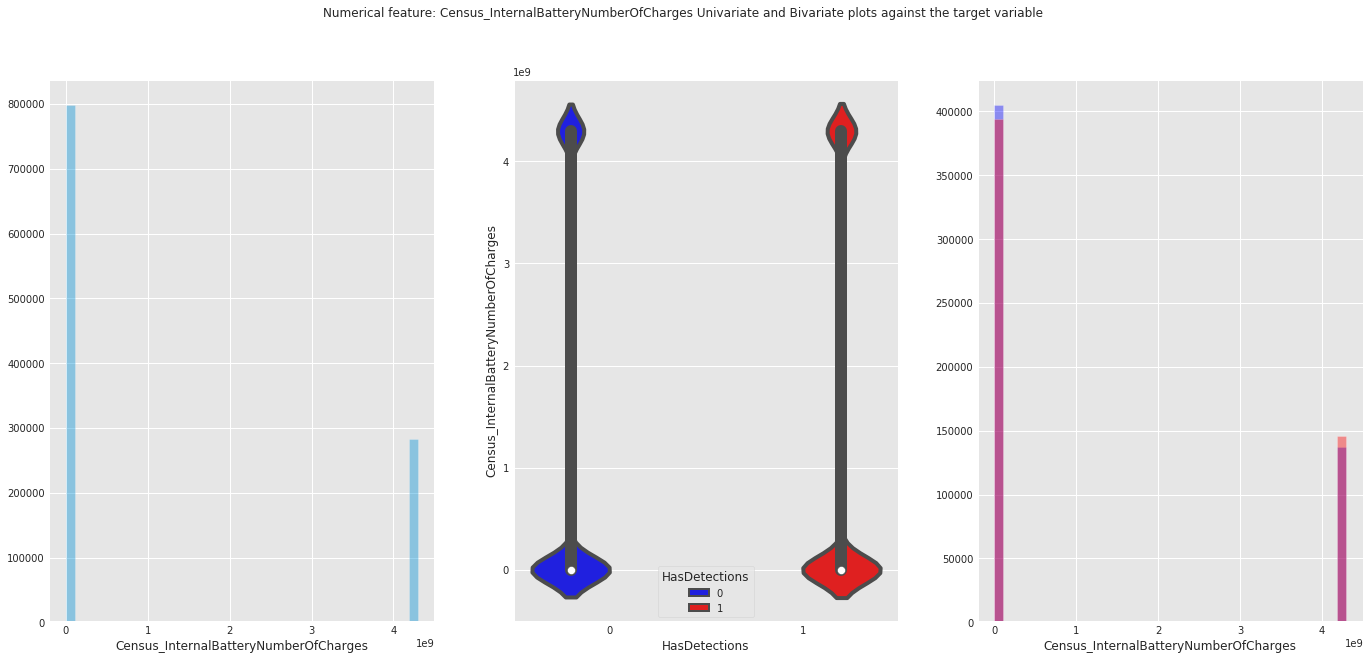

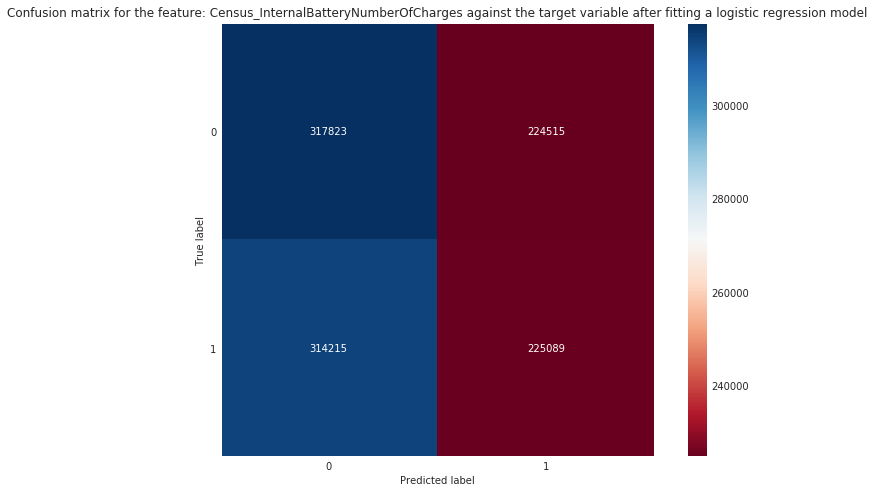

In [81]:
numerical_univariate_and_bivariate_plot("Census_InternalBatteryNumberOfCharges")
logistic_fit("Census_InternalBatteryNumberOfCharges")

Top 10 Values counts for the numerical feature Census_OSBuildNumber
17134    501841
16299    305948
15063     98883
14393     97522
10586     74285
10240     33972
17692       373
17738       367
17744       313
17758       222
Name: Census_OSBuildNumber, dtype: int64
Min value 7601
Max value 18242
NaN values 0
Number of unique values 87
Mean value 15836.748212180042
Variance value 3850960.674672966

Fitting a logistic regression model for the feature Census_OSBuildNumber against the target variable


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    558014
           1       0.50      1.00      0.67    557171

   micro avg       0.50      0.50      0.50   1115185
   macro avg       0.25      0.50      0.33   1115185
weighted avg       0.25      0.50      0.33   1115185


accuracy score: 0.49962203580571835
F1 score: 0.49962203580571835


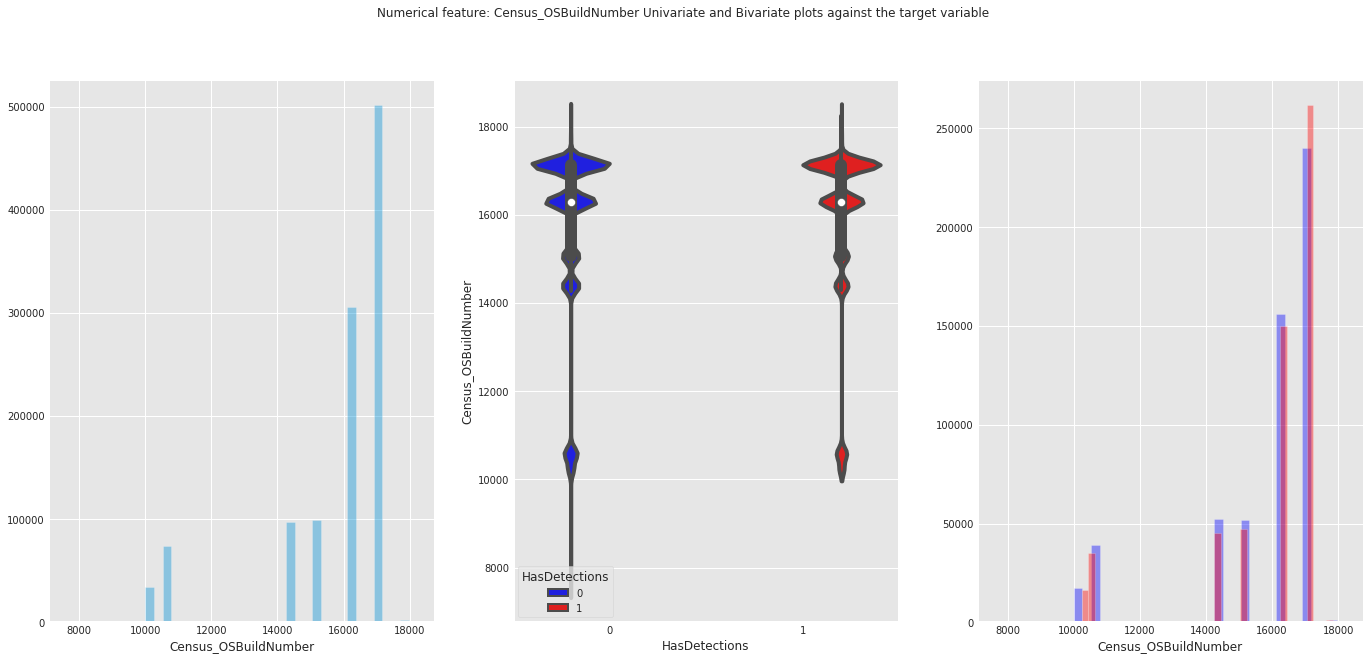

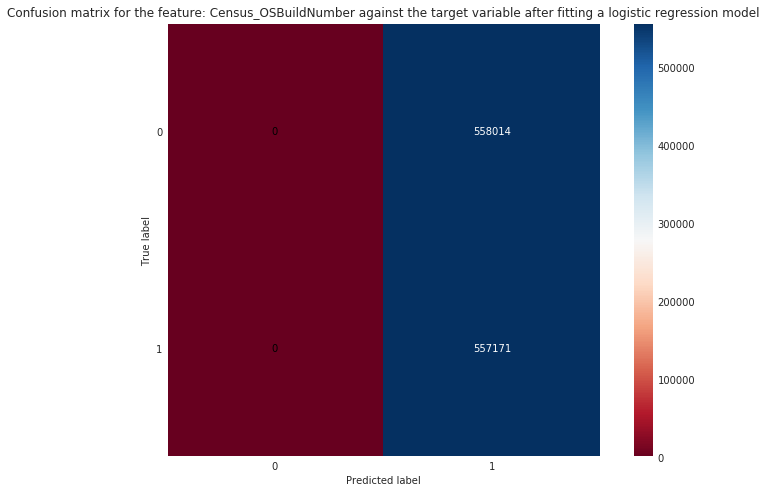

In [82]:
numerical_univariate_and_bivariate_plot("Census_OSBuildNumber")
logistic_fit("Census_OSBuildNumber")

Top 10 Values counts for the numerical feature Census_OSBuildRevision
228     177208
165     112313
431      68557
285      58503
112      43344
547      42892
371      40719
191      28869
2189     27641
611      27255
Name: Census_OSBuildRevision, dtype: int64
Min value 0
Max value 24149
NaN values 0
Number of unique values 248
Mean value 971.7896591148553
Variance value 8601436.224434618

Fitting a logistic regression model for the feature Census_OSBuildRevision against the target variable
              precision    recall  f1-score   support

           0       0.52      0.44      0.48    558014
           1       0.51      0.60      0.55    557171

   micro avg       0.52      0.52      0.52   1115185
   macro avg       0.52      0.52      0.51   1115185
weighted avg       0.52      0.52      0.51   1115185


accuracy score: 0.5169258912198424
F1 score: 0.5169258912198424


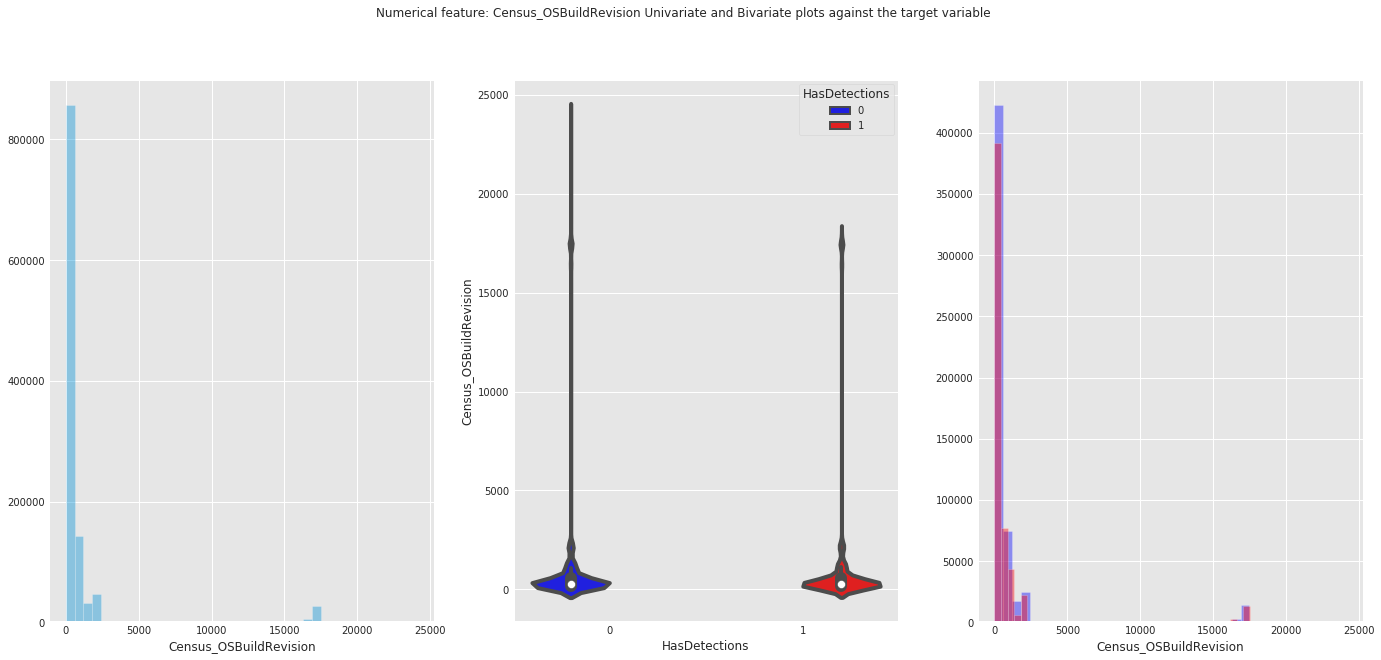

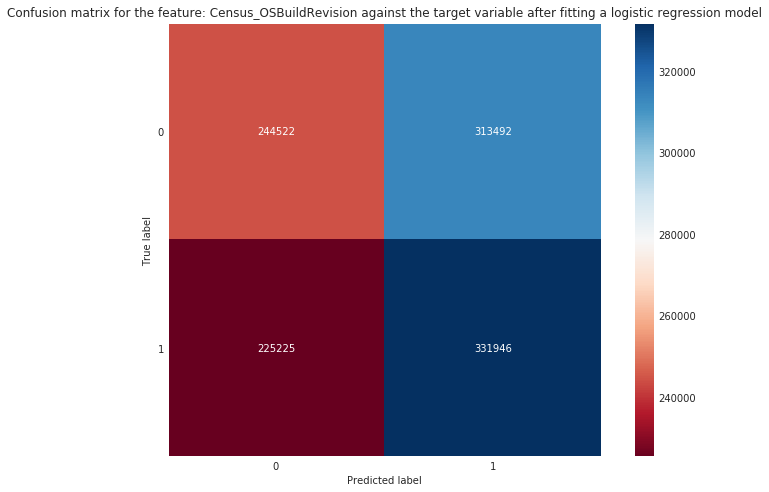

In [83]:
numerical_univariate_and_bivariate_plot("Census_OSBuildRevision")
logistic_fit("Census_OSBuildRevision")

Top 10 Values counts for the numerical feature Census_OSInstallLanguageIdentifier
8.0     397762
9.0     129362
7.0      64099
29.0     61628
14.0     54180
37.0     50123
10.0     45545
26.0     41657
5.0      31514
35.0     25450
Name: Census_OSInstallLanguageIdentifier, dtype: int64
Min value 1.0
Max value 39.0
NaN values 7382
Number of unique values 39
Mean value nan
Variance value 0.0

Fitting a logistic regression model for the feature Census_OSInstallLanguageIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      0.72      0.59    554378
           1       0.50      0.28      0.36    553425

   micro avg       0.50      0.50      0.50   1107803
   macro avg       0.50      0.50      0.47   1107803
weighted avg       0.50      0.50      0.47   1107803


accuracy score: 0.4988693838164367
F1 score: 0.4988693838164367


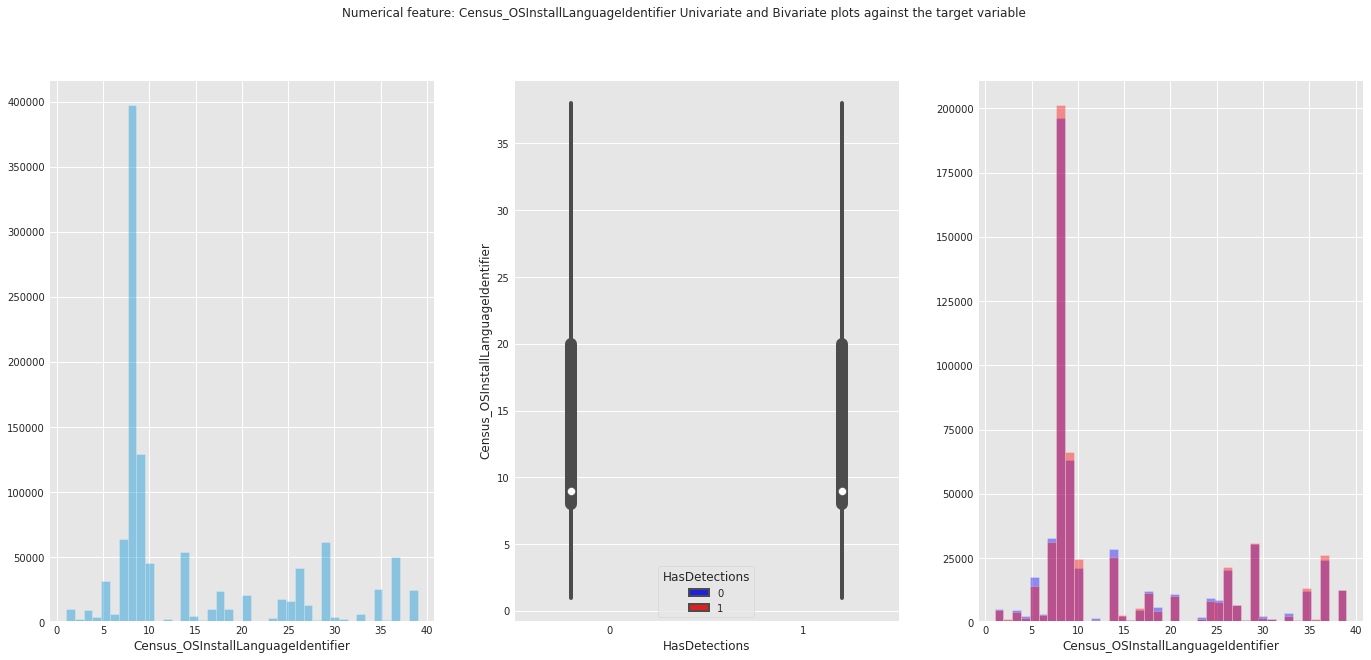

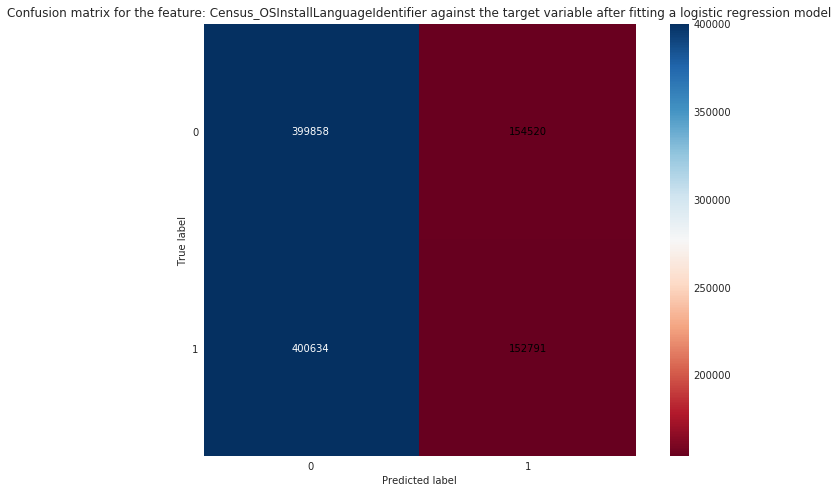

In [84]:
numerical_univariate_and_bivariate_plot("Census_OSInstallLanguageIdentifier")
logistic_fit("Census_OSInstallLanguageIdentifier")

Top 10 Values counts for the numerical feature Census_OSUILocaleIdentifier
31     396680
34     130042
30      64195
125     62390
49      54711
158     50732
35      46907
119     42048
26      31519
148     25690
Name: Census_OSUILocaleIdentifier, dtype: int64
Min value 1
Max value 162
NaN values 0
Number of unique values 100
Mean value 60.417545967709394
Variance value 2021.503284191712

Fitting a logistic regression model for the feature Census_OSUILocaleIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      0.73      0.59    558014
           1       0.50      0.27      0.35    557171

   micro avg       0.50      0.50      0.50   1115185
   macro avg       0.50      0.50      0.47   1115185
weighted avg       0.50      0.50      0.47   1115185


accuracy score: 0.5003519595403453
F1 score: 0.5003519595403453


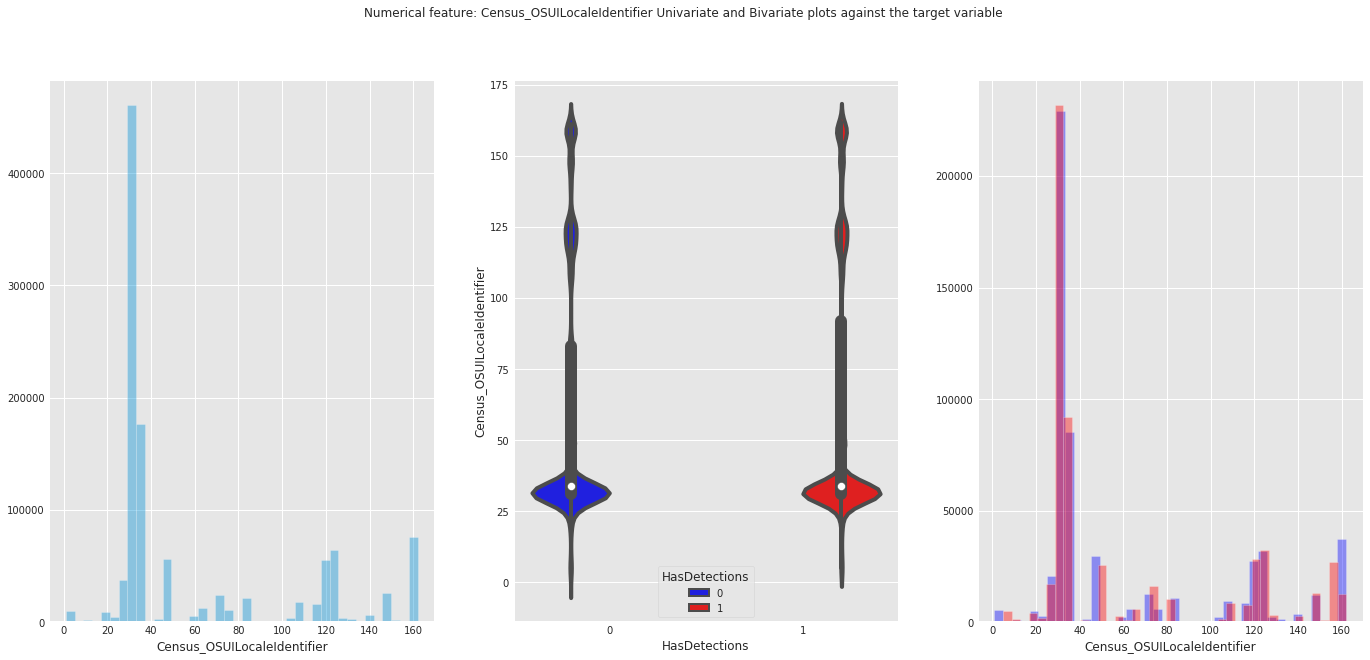

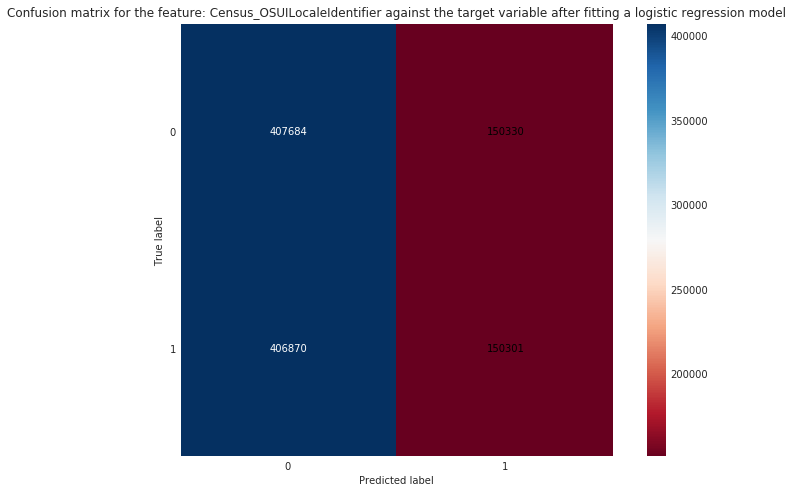

In [85]:
numerical_univariate_and_bivariate_plot("Census_OSUILocaleIdentifier")
logistic_fit("Census_OSUILocaleIdentifier")

In [86]:
numerical_univariate_and_bivariate_plot("Census_IsPortableOperatingSystem")
logistic_fit("Census_IsPortableOperatingSystem")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Census_IsFlightingInternal
0.0    189291
1.0         3
Name: Census_IsFlightingInternal, dtype: int64
Min value 0.0
Max value 1.0
NaN values 925891
Number of unique values 2

Fitting a logistic regression model for the feature Census_IsFlightingInternal against the target variable
              precision    recall  f1-score   support

           0       0.51      1.00      0.68     97474
           1       0.67      0.00      0.00     91820

   micro avg       0.51      0.51      0.51    189294
   macro avg       0.59      0.50      0.34    189294
weighted avg       0.59      0.51      0.35    189294


accuracy score: 0.5149397233932401
F1 score: 0.5149397233932401


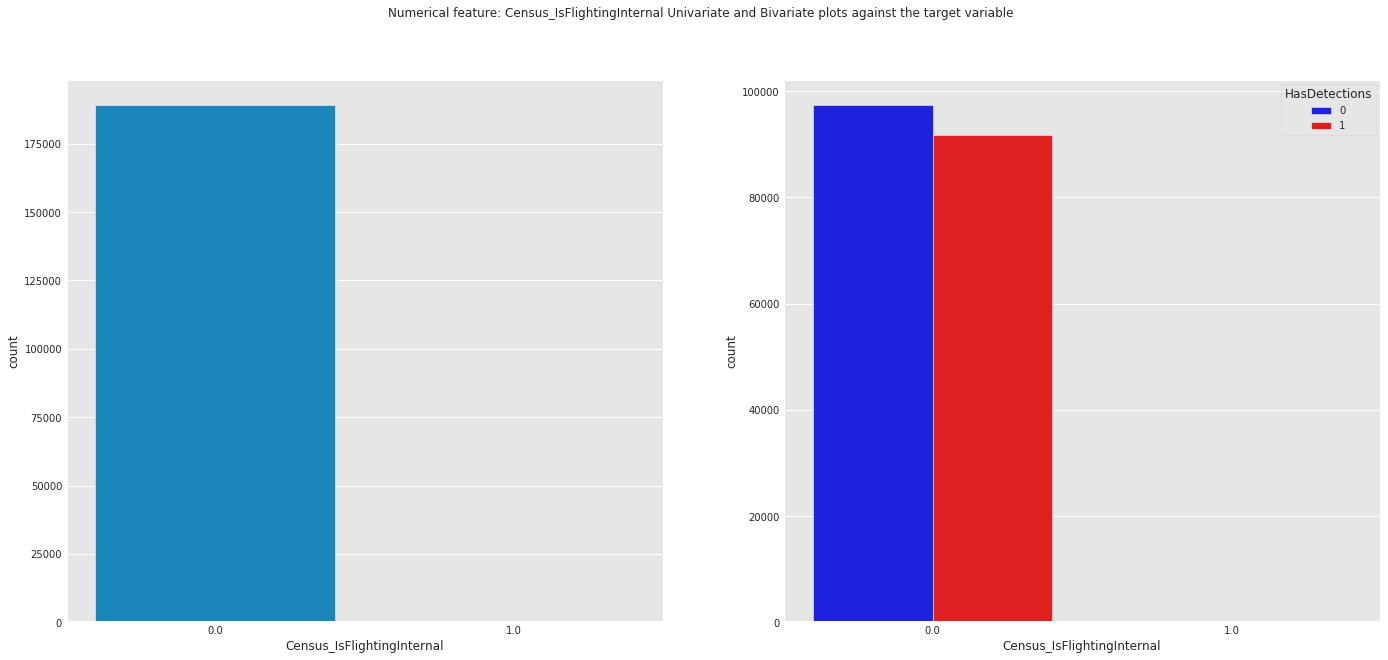

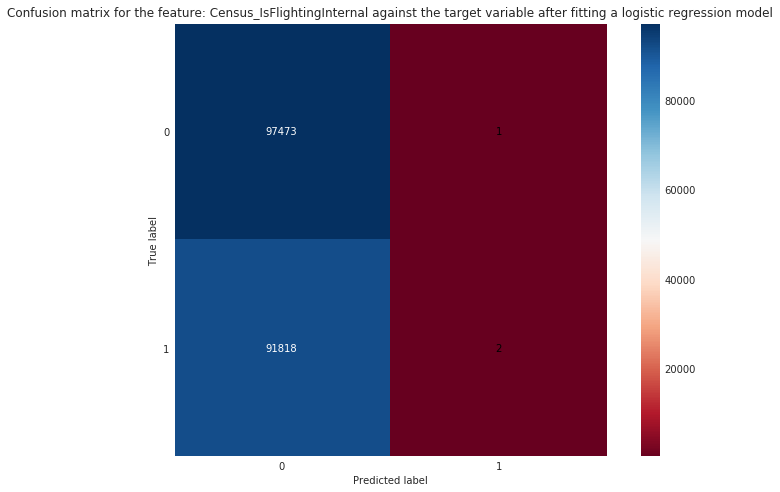

In [87]:
numerical_univariate_and_bivariate_plot("Census_IsFlightingInternal")
logistic_fit("Census_IsFlightingInternal")

In [88]:
numerical_univariate_and_bivariate_plot("Census_IsFlightsDisabled")
logistic_fit("Census_IsFlightsDisabled")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Census_ThresholdOptIn
0.0    406701
1.0       101
Name: Census_ThresholdOptIn, dtype: int64
Min value 0.0
Max value 1.0
NaN values 708383
Number of unique values 2

Fitting a logistic regression model for the feature Census_ThresholdOptIn against the target variable


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.51      1.00      0.68    207339
           1       0.00      0.00      0.00    199463

   micro avg       0.51      0.51      0.51    406802
   macro avg       0.25      0.50      0.34    406802
weighted avg       0.26      0.51      0.34    406802


accuracy score: 0.5096803850521876
F1 score: 0.5096803850521876


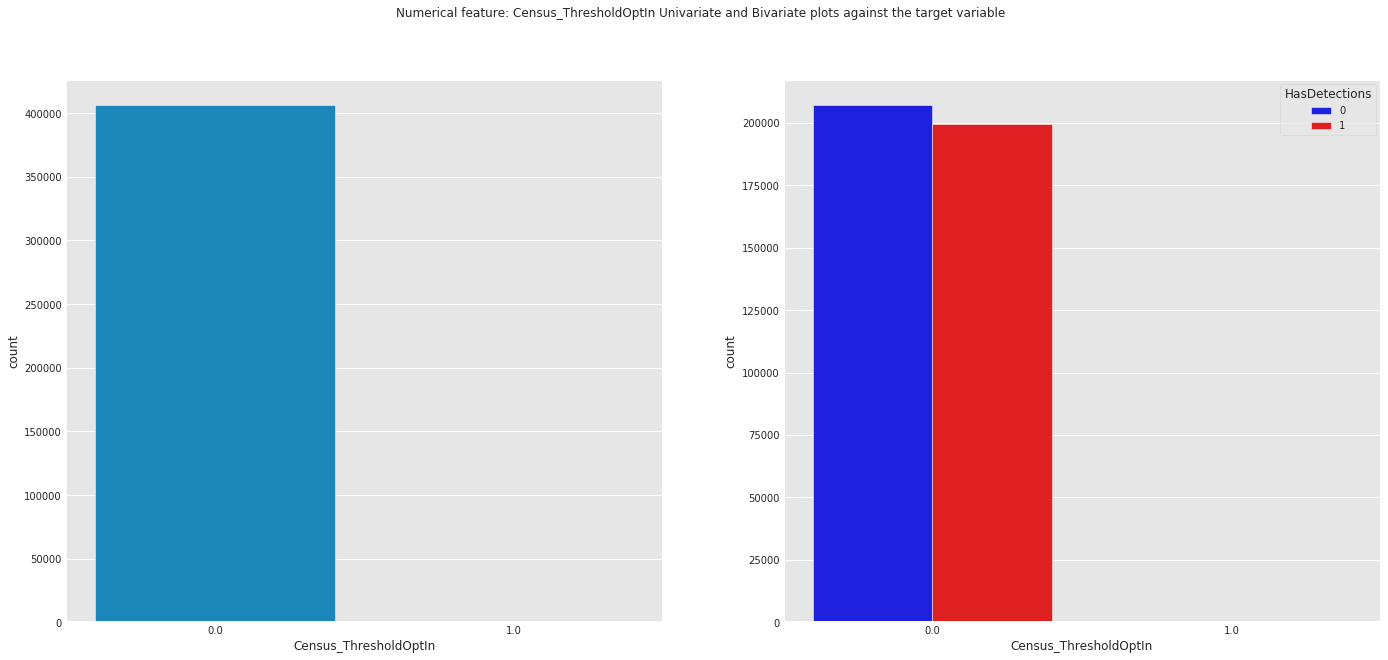

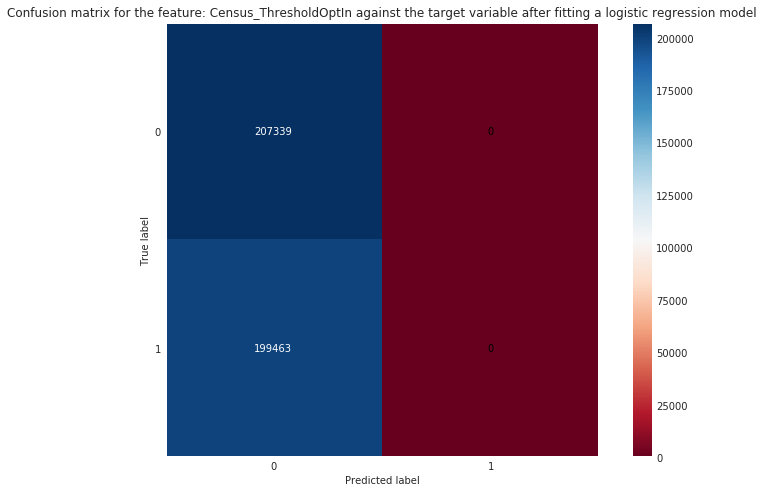

In [89]:
numerical_univariate_and_bivariate_plot("Census_ThresholdOptIn")
logistic_fit("Census_ThresholdOptIn")

Top 10 Values counts for the numerical feature Census_FirmwareManufacturerIdentifier
142.0    337257
628.0    153599
554.0    146479
355.0    117793
556.0    100059
500.0     48439
93.0      23781
807.0     19649
513.0     17840
127.0     15399
Name: Census_FirmwareManufacturerIdentifier, dtype: int64
Min value 11.0
Max value 1084.0
NaN values 23016
Number of unique values 397
Mean value nan
Variance value nan

Fitting a logistic regression model for the feature Census_FirmwareManufacturerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.54      0.52    544731
           1       0.51      0.48      0.50    547438

   micro avg       0.51      0.51      0.51   1092169
   macro avg       0.51      0.51      0.51   1092169
weighted avg       0.51      0.51      0.51   1092169


accuracy score: 0.5115636865723162
F1 score: 0.5115636865723162


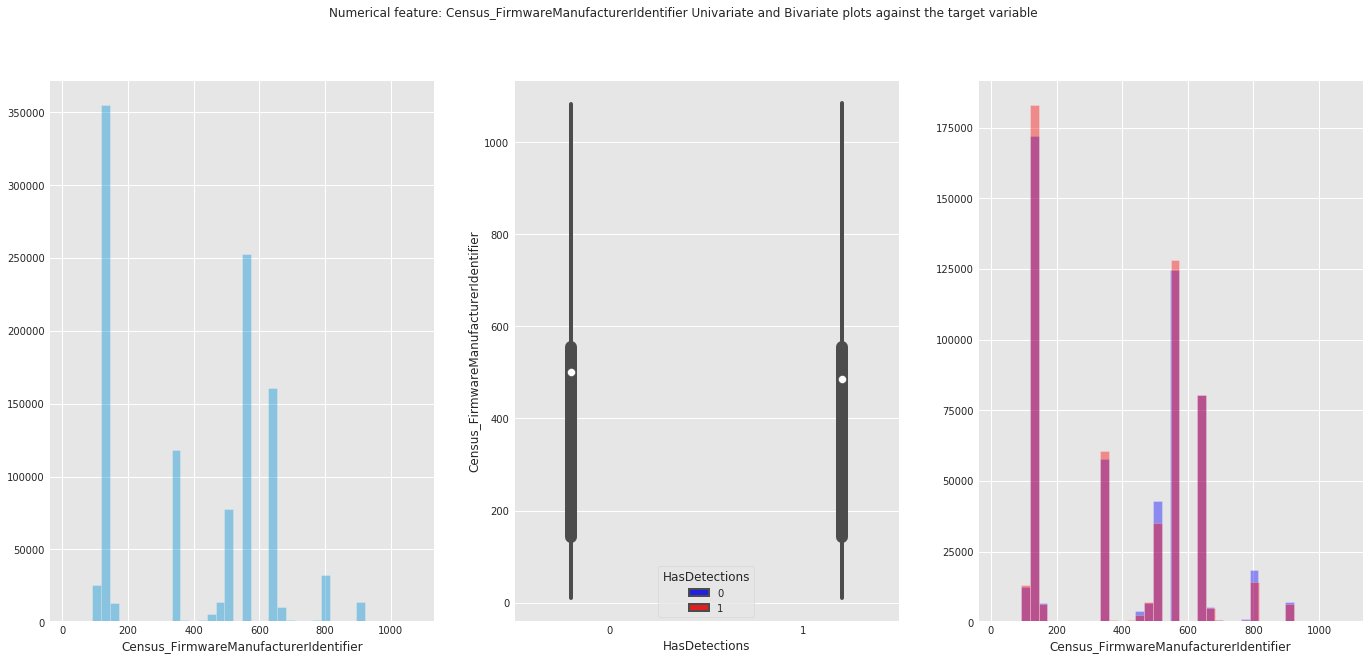

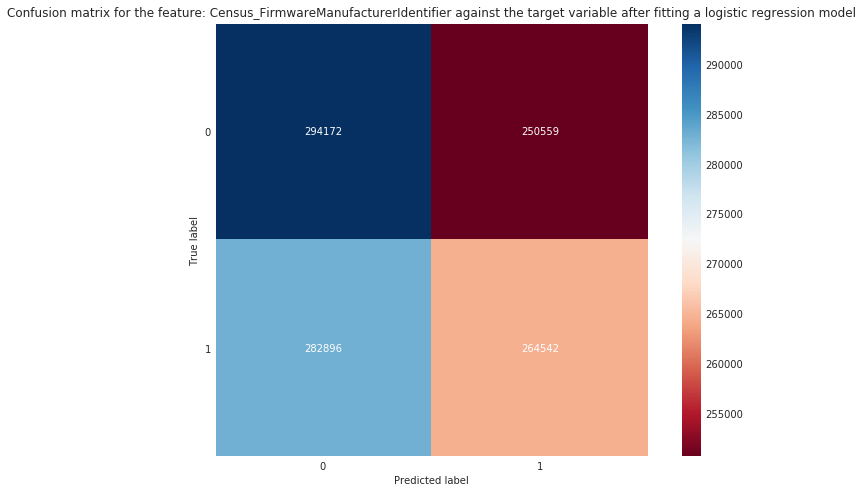

In [90]:
numerical_univariate_and_bivariate_plot("Census_FirmwareManufacturerIdentifier")
logistic_fit("Census_FirmwareManufacturerIdentifier")

Top 10 Values counts for the numerical feature Census_FirmwareManufacturerIdentifier
142.0    337257
628.0    153599
554.0    146479
355.0    117793
556.0    100059
500.0     48439
93.0      23781
807.0     19649
513.0     17840
127.0     15399
Name: Census_FirmwareManufacturerIdentifier, dtype: int64
Min value 11.0
Max value 1084.0
NaN values 23016
Number of unique values 397
Mean value nan
Variance value nan

Fitting a logistic regression model for the feature Census_FirmwareManufacturerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.54      0.52    544731
           1       0.51      0.48      0.50    547438

   micro avg       0.51      0.51      0.51   1092169
   macro avg       0.51      0.51      0.51   1092169
weighted avg       0.51      0.51      0.51   1092169


accuracy score: 0.5115636865723162
F1 score: 0.5115636865723162


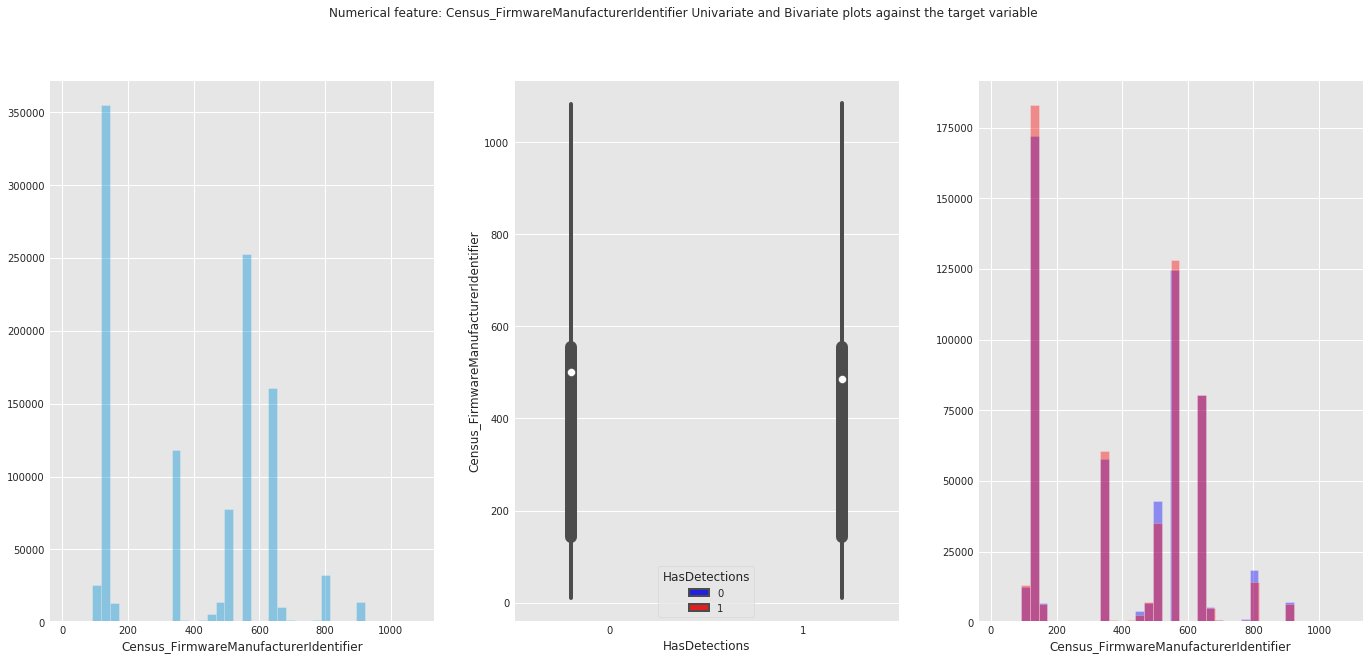

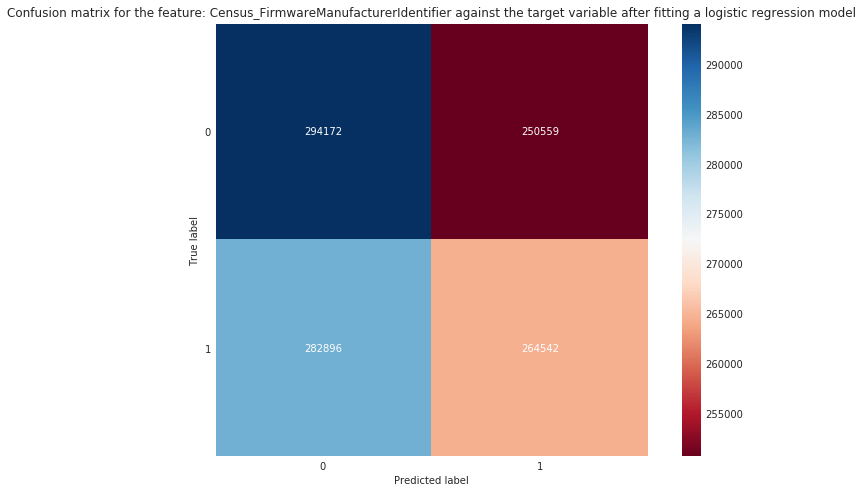

In [91]:
numerical_univariate_and_bivariate_plot("Census_FirmwareManufacturerIdentifier")
logistic_fit("Census_FirmwareManufacturerIdentifier")

Top 10 Values counts for the numerical feature Census_FirmwareVersionIdentifier
33105.0    11180
33111.0     7544
33054.0     6960
33108.0     6942
63175.0     6703
11778.0     6644
33115.0     6298
63155.0     6192
33060.0     6003
19970.0     5755
Name: Census_FirmwareVersionIdentifier, dtype: int64
Min value 10.0
Max value 72102.0
NaN values 20077
Number of unique values 30147
Mean value 33025.9609375
Variance value 450224096.0

Fitting a logistic regression model for the feature Census_FirmwareVersionIdentifier against the target variable


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    546501
           1       0.50      1.00      0.67    548607

   micro avg       0.50      0.50      0.50   1095108
   macro avg       0.25      0.50      0.33   1095108
weighted avg       0.25      0.50      0.33   1095108


accuracy score: 0.500961548997907
F1 score: 0.500961548997907


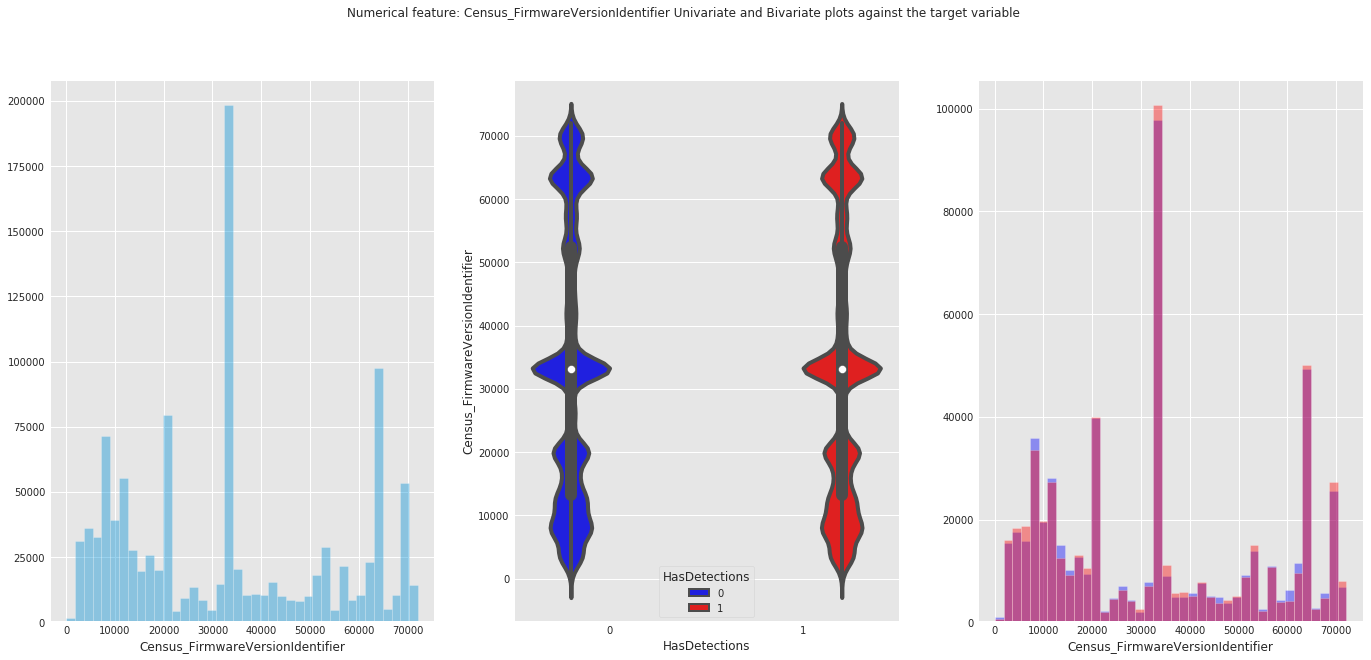

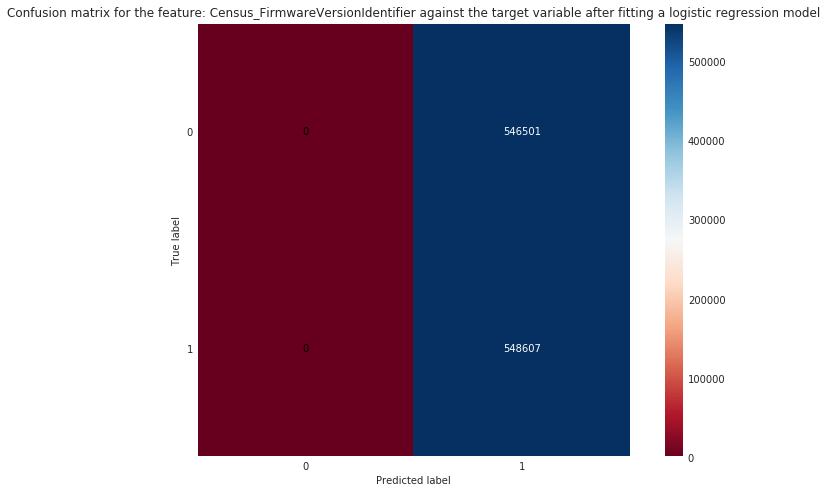

In [92]:
numerical_univariate_and_bivariate_plot("Census_FirmwareVersionIdentifier")
logistic_fit("Census_FirmwareVersionIdentifier")

Top 10 Values counts for the numerical feature Census_IsSecureBootEnabled
0    573525
1    541660
Name: Census_IsSecureBootEnabled, dtype: int64
Min value 0
Max value 1
NaN values 0
Number of unique values 2

Fitting a logistic regression model for the feature Census_IsSecureBootEnabled against the target variable
              precision    recall  f1-score   support

           0       0.50      0.49      0.49    558014
           1       0.50      0.52      0.51    557171

   micro avg       0.50      0.50      0.50   1115185
   macro avg       0.50      0.50      0.50   1115185
weighted avg       0.50      0.50      0.50   1115185


accuracy score: 0.500995798903321
F1 score: 0.500995798903321


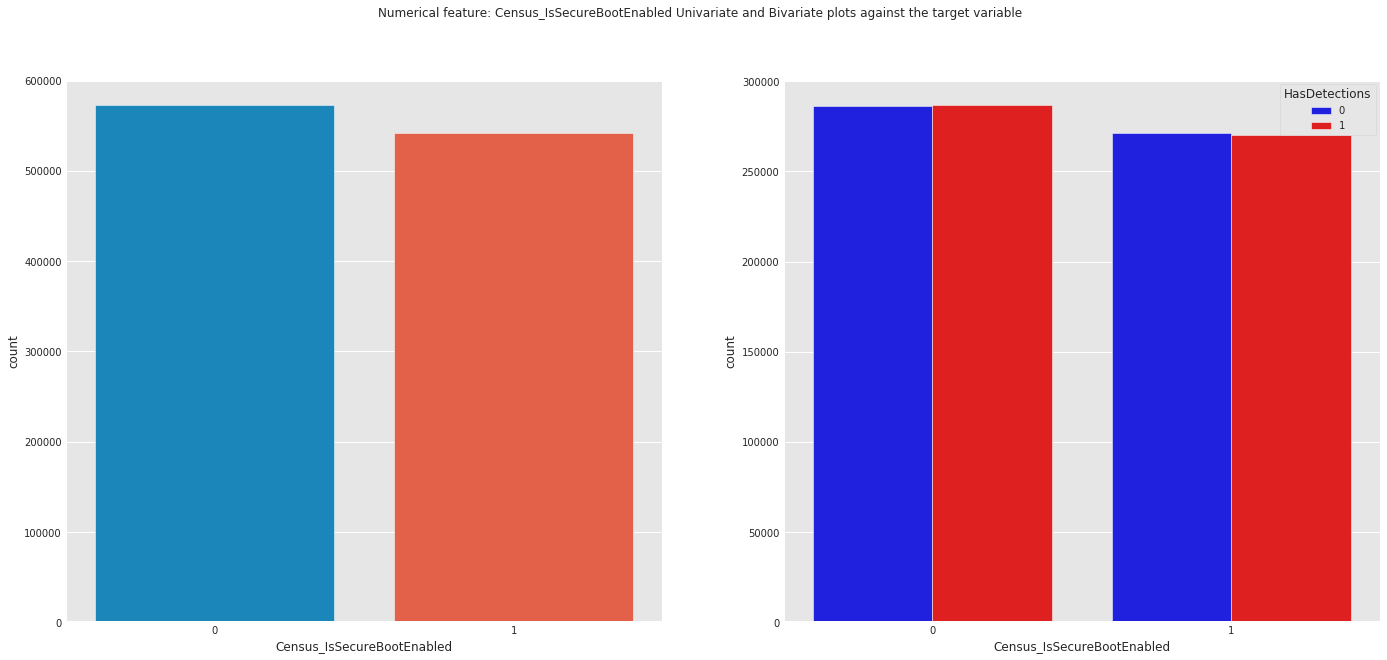

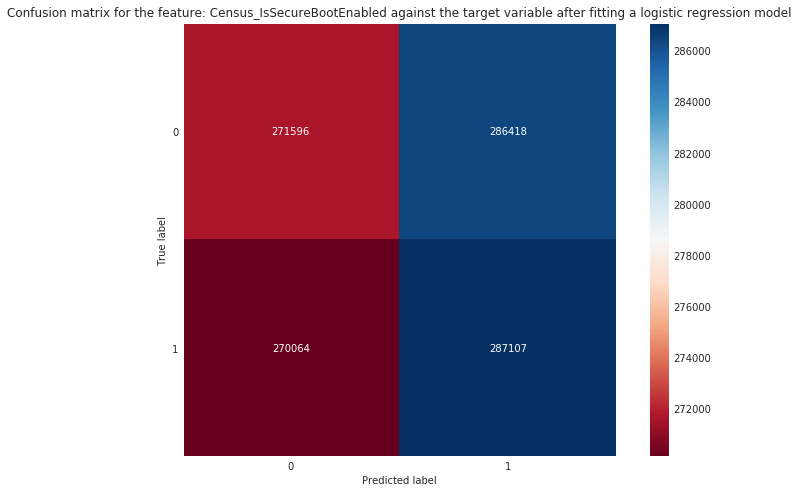

In [93]:
numerical_univariate_and_bivariate_plot("Census_IsSecureBootEnabled")
logistic_fit("Census_IsSecureBootEnabled")

Top 10 Values counts for the numerical feature Census_IsWIMBootEnabled
0.0    407762
1.0         1
Name: Census_IsWIMBootEnabled, dtype: int64
Min value 0.0
Max value 1.0
NaN values 707422
Number of unique values 2

Fitting a logistic regression model for the feature Census_IsWIMBootEnabled against the target variable


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.51      1.00      0.68    207874
           1       0.00      0.00      0.00    199889

   micro avg       0.51      0.51      0.51    407763
   macro avg       0.25      0.50      0.34    407763
weighted avg       0.26      0.51      0.34    407763


accuracy score: 0.5097912267665285
F1 score: 0.5097912267665285


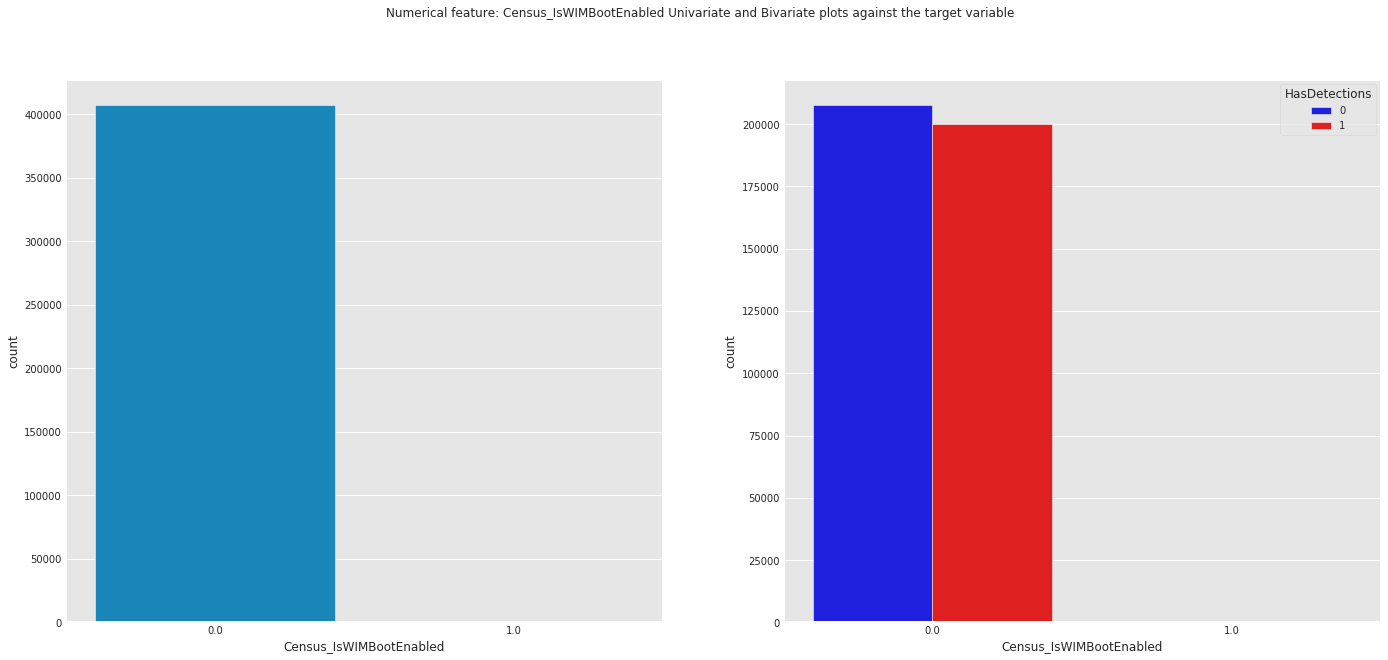

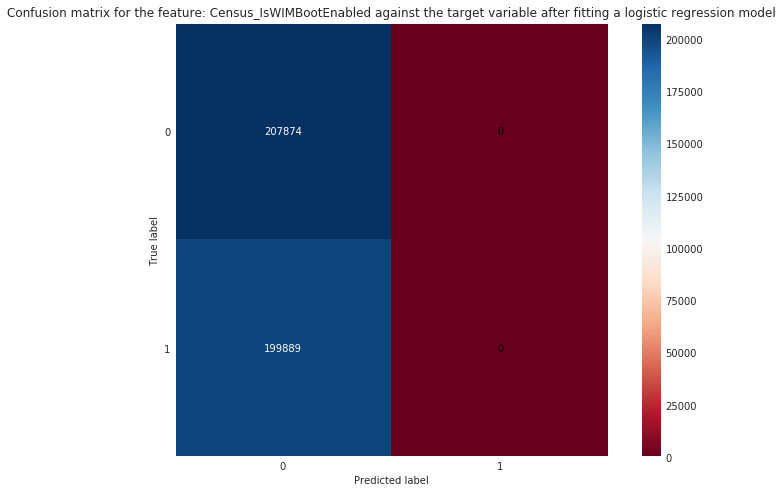

In [94]:
numerical_univariate_and_bivariate_plot("Census_IsWIMBootEnabled")
logistic_fit("Census_IsWIMBootEnabled")

In [95]:
numerical_univariate_and_bivariate_plot("Census_IsVirtualDevice")
logistic_fit("Census_IsVirtualDevice")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Census_IsTouchEnabled
0    974974
1    140211
Name: Census_IsTouchEnabled, dtype: int64
Min value 0
Max value 1
NaN values 0
Number of unique values 2

Fitting a logistic regression model for the feature Census_IsTouchEnabled against the target variable
              precision    recall  f1-score   support

           0       0.55      0.14      0.22    558014
           1       0.51      0.89      0.65    557171

   micro avg       0.51      0.51      0.51   1115185
   macro avg       0.53      0.51      0.43   1115185
weighted avg       0.53      0.51      0.43   1115185


accuracy score: 0.512962423275062
F1 score: 0.512962423275062


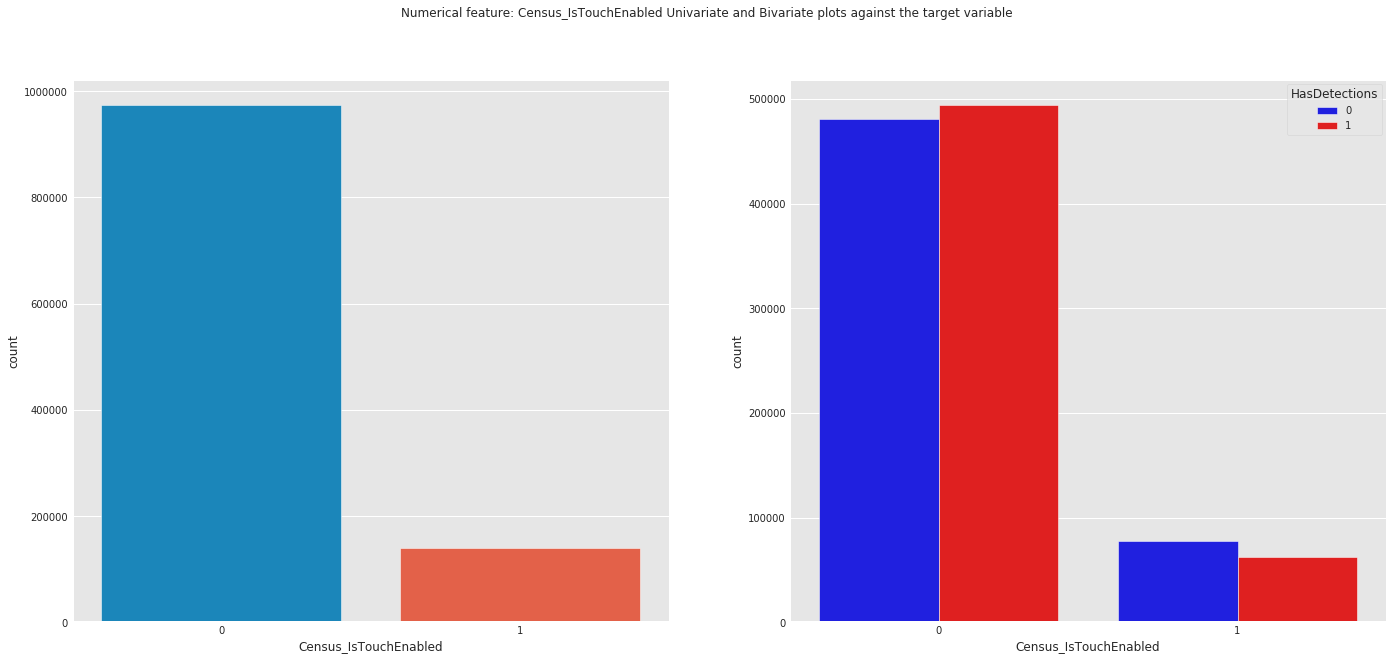

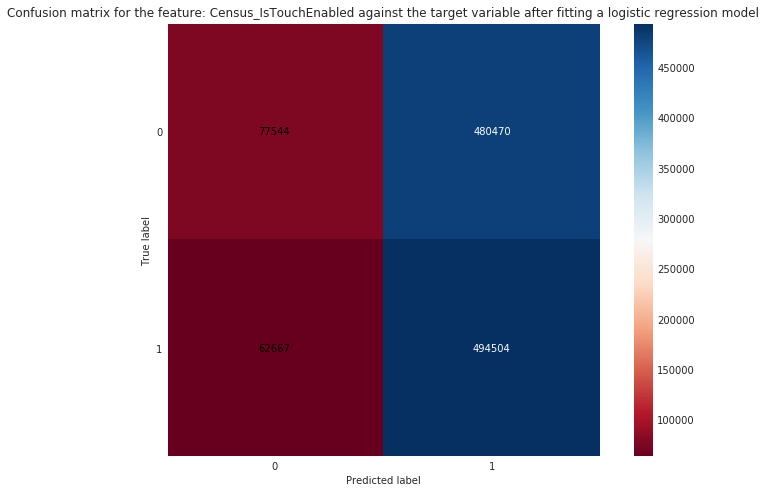

In [96]:
numerical_univariate_and_bivariate_plot("Census_IsTouchEnabled")
logistic_fit("Census_IsTouchEnabled")

In [97]:
numerical_univariate_and_bivariate_plot("Census_IsPenCapable")
logistic_fit("Census_IsPenCapable")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


In [98]:
numerical_univariate_and_bivariate_plot("Census_IsAlwaysOnAlwaysConnectedCapable")
logistic_fit("Census_IsAlwaysOnAlwaysConnectedCapable")

This feature has been removed from dataset due to high NaN rate or highly unbalanced values
This feature has been removed from dataset due to high NaN rate or highly unbalanced values


Top 10 Values counts for the numerical feature Wdft_IsGamer
0.0    771842
1.0    305427
Name: Wdft_IsGamer, dtype: int64
Min value 0.0
Max value 1.0
NaN values 37916
Number of unique values 2

Fitting a logistic regression model for the feature Wdft_IsGamer against the target variable
              precision    recall  f1-score   support

           0       0.52      0.74      0.61    539766
           1       0.54      0.31      0.39    537503

   micro avg       0.53      0.53      0.53   1077269
   macro avg       0.53      0.53      0.50   1077269
weighted avg       0.53      0.53      0.50   1077269


accuracy score: 0.5256282321314361
F1 score: 0.5256282321314361


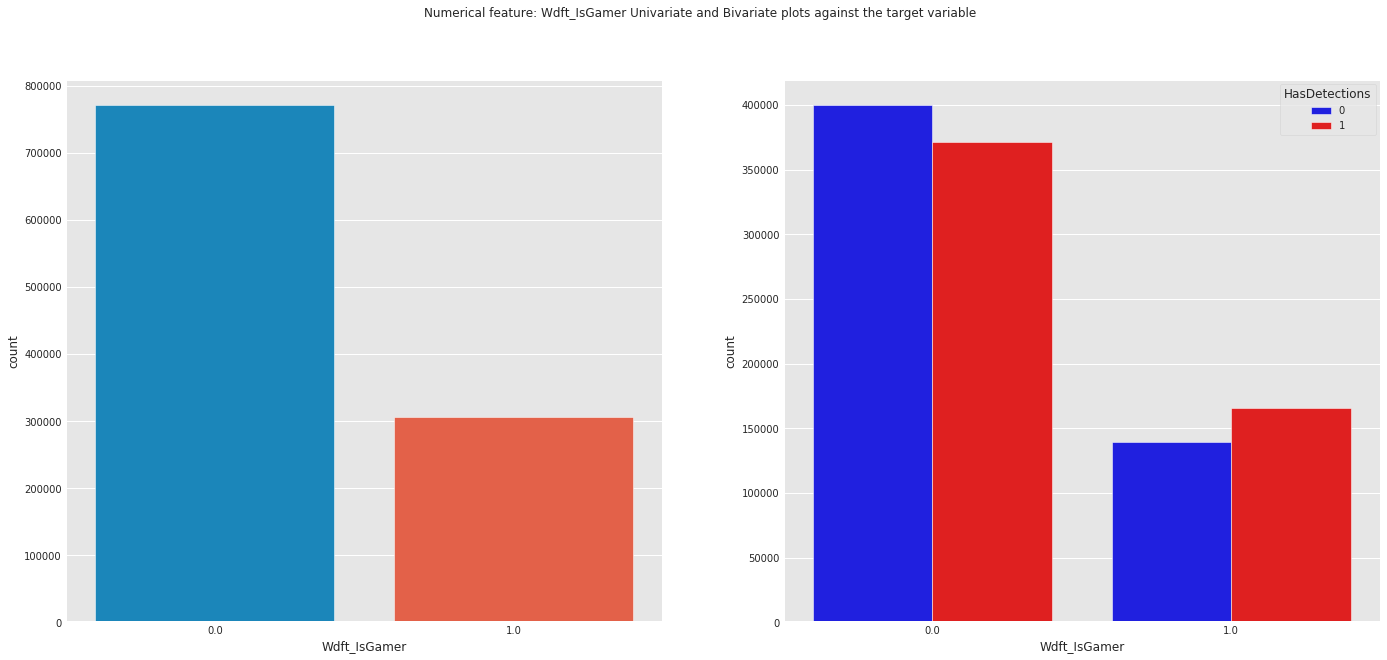

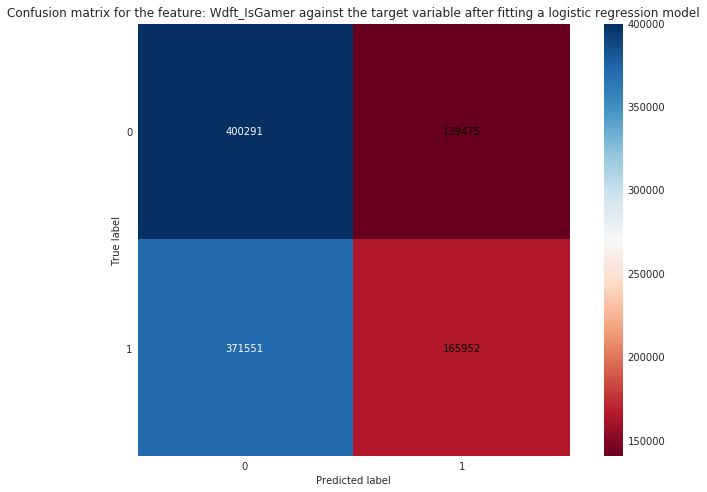

In [99]:
numerical_univariate_and_bivariate_plot("Wdft_IsGamer")
logistic_fit("Wdft_IsGamer")

Top 10 Values counts for the numerical feature Wdft_RegionIdentifier
10.0    224691
11.0    168866
3.0     162359
1.0     153645
15.0    127334
7.0      74298
8.0      34715
13.0     28061
5.0      25659
12.0     20455
Name: Wdft_RegionIdentifier, dtype: int64
Min value 1.0
Max value 15.0
NaN values 37916
Number of unique values 15
Mean value nan
Variance value 0.0

Fitting a logistic regression model for the feature Wdft_RegionIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.58      0.54    539766
           1       0.51      0.43      0.47    537503

   micro avg       0.51      0.51      0.51   1077269
   macro avg       0.51      0.51      0.50   1077269
weighted avg       0.51      0.51      0.50   1077269


accuracy score: 0.5054141537536121
F1 score: 0.5054141537536121


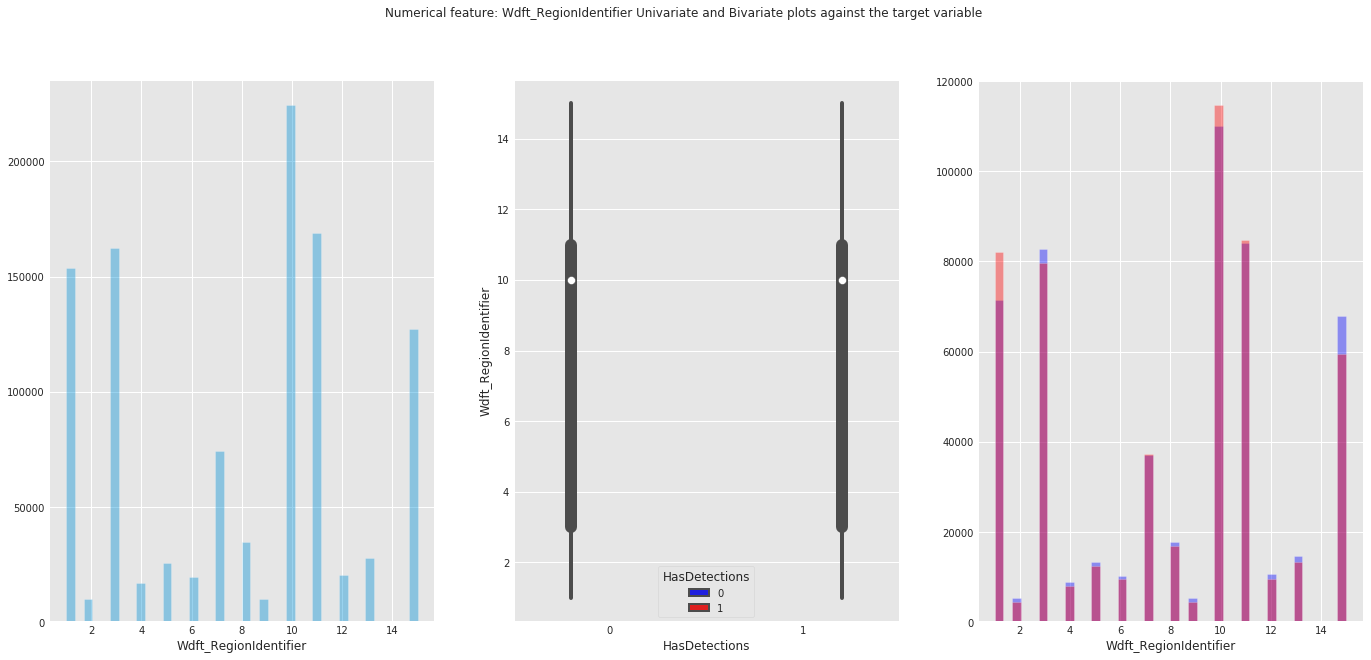

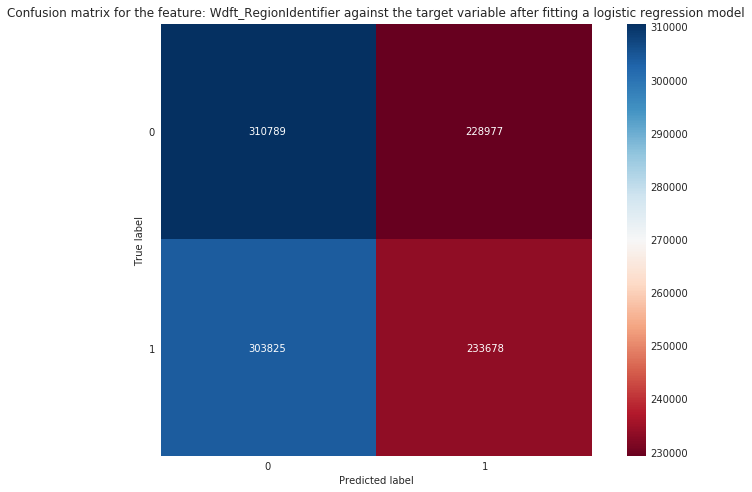

In [100]:
numerical_univariate_and_bivariate_plot("Wdft_RegionIdentifier")
logistic_fit("Wdft_RegionIdentifier")

In [101]:
gc.collect()

16120

### Correlations in Numerical Features
Trying to find corellations between numerical features

elapsed time: 37.54195857048035 seconds


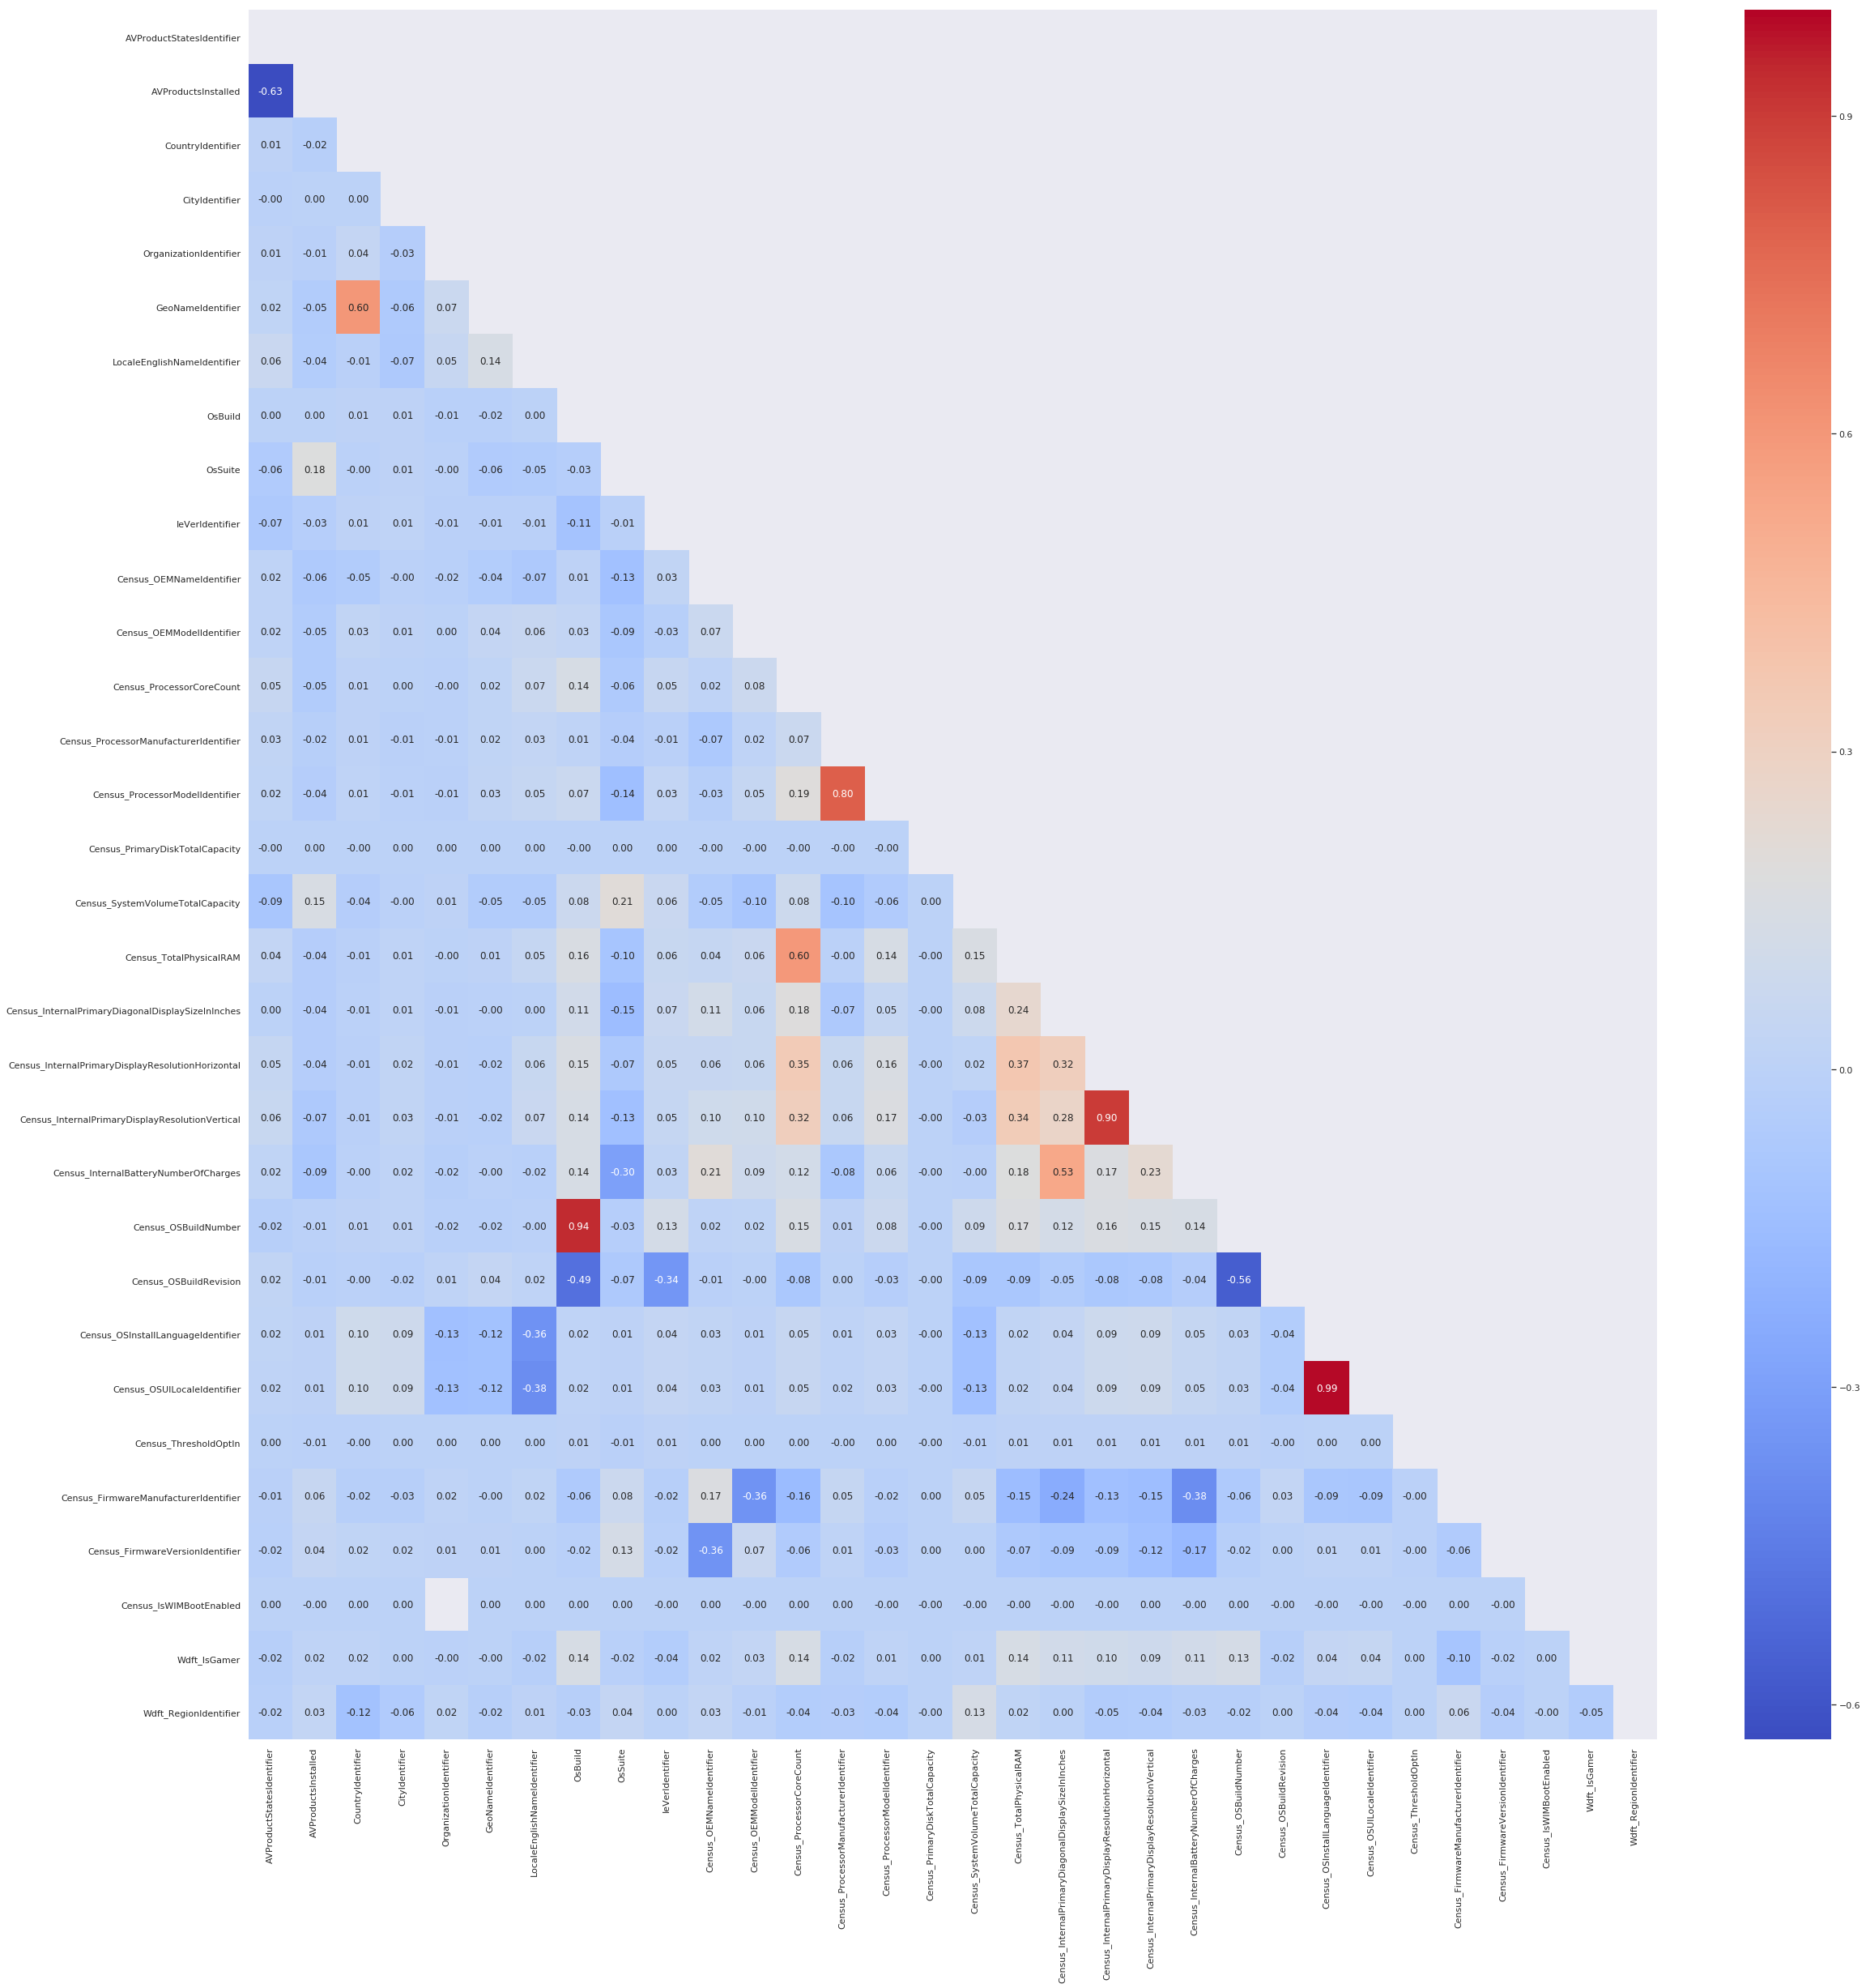

In [102]:
start_time = time.time()

sns.set(rc={'figure.figsize':(34.7,39.27)})

# Compute the correlation matrix
corr = train[numerical_and_binary_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')

print("elapsed time:", time.time() - start_time, "seconds")

Data correlation is the way in which one set of data may correspond to another set. In ML, think of how your features correspond with your output.

### Most correlated features

In [103]:
s = corr.unstack().drop_duplicates()
so = s.sort_values(kind="quicksort")

print("Top most highly megative correlated features:")
print(so[(so<-0.4)])
print()

print("Top most highly positive correlated features:")
print(so[(so<1) & (so>0.5)].sort_values(ascending=False))

Top most highly megative correlated features:
AVProductStatesIdentifier  AVProductsInstalled      -0.632899
Census_OSBuildNumber       Census_OSBuildRevision   -0.564208
OsBuild                    Census_OSBuildRevision   -0.493248
dtype: float64

Top most highly positive correlated features:
Census_OSInstallLanguageIdentifier                 Census_OSUILocaleIdentifier                        0.988468
OsBuild                                            Census_OSBuildNumber                               0.937893
Census_InternalPrimaryDisplayResolutionHorizontal  Census_InternalPrimaryDisplayResolutionVertical    0.901547
Census_ProcessorManufacturerIdentifier             Census_ProcessorModelIdentifier                    0.798425
CountryIdentifier                                  GeoNameIdentifier                                  0.598511
Census_ProcessorCoreCount                          Census_TotalPhysicalRAM                            0.597854
Census_InternalPrimaryDiagonalDisplaySiz

### Delete Variables

In [104]:
del corr
del mask
del s
del so
gc.collect()

23511

### Multivariate - Trivariate Analysis between highly correlated features and against the target variable; "HasDetections".
#### Inspecting the relationship between highly correlated features. Moreover trying to fit a logistic regression model between the target variable and the inspected features to identify if the features are good predictors.

In [105]:
%%time
def multivariate_plot(feature1, feature2):
    
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    
    # check if one of the two features exists in train_sample columns
    if (feature1 not in train_sample.columns) | (feature2 not in train_sample.columns):
        if (feature1 not in train_sample.columns):
            print(feature1, "has been removed due to high NA rate or highly unbalanced values")
        elif (feature2 not in train_sample.columns):
            print(feature2, "has been removed due to high NA rate or higlhy unbalanced values")
        print()
            
    else:
        # Due to overflow error I have to convert some columns into a bigger data type
        if (feature1 == "LocaleEnglishNameIdentifier") & (feature2 == "Census_OSUILocaleIdentifier"):
            g1 = sns.jointplot(x=train_sample["LocaleEnglishNameIdentifier"].astype('int16'), y=train_sample["Census_OSUILocaleIdentifier"], height=9, data = train)
            
            plt.title('Scatterplot Between: '+feature1+" and "+feature2, y=1.3, fontsize = 16)
            
        elif (feature1 == "LocaleEnglishNameIdentifier") & (feature2 == "Census_OSInstallLanguageIdentifier"):
            g1 = sns.jointplot(x=train_sample["LocaleEnglishNameIdentifier"].astype('float16'), y=train_sample["Census_OSInstallLanguageIdentifier"], height=9, data = train)
            
            plt.title('Scatterplot Between: '+feature1+" and "+feature2, y=1.3, fontsize = 16)
        else:    
            g1 = sns.jointplot(x=feature1, y=feature2, data = train_sample, height=9)
            
            plt.title('Scatterplot Between: '+feature1+" and "+feature2, y=1.3, fontsize = 16)

        g2 = sns.lmplot(x=feature1, y=feature2, hue="HasDetections", n_boot=1, data = train_sample, height=9, markers=["o", "x"], palette=["b", "r"])

        plt.title('Scatterplot Between: '+feature1+" and "+feature2+" against the target variable: 'HasDetections'", y=1.1, fontsize = 16)
        
        
        # fitting a logistic regression model with the 2 features
        
        # test if there is a logistic relationship between the feature1 and the target.
        
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import precision_score
        from sklearn.metrics import recall_score
        from sklearn.metrics import f1_score
        from sklearn.metrics import r2_score
        
        from sklearn.linear_model import LogisticRegression
        
        print()
        print("Fitting a logistic regression model for the features", feature1,"and",feature2,"against the target variable")
        
        mask = ~train_sample[feature1].isnull() & ~train_sample[feature2].isnull() & ~train_sample["HasDetections"].isnull()

        logmodel = LogisticRegression()
        
        logmodel.fit(train_sample[[feature1, feature2]][mask].values, train_sample["HasDetections"][mask])
        predictions = logmodel.predict(train_sample[[feature1, feature2]][mask].values)

        from sklearn.metrics import classification_report
        print(classification_report(train_sample["HasDetections"][mask], predictions))
        print("")
        print("accuracy score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        print("F1 score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        #print("R^2 score:", r2_score(train_sample["HasDetections"][mask], predictions))

        import scikitplot as skplt
        skplt.metrics.plot_confusion_matrix(train_sample["HasDetections"][mask], predictions, normalize=False,
                                            title = "Confusion matrix for two features: "+feature1+" and "+feature2+" against the target variable after fitting a logistic regression model",
                                           figsize=(10,8), text_fontsize='large', cmap="RdBu")
        
        
        #### my mistake, how can I fit a linear model for binary classification, I have to use here logistic regression as before :D
        
        # old code in comments
        '''
        ### test if a linear model will fit the 2 correlated feature against the target variable
        # my thanks to: https://www.datasciencecentral.com/profiles/blogs/linear-regression-in-python-use-of-numpy-scipy-and-statsmodels
        # this link helped me a lot https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
        
        
        # test if there is a linear relationship between the feature1 and the target.
        from scipy import stats
        mask = ~np.isnan(train_sample[feature1]) & ~np.isnan(train_sample["HasDetections"])
        slope, intercept, r_value, p_value, std_err = stats.linregress(train_sample[feature1][mask], train_sample["HasDetections"][mask])

        sign='+'
        if slope<0:
            sign = ''
        
        lm_1 = "linear regression function #1: y = "+str(np.round(intercept,5))+" "+sign +" "+str(np.round(slope,5))+" * "+feature1
        lm_1 = lm_1+"\n"+" p-value: "+str(p_value)+"\n"+" R^2: "+str(r_value)
        #print(lm_1)
        #print(feature1, "p-value",p_value)
        #print("R^2:", r_value)

        #print()

        # test if there is a linear relationship between the feature2 and the target.
        mask = ~np.isnan(train_sample[feature2]) & ~np.isnan(train_sample["HasDetections"])
        slope, intercept, r_value, p_value, std_err = stats.linregress(train_sample[feature2][mask], train_sample["HasDetections"][mask])

        sign='+'
        if slope<0:
            sign=''
        
        lm_2 = "linear regression function #2: y = "+str(np.round(intercept,5))+" "+sign +" "+str(np.round(slope,5))+" * "+feature2
        lm_2 = lm_2+"\n"+" p-value: "+str(p_value)+"\n"+" R^2: "+str(r_value)
        #print(lm_2)
        #print(feature2, "p-value",p_value)
        #print("R^2:", 100* r_value)
        
        plt.figure(figsize=(8, 9))
        ax = plt.subplot(121)
    
        # plotting text with matplotlib:
        # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html
        plt.text(0.5, 0.9, lm_1, size=15, ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
        
        
        plt.text(0.5, 0.6, lm_2, size=15, ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

        plt.axis('off')
        plt.show()
        '''

    

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 39.8 µs


In [106]:
%%time
multivariate_plot("RtpStateBitfield", "IsSxsPassiveMode")
gc.collect()

RtpStateBitfield has been removed due to high NA rate or highly unbalanced values

CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 104 ms



Fitting a logistic regression model for the features AVProductStatesIdentifier and AVProductsInstalled against the target variable
              precision    recall  f1-score   support

           0       0.61      0.38      0.47    555291
           1       0.55      0.76      0.64    555415

   micro avg       0.57      0.57      0.57   1110706
   macro avg       0.58      0.57      0.55   1110706
weighted avg       0.58      0.57      0.55   1110706


accuracy score: 0.5675579316218693
F1 score: 0.5675579316218693
CPU times: user 16.4 s, sys: 1.94 s, total: 18.4 s
Wall time: 15.6 s


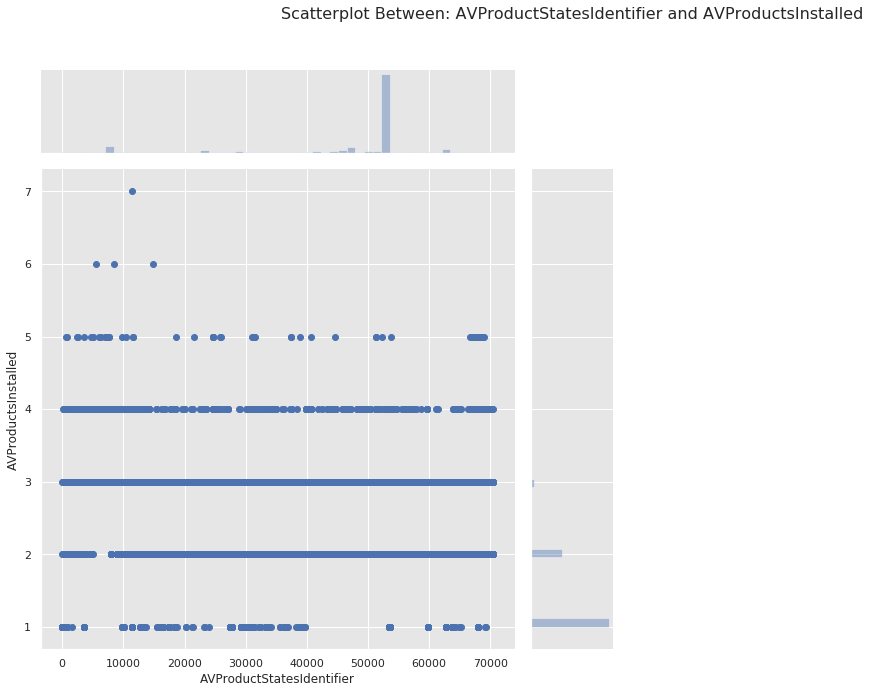

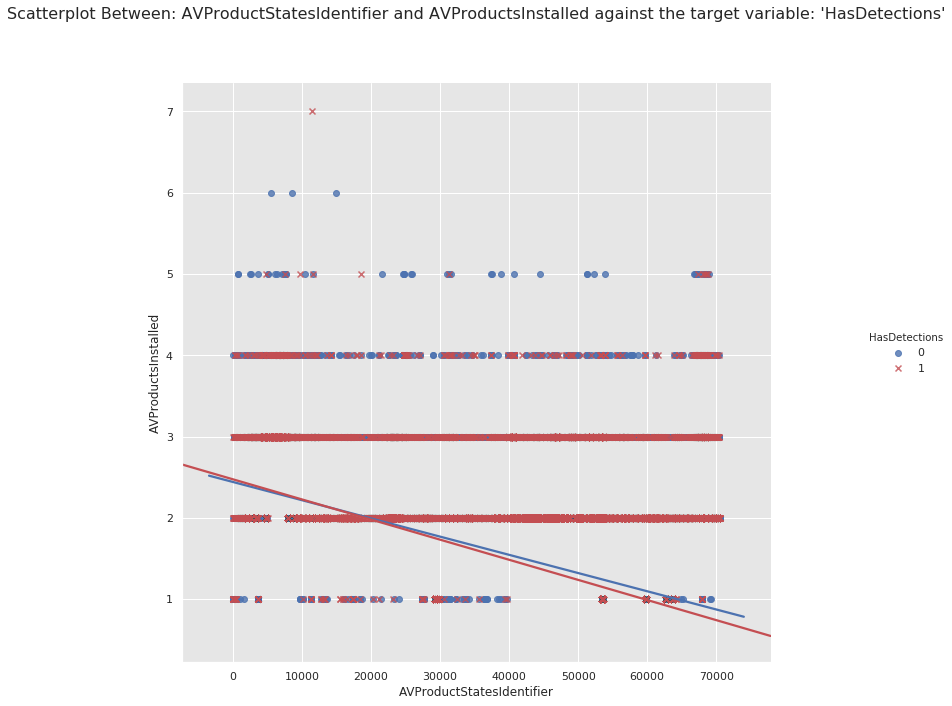

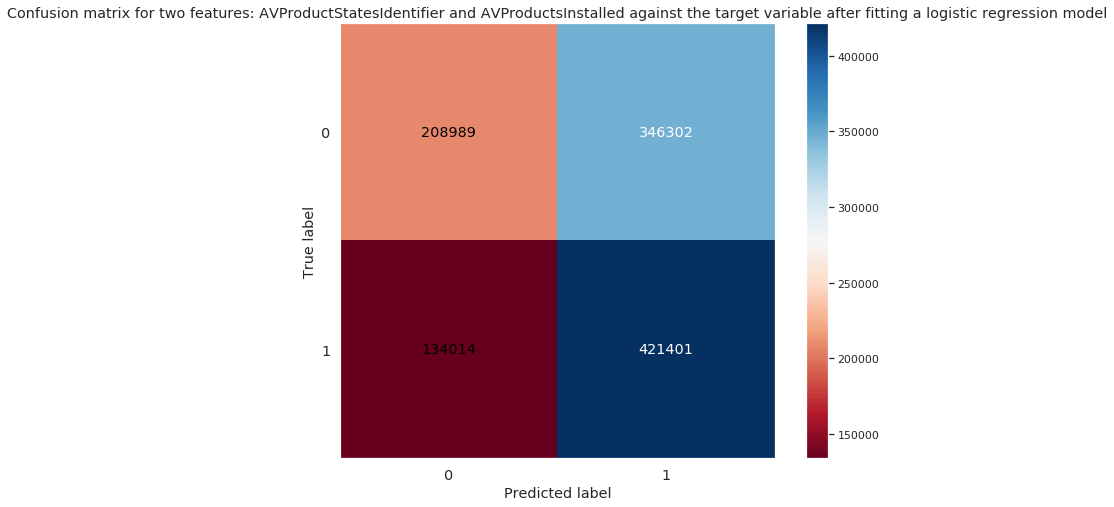

In [107]:
%%time
multivariate_plot("AVProductStatesIdentifier", "AVProductsInstalled")
gc.collect()


Fitting a logistic regression model for the features Census_OSBuildNumber and Census_OSBuildRevision against the target variable
              precision    recall  f1-score   support

           0       0.53      0.29      0.37    558014
           1       0.51      0.74      0.60    557171

   micro avg       0.51      0.51      0.51   1115185
   macro avg       0.52      0.51      0.49   1115185
weighted avg       0.52      0.51      0.49   1115185


accuracy score: 0.5144025430758126
F1 score: 0.5144025430758126
CPU times: user 20.2 s, sys: 2.06 s, total: 22.3 s
Wall time: 19.4 s


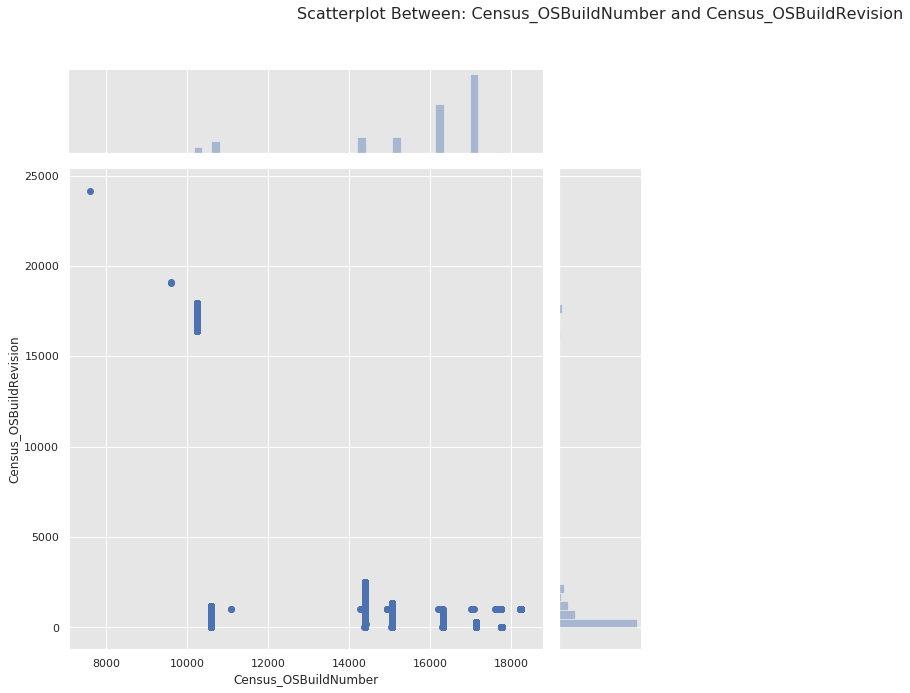

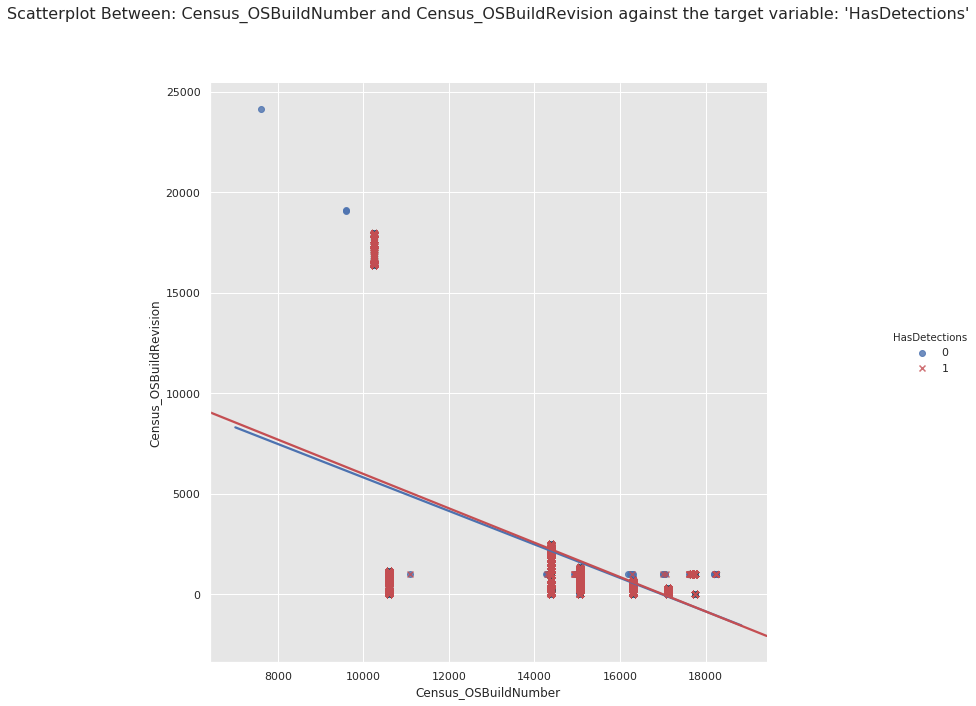

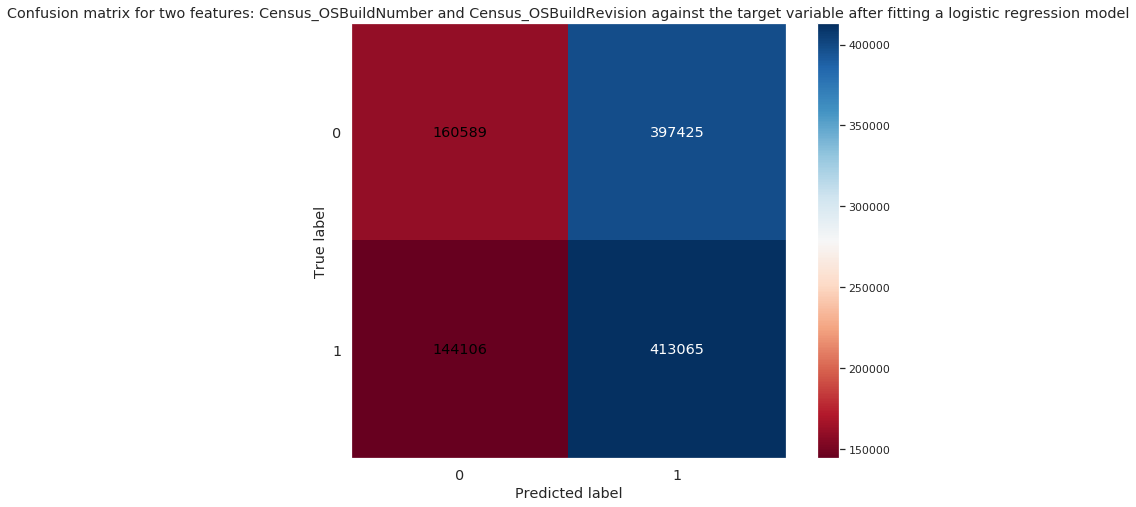

In [108]:
%%time
multivariate_plot("Census_OSBuildNumber", "Census_OSBuildRevision")
gc.collect()


Fitting a logistic regression model for the features OsBuild and Census_OSBuildRevision against the target variable
              precision    recall  f1-score   support

           0       0.52      0.18      0.27    558014
           1       0.50      0.83      0.63    557171

   micro avg       0.51      0.51      0.51   1115185
   macro avg       0.51      0.51      0.45   1115185
weighted avg       0.51      0.51      0.45   1115185


accuracy score: 0.5080914825791236
F1 score: 0.5080914825791236
CPU times: user 19.4 s, sys: 2.2 s, total: 21.6 s
Wall time: 18.6 s


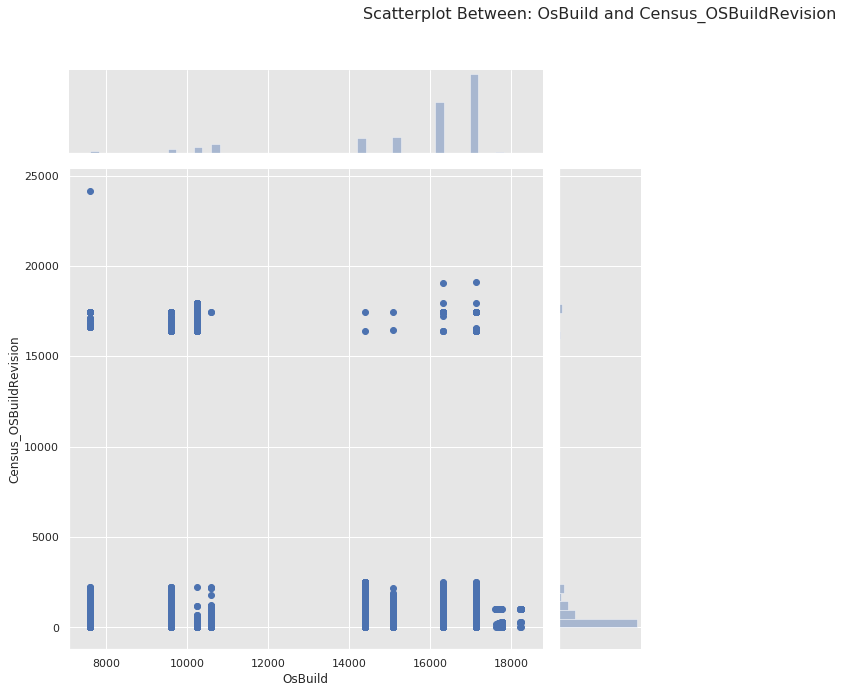

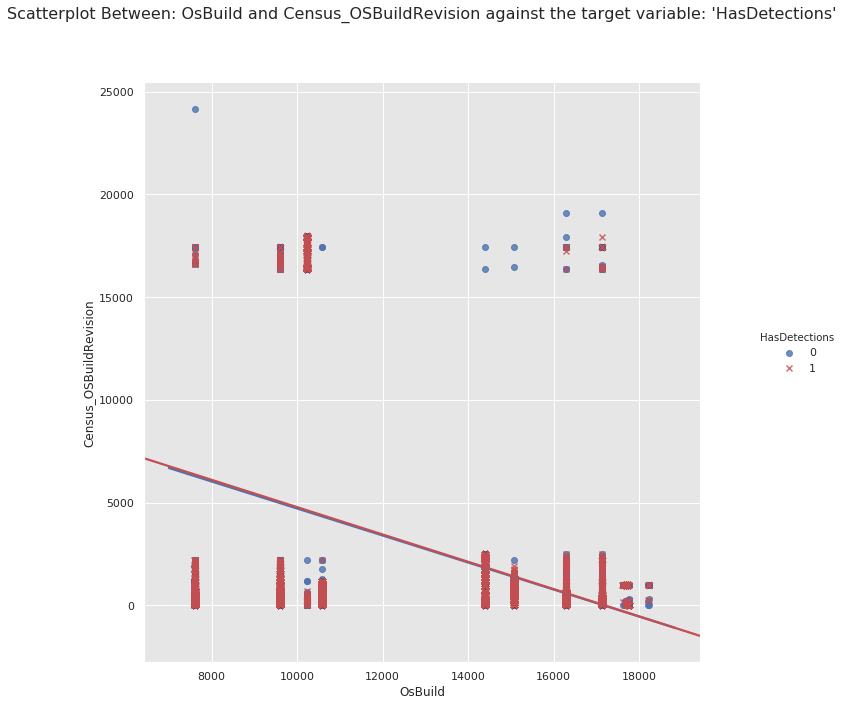

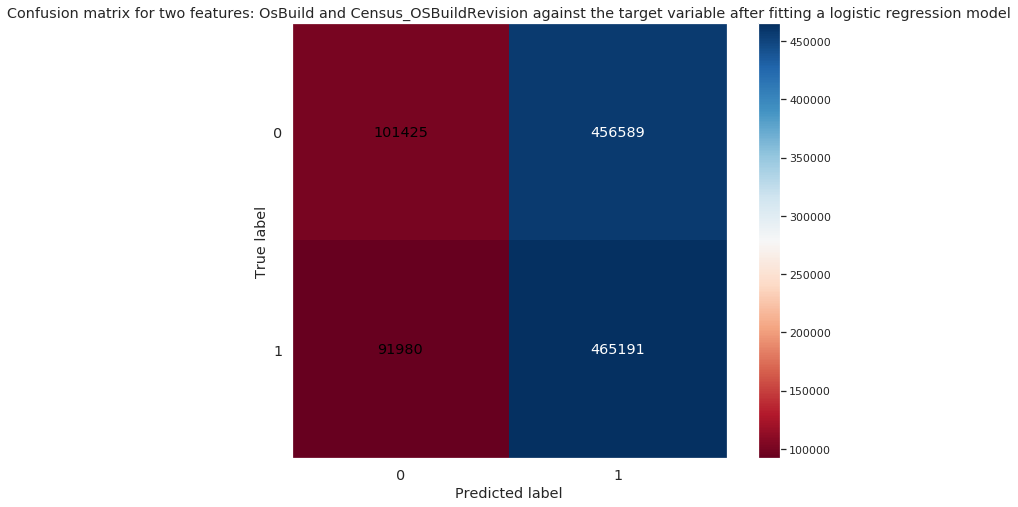

In [109]:
%%time
multivariate_plot("OsBuild", "Census_OSBuildRevision")
gc.collect()

In [110]:
%%time
multivariate_plot("HasTpm", "IeVerIdentifier")
gc.collect()

HasTpm has been removed due to high NA rate or highly unbalanced values

CPU times: user 172 ms, sys: 60 ms, total: 232 ms
Wall time: 120 ms



Fitting a logistic regression model for the features LocaleEnglishNameIdentifier and Census_OSUILocaleIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.62      0.56    558014
           1       0.51      0.39      0.44    557171

   micro avg       0.51      0.51      0.51   1115185
   macro avg       0.51      0.51      0.50   1115185
weighted avg       0.51      0.51      0.50   1115185


accuracy score: 0.5068513296000215
F1 score: 0.5068513296000215
CPU times: user 17.1 s, sys: 2.09 s, total: 19.2 s
Wall time: 16.3 s


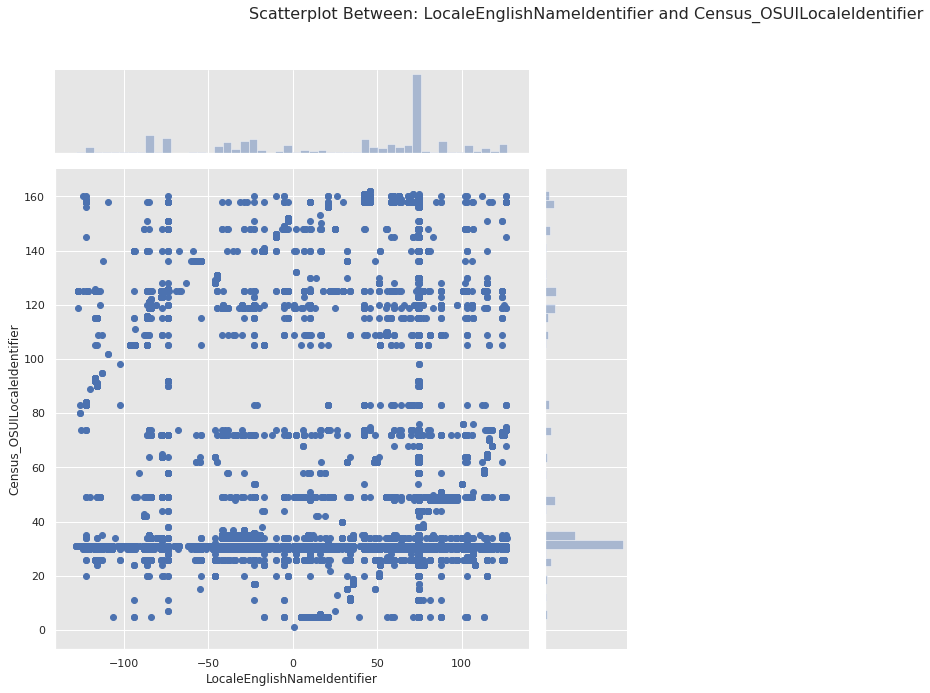

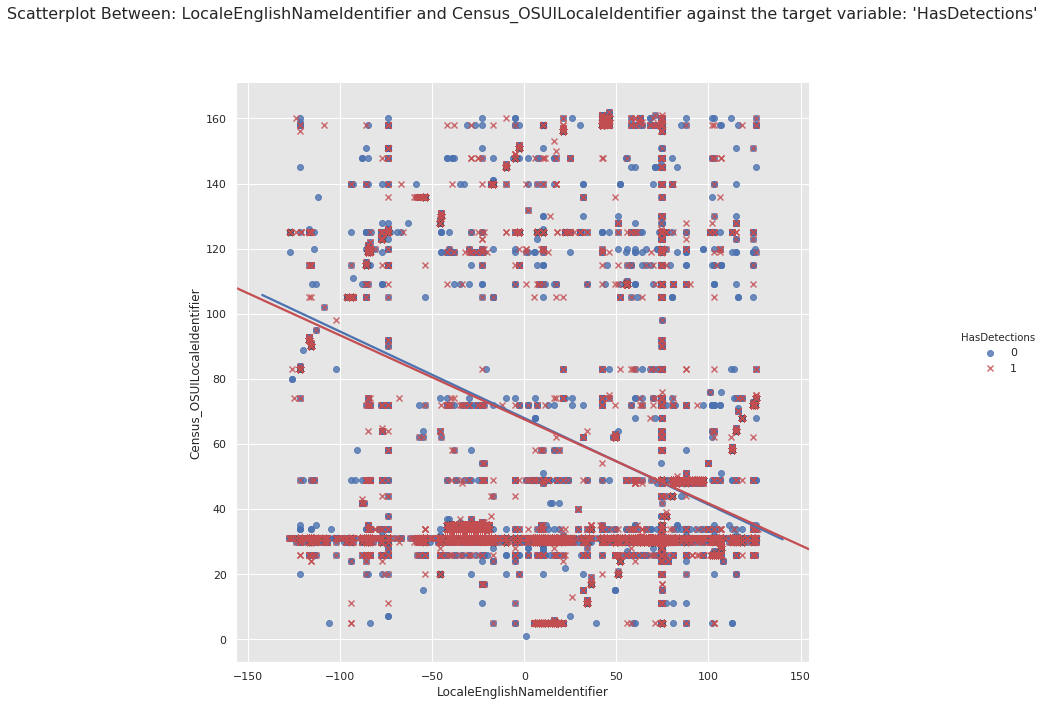

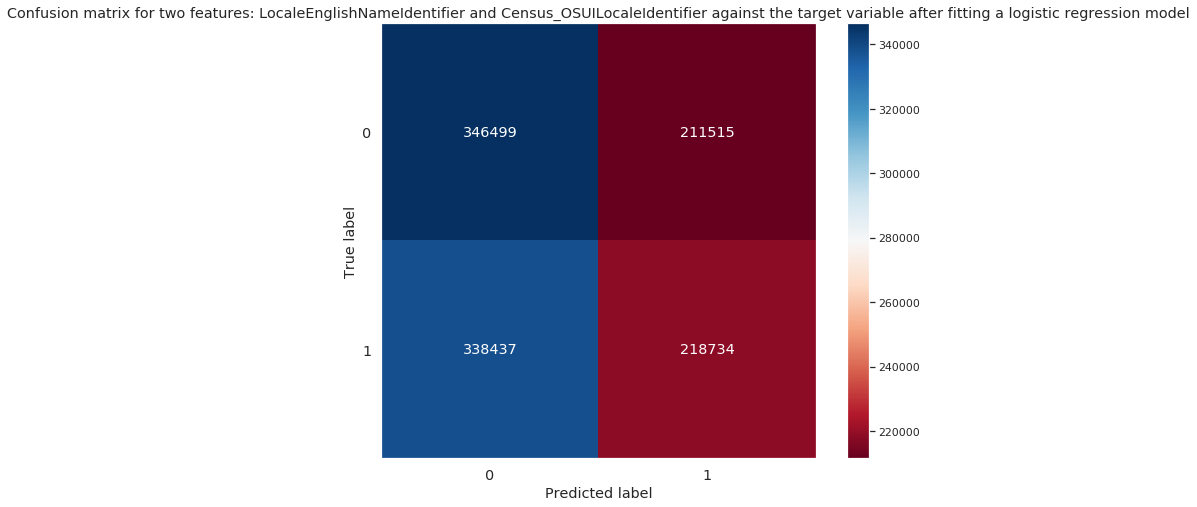

In [111]:
%%time
multivariate_plot("LocaleEnglishNameIdentifier", "Census_OSUILocaleIdentifier")
gc.collect()


Fitting a logistic regression model for the features Census_InternalBatteryNumberOfCharges and Census_FirmwareManufacturerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.50      0.59      0.54    532434
           1       0.50      0.42      0.46    533208

   micro avg       0.50      0.50      0.50   1065642
   macro avg       0.50      0.50      0.50   1065642
weighted avg       0.50      0.50      0.50   1065642


accuracy score: 0.5022671779077776
F1 score: 0.5022671779077776
CPU times: user 12.6 s, sys: 2.04 s, total: 14.7 s
Wall time: 12 s


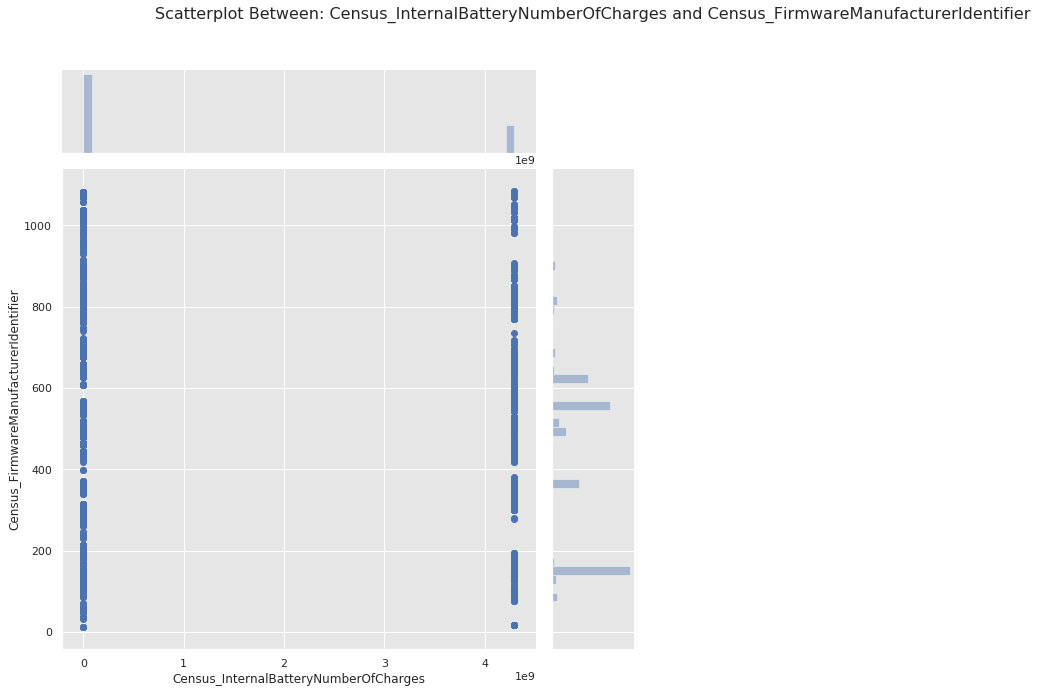

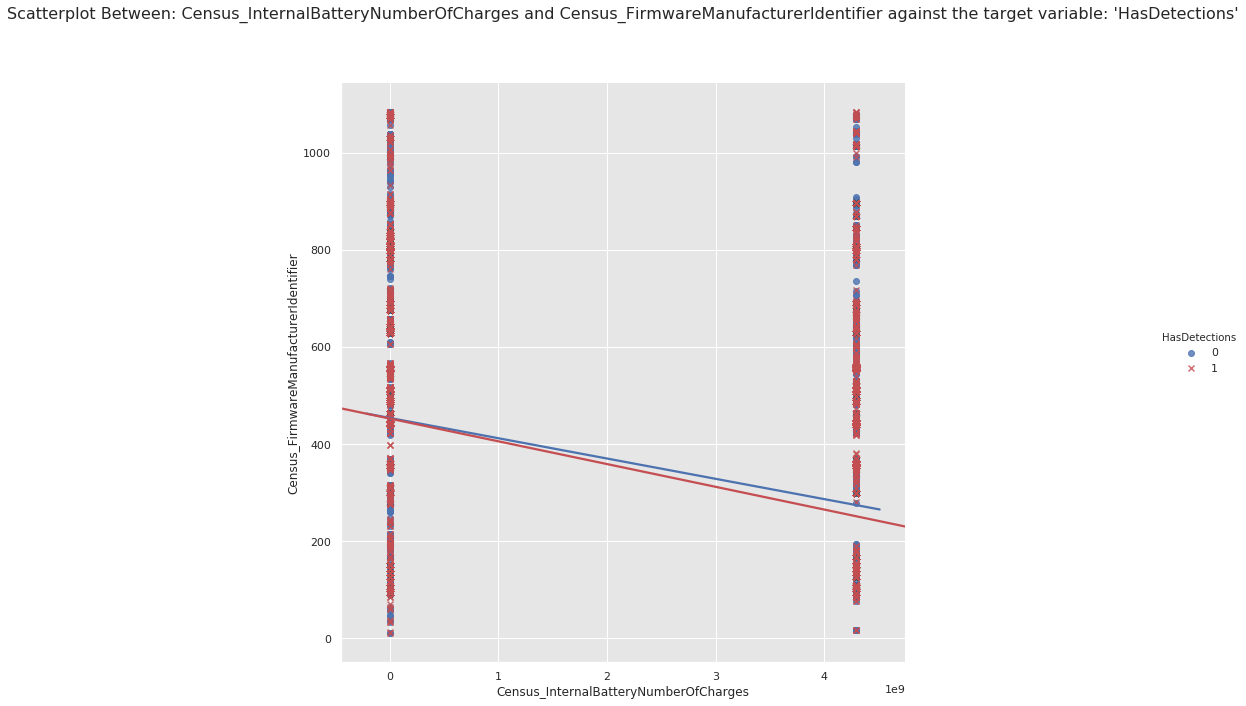

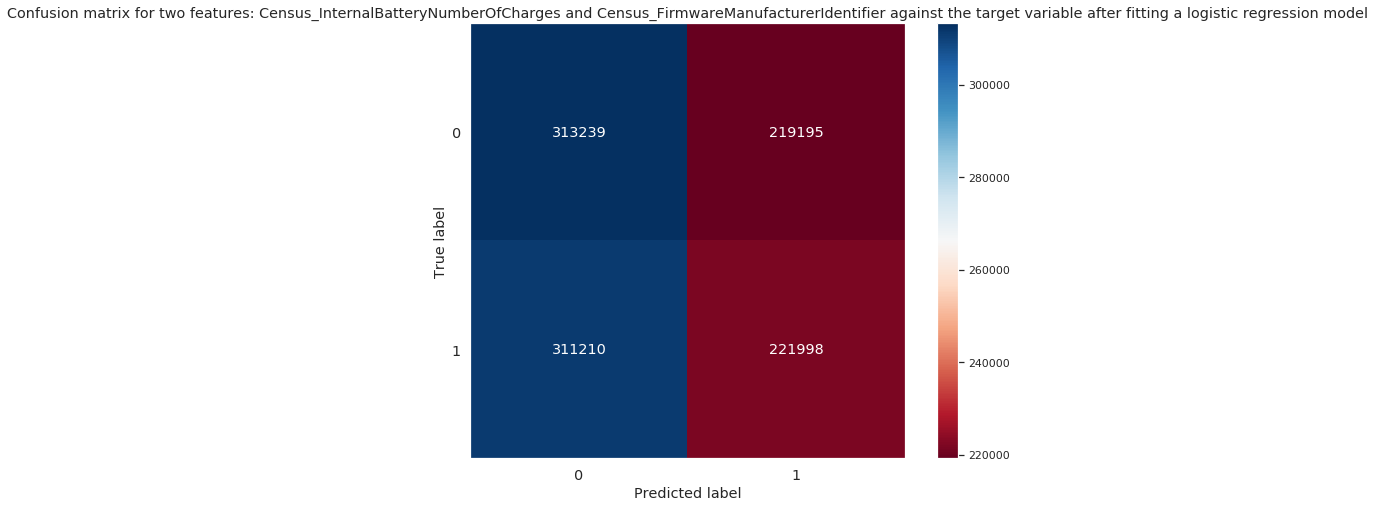

In [112]:
%%time
multivariate_plot("Census_InternalBatteryNumberOfCharges", "Census_FirmwareManufacturerIdentifier")
gc.collect()


Fitting a logistic regression model for the features LocaleEnglishNameIdentifier and Census_OSInstallLanguageIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.62      0.56    554378
           1       0.51      0.39      0.44    553425

   micro avg       0.51      0.51      0.51   1107803
   macro avg       0.51      0.51      0.50   1107803
weighted avg       0.51      0.51      0.50   1107803


accuracy score: 0.5068680983893346
F1 score: 0.5068680983893346
CPU times: user 16.1 s, sys: 2.16 s, total: 18.2 s
Wall time: 15.4 s


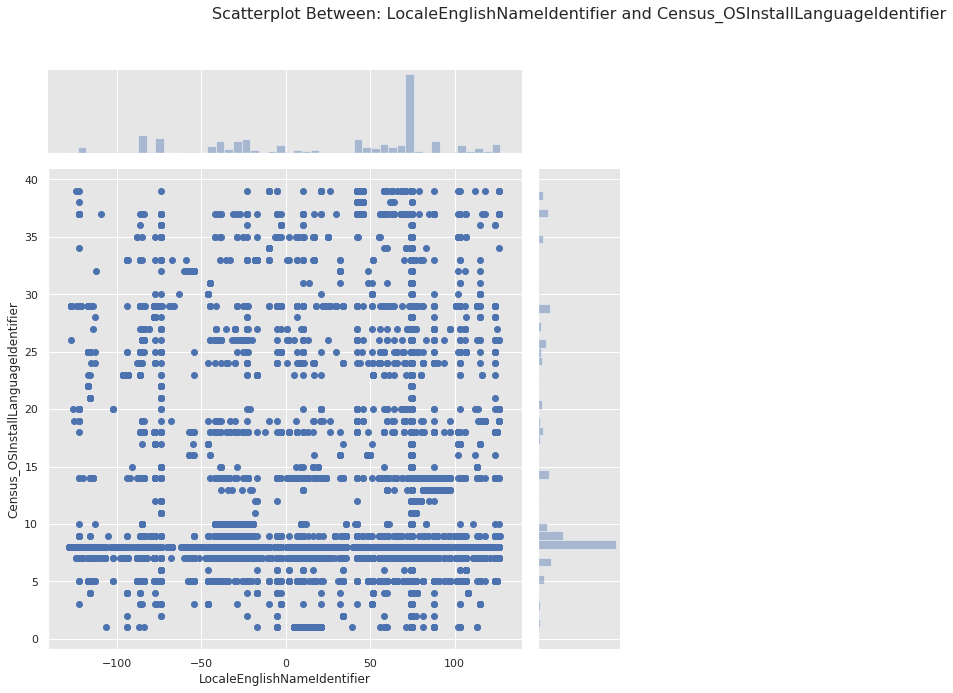

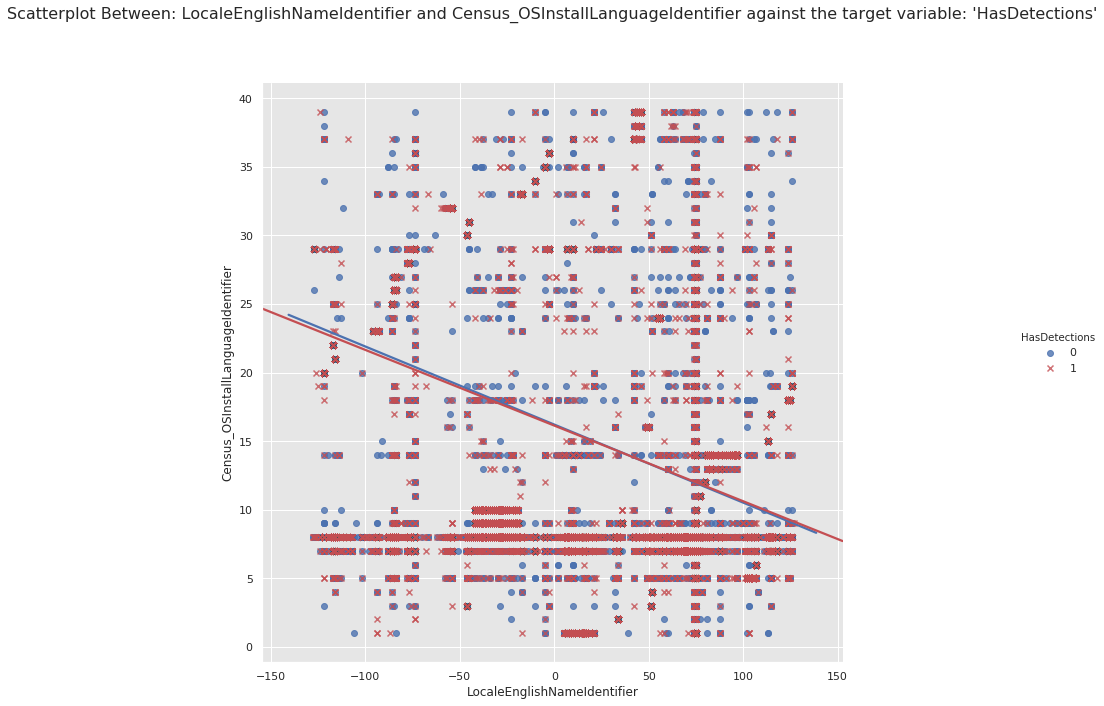

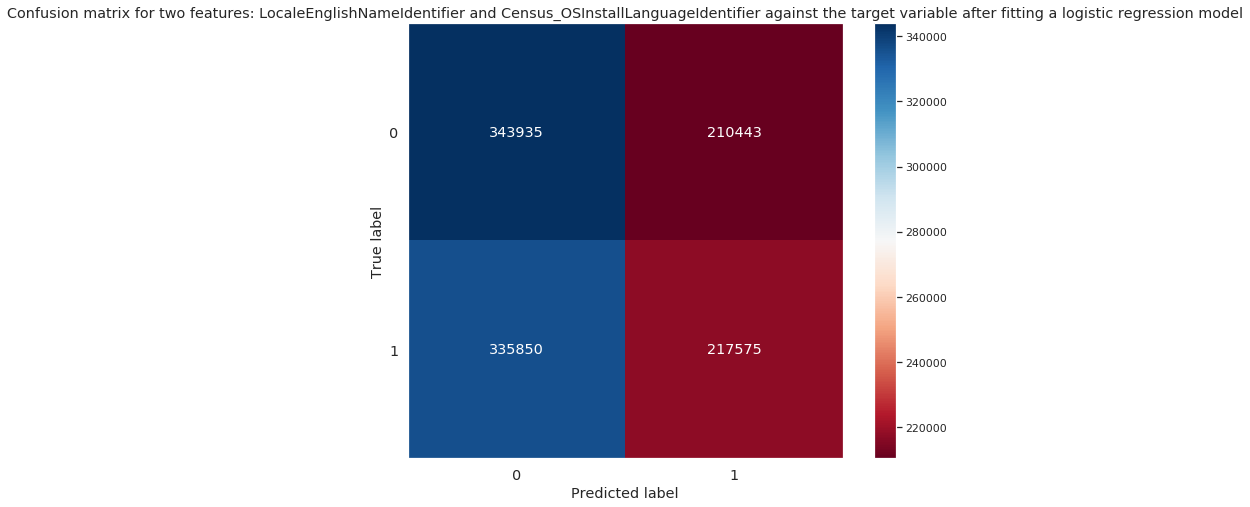

In [113]:
%%time
multivariate_plot("LocaleEnglishNameIdentifier", "Census_OSInstallLanguageIdentifier")
gc.collect()


Fitting a logistic regression model for the features Census_OEMModelIdentifier and Census_FirmwareManufacturerIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.54      0.52    541444
           1       0.51      0.48      0.50    544482

   micro avg       0.51      0.51      0.51   1085926
   macro avg       0.51      0.51      0.51   1085926
weighted avg       0.51      0.51      0.51   1085926


accuracy score: 0.5106655517963471
F1 score: 0.5106655517963471
CPU times: user 15.3 s, sys: 2 s, total: 17.3 s
Wall time: 14.5 s


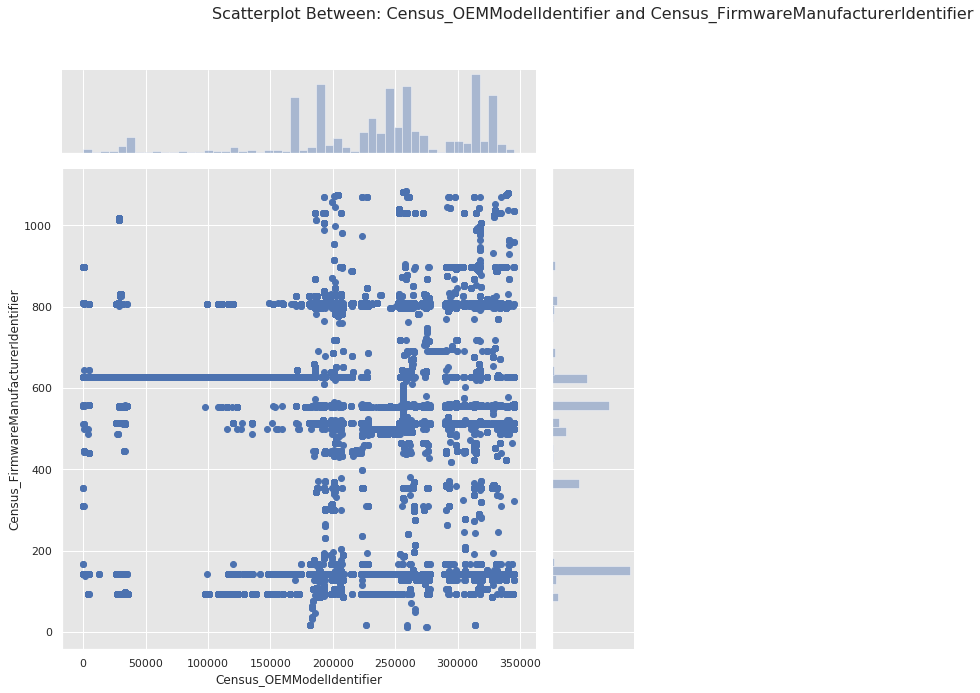

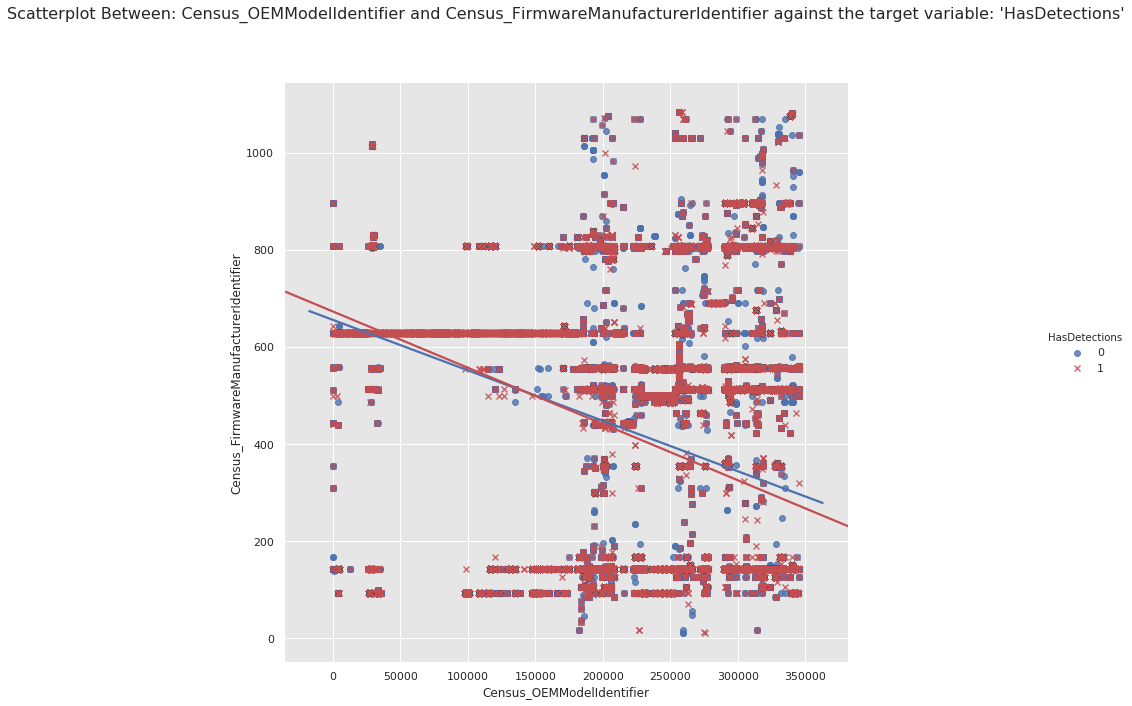

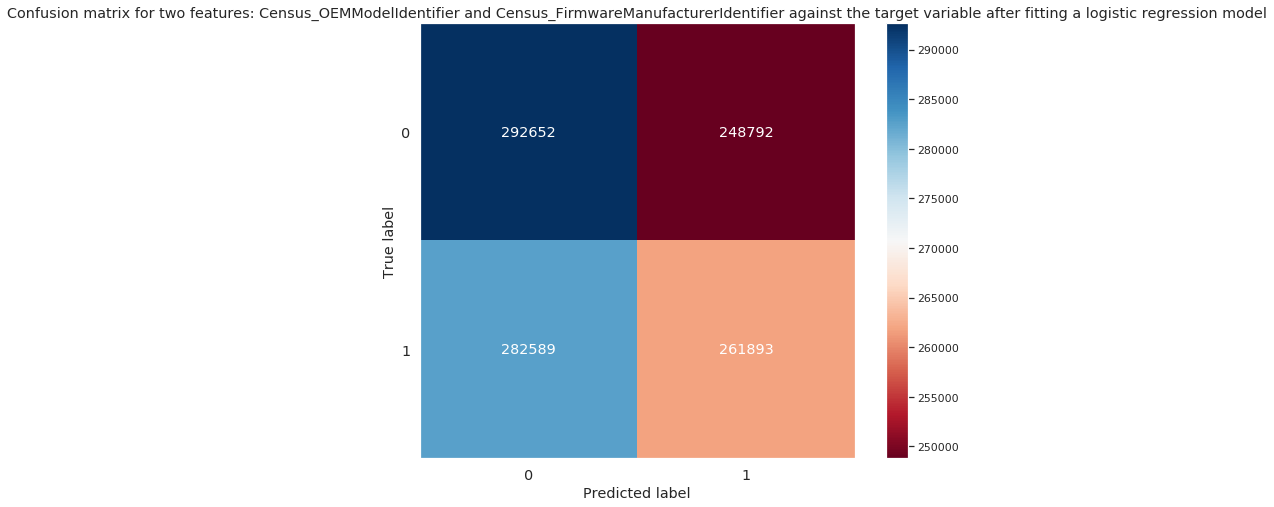

In [114]:
%%time
multivariate_plot("Census_OEMModelIdentifier", "Census_FirmwareManufacturerIdentifier")
gc.collect()


Fitting a logistic regression model for the features Census_OEMNameIdentifier and Census_FirmwareVersionIdentifier against the target variable
              precision    recall  f1-score   support

           0       0.51      0.31      0.39    543683
           1       0.50      0.70      0.59    546028

   micro avg       0.51      0.51      0.51   1089711
   macro avg       0.51      0.51      0.49   1089711
weighted avg       0.51      0.51      0.49   1089711


accuracy score: 0.5055138472494083
F1 score: 0.5055138472494083
CPU times: user 18.5 s, sys: 2.17 s, total: 20.7 s
Wall time: 17.8 s


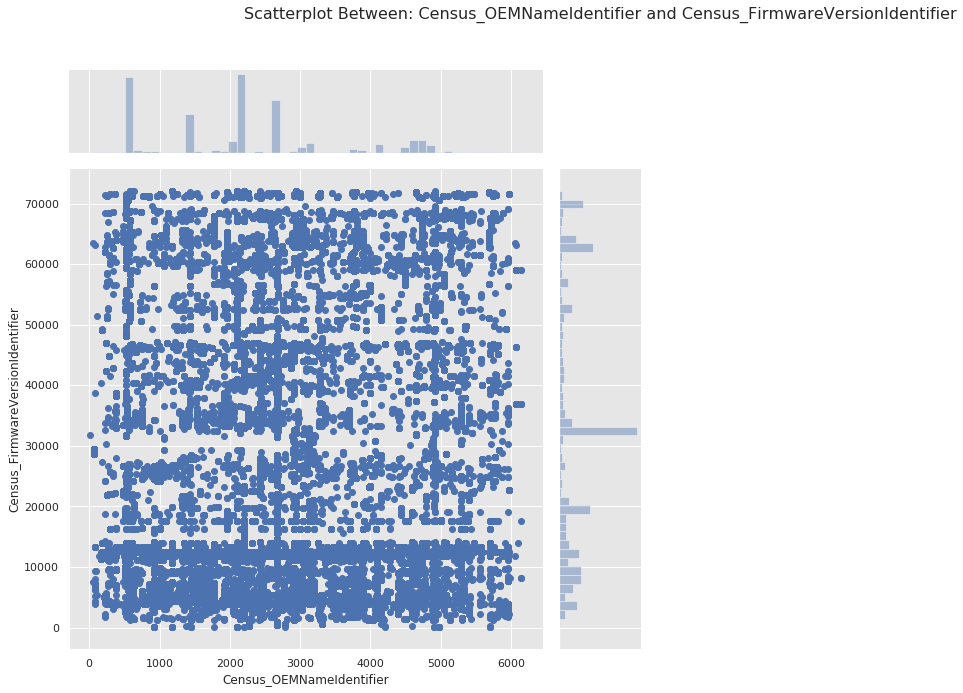

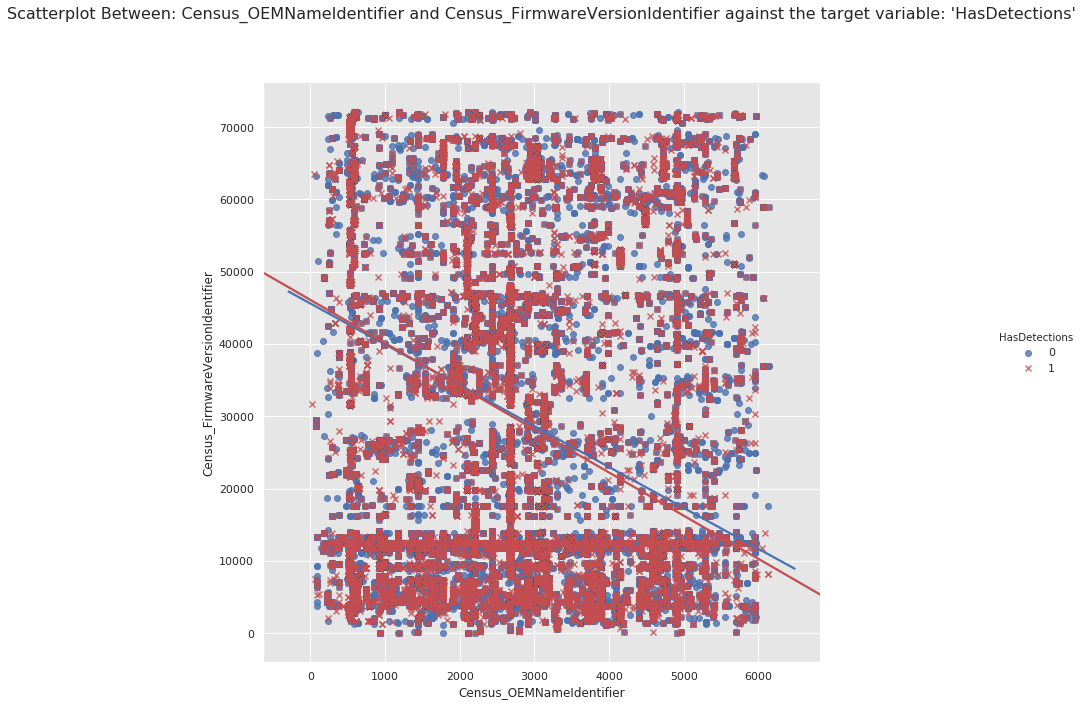

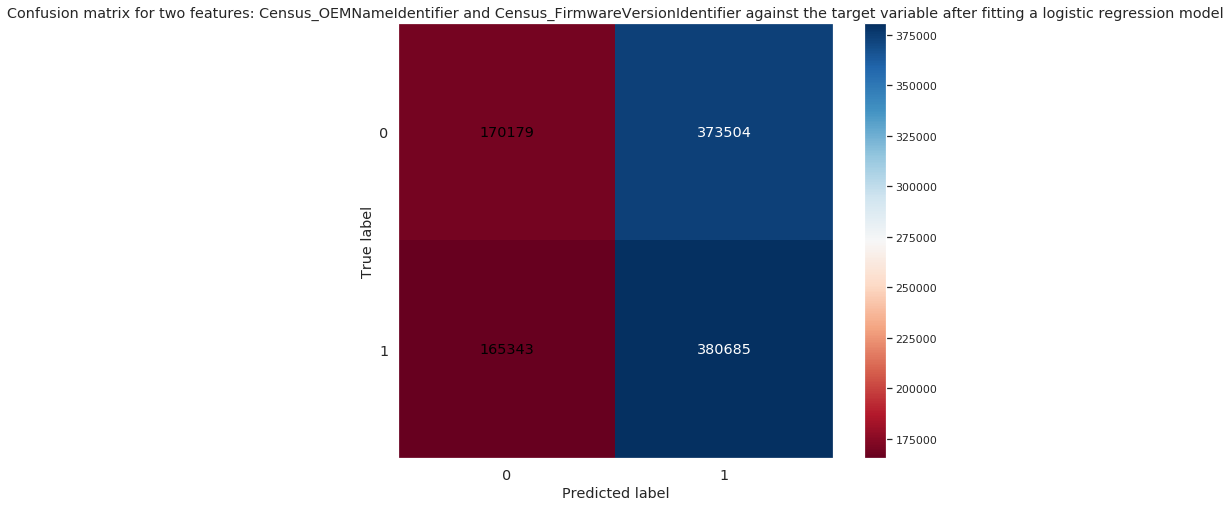

In [115]:
%%time
multivariate_plot("Census_OEMNameIdentifier", "Census_FirmwareVersionIdentifier")
gc.collect()

<a id="ML"></a>
## Machine Learning modeling

![](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)

As we saw, linear relationships are really weak, thus Classification Trees will find patterns of relations between the target variable with the features.

### Delete Train set, to free up memory space.

In [116]:
del train
gc.collect()

17532

### Reading the test data

In [117]:
test_dtypes = {k: v for k, v in dtypes.items() if k in good_cols}

# get all columns except
test = pd.read_csv('../input/test.csv', dtype=test_dtypes, usecols=good_cols[:-1])

#test = reduce_mem_usage(test)

In [118]:
test.head()

MachineIdentifier          ...          Wdft_RegionIdentifier
0  0000010489e3af074adeac69c53e555e          ...                            7.0
1  00000176ac758d54827acd545b6315a5          ...                           12.0
2  0000019dcefc128c2d4387c1273dae1d          ...                           11.0
3  0000055553dc51b1295785415f1a224d          ...                           10.0
4  00000574cefffeca83ec8adf9285b2bf          ...                            3.0

[5 rows x 56 columns]

In [119]:
test.shape

(7853253, 56)

### Feature Engineering

In [120]:
#special thanks to https://www.kaggle.com/delayedkarma/let-s-add-some-new-features-lb-0-674

#train_sample['new_num_1'] = train_sample['Census_TotalPhysicalRAM'] * train_sample['Census_InternalPrimaryDiagonalDisplaySizeInInches']
#test['new_num_1'] = test['Census_TotalPhysicalRAM'] * test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

#train_sample['new_num_2'] = train_sample['Census_ProcessorCoreCount'] * train_sample['Census_InternalPrimaryDiagonalDisplaySizeInInches']
#test['new_num_2'] = test['Census_ProcessorCoreCount'] * test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

#train_sample['new_num_3'] = train_sample['Census_ProcessorCoreCount'] * train_sample['Census_TotalPhysicalRAM']
#test['new_num_3'] = test['Census_ProcessorCoreCount'] * test['Census_TotalPhysicalRAM']

#train_sample['new_num_4'] = train_sample['Census_PrimaryDiskTotalCapacity'] * train_sample['Census_TotalPhysicalRAM']
#test['new_num_4'] = test['Census_PrimaryDiskTotalCapacity'] * test['Census_TotalPhysicalRAM']

#train_sample['new_num_5'] = train_sample['Census_SystemVolumeTotalCapacity'] * train_sample['Census_InternalPrimaryDiagonalDisplaySizeInInches']
#test['new_num_5'] = test['Census_SystemVolumeTotalCapacity'] * test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

### Drop the unique "MachineIdentifier" Identifiers

In [121]:
train_sample = train_sample.drop(['MachineIdentifier'], axis=1)
test = test.drop(['MachineIdentifier'], axis=1)

In [122]:
train_sample = train_sample.reset_index(drop=True)

### Filling NA values with the statistical Mode

In [123]:
modes = train_sample.mode()

for col in train_sample.columns:
    train_sample[col] = np.where(train_sample[col].isnull(), modes[col], train_sample[col])

del modes

In [124]:
modes_test = test.mode()

for col in test.columns:
    test[col] = np.where(test[col].isnull(), modes_test[col], test[col])

#train_sample.shape
del modes_test

### Concatenate both train_sample and test sets before label encoding

In [125]:
train_shape = train_sample.shape
test_shape = test.shape

train_and_test = pd.concat([train_sample,test], axis="rows", sort=False)

del train_sample
del test
gc.collect()

140840

In [126]:
train_and_test.head()

EngineVersion      ...      HasDetections
0   1.1.15100.1      ...                1.0
1   1.1.15100.1      ...                0.0
2   1.1.15100.1      ...                0.0
3   1.1.15200.1      ...                1.0
4   1.1.15200.1      ...                1.0

[5 rows x 56 columns]

In [127]:
train_and_test.tail()

EngineVersion      ...      HasDetections
7853248   1.1.15400.5      ...                NaN
7853249   1.1.15400.5      ...                NaN
7853250   1.1.15400.5      ...                NaN
7853251   1.1.15400.4      ...                NaN
7853252   1.1.15400.5      ...                NaN

[5 rows x 56 columns]

### Encode the Categorical features before machine learning modeling

In [128]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns, train_and_test)

In [129]:
gc.collect()

14

### Auto Feature Engineering ** (requires a lot of memory.... :( ) **

In [130]:
#import featuretools as ft

# creating and entity set 'es'
#es = ft.EntitySet(id = 'es_id')

# adding a dataframe 
#es.entity_from_dataframe(entity_id = 'train_and_test_id', dataframe = train_and_test[numerical_columns[0:5]], index = 'id')

#feature_matrix, feature_names = ft.dfs(entityset=es, target_entity = 'train_and_test_id', chunk_size=.001, max_depth=2, verbose = 1, n_jobs = 3)

In [131]:
#feature_matrix.columns

In [132]:
#feature_matrix.head()

### Back to train and test set after Label Encoding

In [133]:
train_sample = train_and_test[0:train_shape[0]]
test = train_and_test[(train_shape[0]):(train_and_test.shape[0]+1)]

In [134]:
del train_and_test

### Remove the HasDetections columns from test set, it has been added during dataframe concatenation.

In [135]:
test = test.drop(["HasDetections"], axis = 1)

In [136]:
y = train_sample['HasDetections']
X = train_sample.drop(['HasDetections'], axis=1)

In [137]:
del train_sample
gc.collect()

0

### XGBoost Tuned model with 70 / 30 train-valid split

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time

# create a 70/30 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()

# special thanks to https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# these parameters have been found via xgboost tuning, you can see my tries in the commented tuning python snippets below:
# unfortunately it takes so much time to tune and to produce the final optimal classifier due to 9h time limit in Kaggle kernels.
clf_xgb = xgb.XGBClassifier(learning_rate=0.05, 
                            n_estimators=2000, 
                            max_depth=8,
                            min_child_weight=7,
                            gamma=0,
                            subsample=0.9,
                            colsample_bytree=0.6,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.1,
                            reg_lambda = 1,
                            seed=42)

clf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(xvalid)

print()
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
predictions_probas = clf_xgb.predict_proba(xvalid)
print("roc-auc score for the class 1, from target 'HasDetections' ", roc_auc_score(yvalid, predictions_probas[:,1]))

print()
print("elapsed time in seconds: ", time.time() - start_time)

print()
gc.collect()

[0]	validation_0-auc:0.676485	validation_1-auc:0.675639
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.721065	validation_1-auc:0.710678
[200]	validation_0-auc:0.735391	validation_1-auc:0.717352
[300]	validation_0-auc:0.744391	validation_1-auc:0.720333
[400]	validation_0-auc:0.751347	validation_1-auc:0.721995
[500]	validation_0-auc:0.758039	validation_1-auc:0.72329
[600]	validation_0-auc:0.763476	validation_1-auc:0.723948
[700]	validation_0-auc:0.768614	validation_1-auc:0.724451
[800]	validation_0-auc:0.773566	validation_1-auc:0.724902
[900]	validation_0-auc:0.778035	validation_1-auc:0.725176
[1000]	validation_0-auc:0.782277	validation_1-auc:0.72544
[1100]	validation_0-auc:0.786507	validation_1-auc:0.725552
[1200]	validation_0-auc:0.790471	validation_1-auc:0.725653
[1300]	validation_0-auc:0.79409	validation_1-auc:0.725752
[1400]	validation_0-auc:0.79736

79

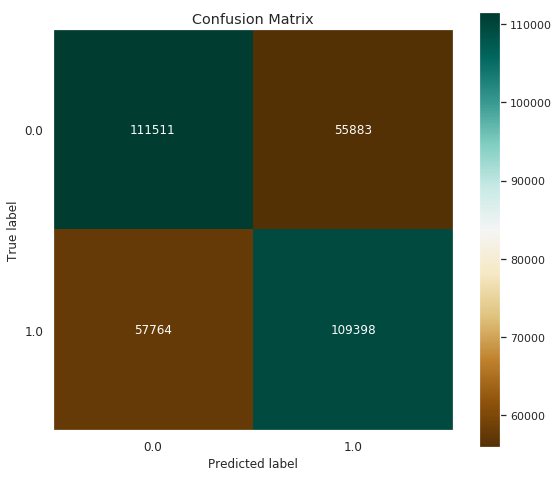

In [139]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, cmap="BrBG")

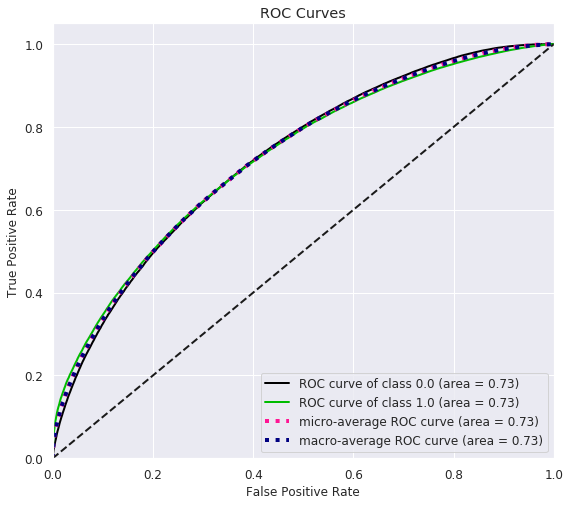

In [140]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

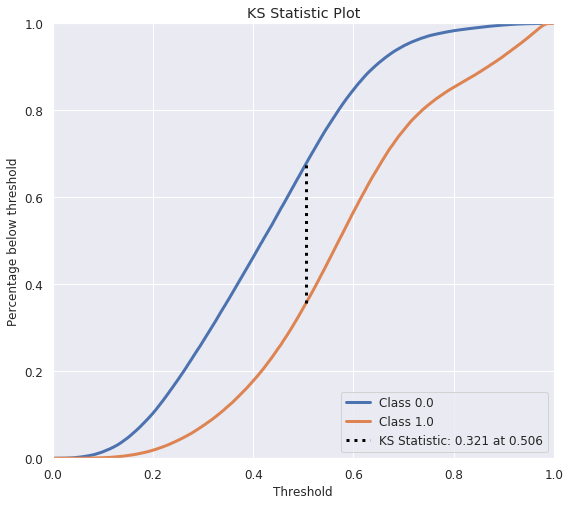

In [141]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

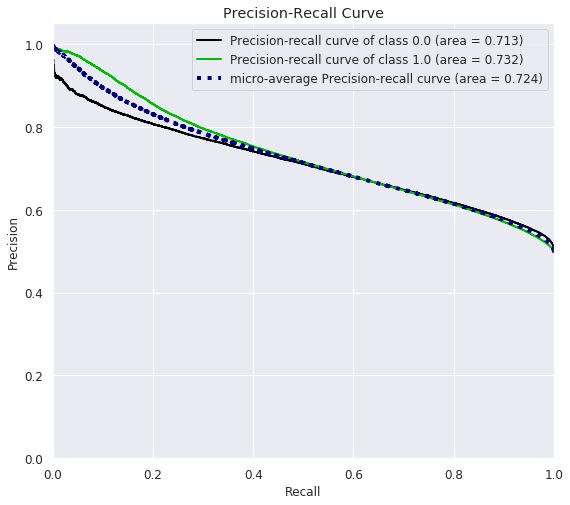

In [142]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


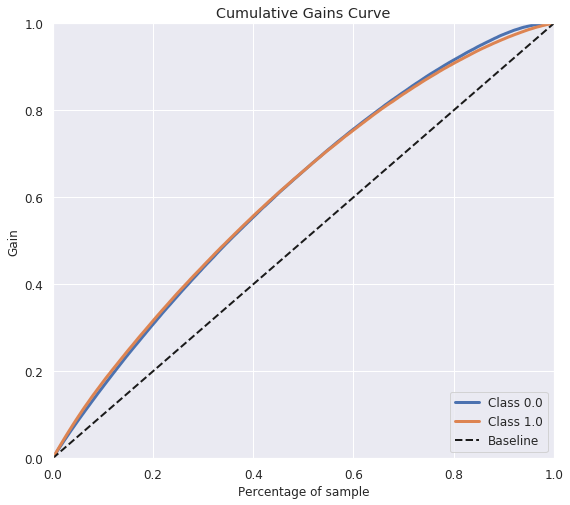

In [143]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


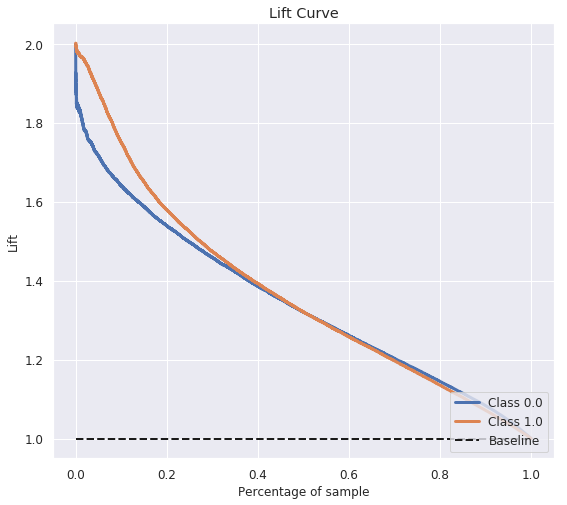

In [144]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

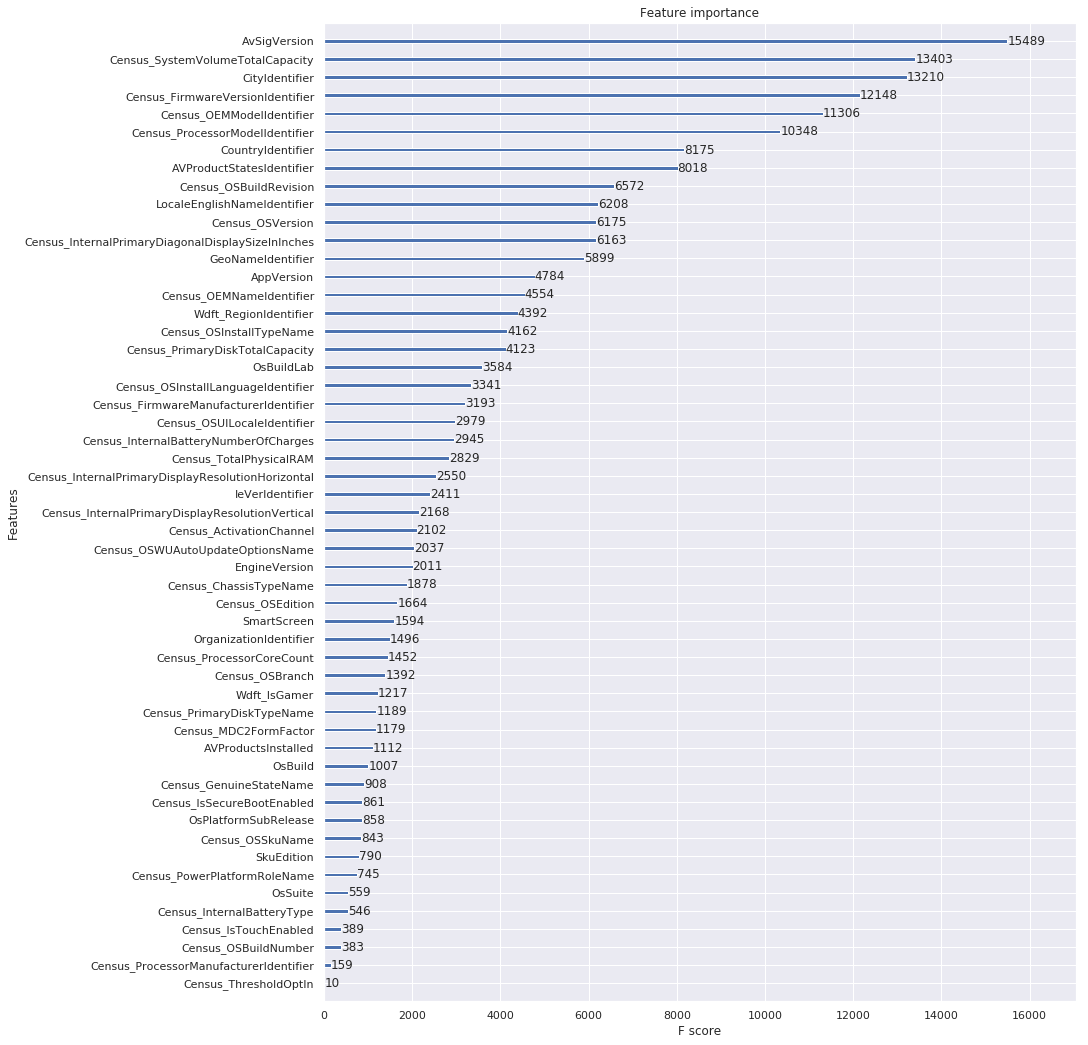

In [145]:
sns.set(rc={'figure.figsize':(12, 18)})
xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

In [146]:
gc.collect()

20

### Tuning
#### The following part is commented, I have run tuning in previous versions of this kernel and figured out the optimal (so far) values of the xgboost parameters.

### XGBoost Grid Search Part 1
#### Tuning parameters:
- 'max_depth'
- 'min_child_weight'

In [147]:
#idea and a big thank you to https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
'''
from sklearn.model_selection import GridSearchCV   #Perforing grid search

gc.collect()

param_test1 = {
    # based on previous personal kernels both parameters show better result having high numbers 
 'max_depth':[13, 14, 15],
 'min_child_weight':[11, 12, 13]
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.05, n_estimators=35, gamma=0, subsample=0.9, colsample_bytree=0.6,
                                                  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, reg_alpha = 1, 
                                                reg_lambda =10, seed=42), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)

gsearch1.fit(xtrain, ytrain)
gsearch1.best_params_, gsearch1.best_score_
'''

"\nfrom sklearn.model_selection import GridSearchCV   #Perforing grid search\n\ngc.collect()\n\nparam_test1 = {\n    # based on previous personal kernels both parameters show better result having high numbers \n 'max_depth':[13, 14, 15],\n 'min_child_weight':[11, 12, 13]\n}\ngsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.05, n_estimators=35, gamma=0, subsample=0.9, colsample_bytree=0.6,\n                                                  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, reg_alpha = 1, \n                                                reg_lambda =10, seed=42), \n                        param_grid = param_test1, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 100)\n\ngsearch1.fit(xtrain, ytrain)\ngsearch1.best_params_, gsearch1.best_score_\n"

In [148]:
'''
best_params_1 = gsearch1.best_params_
del gsearch1
gc.collect()
'''

'\nbest_params_1 = gsearch1.best_params_\ndel gsearch1\ngc.collect()\n'

### XGBoost Grid Search Part 2
#### Tuning parameters:
- 'gamma'

In [149]:
#idea and a big thank you to https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
'''
from sklearn.model_selection import GridSearchCV   #Perforing grid search

gc.collect()

param_test2 = {
 'gamma':[0, 0.1, 0.2]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=40, 
                                                      min_child_weight = best_params_1["min_child_weight"],
                                                      max_depth = best_params_1["max_depth"], subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, reg_alpha = 0, 
                                                      reg_lambda =1, seed=42), 
                        param_grid = param_test2, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 1)

gsearch2.fit(xtrain, ytrain)
gsearch2.best_params_, gsearch2.best_score_
'''

'\nfrom sklearn.model_selection import GridSearchCV   #Perforing grid search\n\ngc.collect()\n\nparam_test2 = {\n \'gamma\':[0, 0.1, 0.2]\n}\ngsearch2 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=40, \n                                                      min_child_weight = best_params_1["min_child_weight"],\n                                                      max_depth = best_params_1["max_depth"], subsample=0.8, colsample_bytree=0.8,\n                                                  objective= \'binary:logistic\', nthread=-1, scale_pos_weight=1, reg_alpha = 0, \n                                                      reg_lambda =1, seed=42), \n                        param_grid = param_test2, scoring=\'roc_auc\', n_jobs=1, iid=False, cv=3, verbose = 1)\n\ngsearch2.fit(xtrain, ytrain)\ngsearch2.best_params_, gsearch2.best_score_\n'

In [150]:
'''
best_params_2 = gsearch2.best_params_
del gsearch2
gc.collect()
'''

'\nbest_params_2 = gsearch2.best_params_\ndel gsearch2\ngc.collect()\n'

### XGBoost Grid Search Part 3
#### Tuning parameters:
- 'subsample'
- 'colsample_bytree'

In [151]:
#idea and a big thank you to https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
'''
from sklearn.model_selection import GridSearchCV   #Perforing grid search

gc.collect()

param_test3 = {
 'subsample':[0.6, 0.7, 0.8, 0.9],
 "colsample_bytree": [0.6, 0.7, 0.8, 0.9]   
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=40, gamma = best_params_2["gamma"],
                                                      min_child_weight = best_params_1["min_child_weight"],
                                                      max_depth = best_params_1["max_depth"],
                                                      objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, reg_alpha = 0,
                                                      reg_lambda =1, seed=42), 
                        param_grid = param_test3, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 1)

gsearch3.fit(xtrain, ytrain)
gsearch3.best_params_, gsearch3.best_score_
'''

'\nfrom sklearn.model_selection import GridSearchCV   #Perforing grid search\n\ngc.collect()\n\nparam_test3 = {\n \'subsample\':[0.6, 0.7, 0.8, 0.9],\n "colsample_bytree": [0.6, 0.7, 0.8, 0.9]   \n}\ngsearch3 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=40, gamma = best_params_2["gamma"],\n                                                      min_child_weight = best_params_1["min_child_weight"],\n                                                      max_depth = best_params_1["max_depth"],\n                                                      objective= \'binary:logistic\', nthread=-1, scale_pos_weight=1, reg_alpha = 0,\n                                                      reg_lambda =1, seed=42), \n                        param_grid = param_test3, scoring=\'roc_auc\', n_jobs=1, iid=False, cv=3, verbose = 1)\n\ngsearch3.fit(xtrain, ytrain)\ngsearch3.best_params_, gsearch3.best_score_\n'

In [152]:
'''
best_params_3 = gsearch3.best_params_
del gsearch3
gc.collect()
'''

'\nbest_params_3 = gsearch3.best_params_\ndel gsearch3\ngc.collect()\n'

### XGBoost Grid Search Part 4
#### Tuning parameters:
- 'reg_alpha'

In [153]:
#idea and a big thank you to https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
'''
from sklearn.model_selection import GridSearchCV   #Perforing grid search

gc.collect()

param_test4 = {
 'reg_alpha':[0.1, 0, 0.5, 1]  
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=40, gamma = best_params_2["gamma"],
                                                      min_child_weight = best_params_1["min_child_weight"],
                                                      max_depth = best_params_1["max_depth"], subsample=best_params_3["subsample"],
                                                      colsample_bytree=best_params_3["colsample_bytree"],
                                                      objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,
                                                      reg_lambda =1, seed=42), 
                        param_grid = param_test4, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 1)

gsearch4.fit(xtrain, ytrain)
gsearch4.best_params_, gsearch4.best_score_
'''

'\nfrom sklearn.model_selection import GridSearchCV   #Perforing grid search\n\ngc.collect()\n\nparam_test4 = {\n \'reg_alpha\':[0.1, 0, 0.5, 1]  \n}\ngsearch4 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=40, gamma = best_params_2["gamma"],\n                                                      min_child_weight = best_params_1["min_child_weight"],\n                                                      max_depth = best_params_1["max_depth"], subsample=best_params_3["subsample"],\n                                                      colsample_bytree=best_params_3["colsample_bytree"],\n                                                      objective= \'binary:logistic\', nthread=-1, scale_pos_weight=1,\n                                                      reg_lambda =1, seed=42), \n                        param_grid = param_test4, scoring=\'roc_auc\', n_jobs=1, iid=False, cv=3, verbose = 1)\n\ngsearch4.fit(xtrain, ytrain)\ngsearch4.best_params_, gsearch4.

In [154]:
'''
best_params_4 = gsearch4.best_params_
del gsearch4
gc.collect()
'''

'\nbest_params_4 = gsearch4.best_params_\ndel gsearch4\ngc.collect()\n'

In [155]:
#idea and a big thank you to https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
'''
from sklearn.model_selection import GridSearchCV   #Perforing grid search

gc.collect()

param_test5 = {
 'reg_lambda':[1, 5, 10, 15]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=40, gamma = best_params_2["gamma"],
                                                      min_child_weight = best_params_1["min_child_weight"],
                                                      max_depth = best_params_1["max_depth"], subsample=best_params_3["subsample"],
                                                      colsample_bytree=best_params_3["colsample_bytree"],
                                                      objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, 
                                                      reg_alpha = best_params_4["reg_alpha"], seed=42), 
                        param_grid = param_test5, scoring='roc_auc', n_jobs=1, iid=False, cv=3, verbose = 1)

gsearch5.fit(xtrain, ytrain)
gsearch5.best_params_, gsearch5.best_score_
'''

'\nfrom sklearn.model_selection import GridSearchCV   #Perforing grid search\n\ngc.collect()\n\nparam_test5 = {\n \'reg_lambda\':[1, 5, 10, 15]\n}\ngsearch5 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=40, gamma = best_params_2["gamma"],\n                                                      min_child_weight = best_params_1["min_child_weight"],\n                                                      max_depth = best_params_1["max_depth"], subsample=best_params_3["subsample"],\n                                                      colsample_bytree=best_params_3["colsample_bytree"],\n                                                      objective= \'binary:logistic\', nthread=-1, scale_pos_weight=1, \n                                                      reg_alpha = best_params_4["reg_alpha"], seed=42), \n                        param_grid = param_test5, scoring=\'roc_auc\', n_jobs=1, iid=False, cv=3, verbose = 1)\n\ngsearch5.fit(xtrain, ytrain)\ngsearch5.

In [156]:
'''
best_params_5 = gsearch5.best_params_
del gsearch5
gc.collect()
'''

'\nbest_params_5 = gsearch5.best_params_\ndel gsearch5\ngc.collect()\n'

### Retraining XGBoost after tuning
And increasing now the number of estimators and on the other hand decreasing the learning_rate from 0.1 to 0.01

In [157]:
'''
# special thanks to https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
clf_xgb = xgb.XGBClassifier(learning_rate =0.01, 
                            n_estimators=5000, 
                            max_depth=best_params_1["max_depth"],
                            min_child_weight=best_params_1["min_child_weight"],
                            gamma=best_params_2["gamma"],
                            subsample=best_params_3["subsample"],
                            colsample_bytree=best_params_3["colsample_bytree"],
                            reg_alpha=best_params_4['reg_alpha'],
                            reg_lambda = best_params_5['reg_lambda'],
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            seed=42)

clf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
            early_stopping_rounds=55, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(xvalid)

print()
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("roc-auc score", roc_auc_score(yvalid, predictions))

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, cmap="BrBG")

sns.set(rc={'figure.figsize':(8,8)})
predictions_probas = clf_xgb.predict_proba(xvalid)
skplt.metrics.plot_roc(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

sns.set(rc={'figure.figsize':(12, 18)})
xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

print()
print("elapsed time in seconds: ", time.time() - start_time)

print()
gc.collect()
'''

'\n# special thanks to https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/\nclf_xgb = xgb.XGBClassifier(learning_rate =0.01, \n                            n_estimators=5000, \n                            max_depth=best_params_1["max_depth"],\n                            min_child_weight=best_params_1["min_child_weight"],\n                            gamma=best_params_2["gamma"],\n                            subsample=best_params_3["subsample"],\n                            colsample_bytree=best_params_3["colsample_bytree"],\n                            reg_alpha=best_params_4[\'reg_alpha\'],\n                            reg_lambda = best_params_5[\'reg_lambda\'],\n                            objective= \'binary:logistic\',\n                            nthread=-1,\n                            scale_pos_weight=1,\n                            seed=42)\n\nclf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], \n       

### Delete defined variables to free up memory space

In [158]:
del X
del y
del xvalid
del yvalid
del xtrain
del ytrain
del predictions
del predictions_probas

In [159]:
gc.collect()

7

### Make predictions for the test Set
- Due to memory limitations predictions will be performed in chunks

In [160]:
predictions_proba_test_list = []

chunck = 400000
test_times = test.shape[0] // chunck
test_rest = test.shape[0] % chunck

for i in  np.arange(0,(chunck * (test_times+1)), chunck):
    predictions_proba_test = list(clf_xgb.predict_proba(test[i:(i+chunck)])[:,1])
    predictions_proba_test_list.append(predictions_proba_test)
    #print("times:", i)


# flatten the list of lists
predictions_proba_test_list = [y for x in predictions_proba_test_list for y in x]

print(np.shape(predictions_proba_test_list))
print(test.shape)
gc.collect()

(7853253,)
(7853253, 55)


27

### Prepare Submission File

In [161]:
del test

In [162]:
del clf_xgb

In [163]:
submission = pd.read_csv('../input/sample_submission.csv')
submission['HasDetections'] = predictions_proba_test_list
submission.to_csv('xgboost.csv', index=False)

## Conclusion
This dataset is fun to work with due to Kaggle's memory restrictions. Both EDA and Machine Learning have a wide area for applications with the dataset due to the variety of different types of categorical and numerical features.

___________________________________